# Colab Environment

In [ ]:
!nvidia-smi
# For Colab PRO/PRO+ users: delete and reconnet runtime until P100 is allocated
# by system.

Tue Oct 18 05:33:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# from time import time
# import multiprocessing as mp
# import torch
# import torchvision
# from torchvision import transforms
 
 
# transform = transforms.Compose([
#     torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize((0.1307,), (0.3081,))
# ])
 
# trainset = torchvision.datasets.MNIST(
#     root='dataset/',
#     train=True,  #如果为True，从 training.pt 创建数据，否则从 test.pt 创建数据。
#     download=True, #如果为true，则从 Internet 下载数据集并将其放在根目录中。 如果已下载数据集，则不会再次下载。
#     transform=transform
# )
 
# print(f"num of CPU: {mp.cpu_count()}")
# for num_workers in range(mp.cpu_count()-2, mp.cpu_count()+2, 2):  
#     train_loader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=num_workers, batch_size=64, pin_memory=True)
#     start = time()
#     for epoch in range(1, 3):
#         for i, data in enumerate(train_loader, 0):
#             pass
#     end = time()
#     print("Finish with:{} second, num_workers={}".format(end - start, num_workers))

num of CPU: 4
Finish with:17.523600101470947 second, num_workers=2


KeyboardInterrupt: ignored

## Install lacking packages

In [ ]:
# https://rwightman.github.io/pytorch-image-models/
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 548 kB 5.0 MB/s 
     |████████████████████████████████| 163 kB 74.0 MB/s 


In [ ]:
# !pip install d2l==0.17.5
!pip install d2l==1.0.0a1.post0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.1 MB/s 
     |████████████████████████████████| 120 kB 25.4 MB/s 
     |████████████████████████████████| 1.6 MB 68.6 MB/s 
     |████████████████████████████████| 82 kB 916 kB/s 


In [ ]:
# !pip install matplotlib_inline

If there's any incompatibility problem due to matplotlib, try this:

In [ ]:
# !pip install matplotlib==3.0

# (Option for everyone) Download dataset from kaggle

## Download Datasets

In [ ]:
!pip install kaggle

In [ ]:
# Upload your kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"erostrate9","key":"098976211661388a9b440c7163a1334e"}'}

In [ ]:
!mkdir -p ~/.kaggle 

!cp kaggle.json ~/.kaggle/ 

!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 98% 761M/778M [00:12<00:00, 56.7MB/s]
100% 778M/778M [00:12<00:00, 65.2MB/s]
 99% 2.28G/2.29G [00:33<00:00, 92.7MB/s]
100% 2.29G/2.29G [00:33<00:00, 74.4MB/s]


In [ ]:
!unzip /content/chest-xray-pneumonia.zip -d /content/chest-xray-pneumonia
!unzip /content/covid19-radiography-database.zip -d /content/covid19-radiography-database

In [ ]:
covid_path = '/content/covid19-radiography-database/COVID-19_Radiography_Dataset'
pn_path = '/content/chest-xray-pneumonia/chest_xray'

## Generate Masked Image Dataset with Masks (if have)

### Processing Function

In [ ]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import re
def mask_dataset_out(img_path, mask_path, output_path, cmap=cv2.IMREAD_COLOR):
  def process_path(path):
    if(not re.findall(r'\/+$',path)):
      path+='/'
    else:
      path=re.sub(r'(\/+)$', '/', path)
    return path
  img_path = process_path(img_path)
  mask_path = process_path(mask_path)
  output_path = process_path(output_path)
  if(not os.path.exists(output_path)):
    os.mkdir(output_path)
  img_list = os.listdir(img_path)
  mask_list = os.listdir(mask_path)
  img_len, mask_len = len(img_list), len(mask_list)
  if( img_len != mask_len):
     print(f'The number of images is not equal to that of masks. imgs:{img_len},masks:{mask_len}')
     return
  img_list.sort(key=lambda x: int(re.search( r'-(\d+)\.', x).group(1)))
  mask_list.sort(key=lambda x: int(re.search( r'-(\d+)\.', x).group(1)))
  for img_name in img_list:
      img = cv2.imread(img_path + img_name, cmap)
      mask = cv2.imread(mask_path + img_name, cmap)
      img = cv2.resize(img, (mask.shape[0],mask.shape[1]))
      mask = (mask!=0).astype('uint8') 
      masked_img = img * mask

      output_name = img_name
      save_path = output_path + output_name
      cv2.imwrite(save_path, masked_img)

### COVID

In [ ]:
!mkdir /content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/masked_images
!mkdir /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/masked_images
!mkdir /content/covid19-radiography-database/COVID-19_Radiography_Dataset/'Viral Pneumonia'/masked_images
!mkdir /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/masked_images

In [ ]:
normal_img_path = covid_path +'/Normal/images'
normal_mask_path = covid_path +'/Normal/masks'
normal_mimg_path = covid_path +'/Normal/masked_images'

lo_img_path = covid_path +'/Lung_Opacity/images'
lo_mask_path = covid_path +'/Lung_Opacity/masks'
lo_mimg_path = covid_path +'/Lung_Opacity/masked_images'

vp_img_path = covid_path +'/Viral Pneumonia/images'
vp_mask_path = covid_path +'/Viral Pneumonia/masks'
vp_mimg_path = covid_path +'/Viral Pneumonia/masked_images'

covid_img_path = covid_path +'/COVID/images'
covid_mask_path = covid_path +'/COVID/masks'
covid_mimg_path = covid_path +'/COVID/masked_images'

In [ ]:
mask_dataset_out(normal_img_path, normal_mask_path, normal_mimg_path)
mask_dataset_out(lo_img_path, lo_mask_path, lo_mimg_path)
mask_dataset_out(vp_img_path, vp_mask_path, vp_mimg_path)
mask_dataset_out(covid_img_path, covid_mask_path, covid_mimg_path)

In [ ]:
normal_img_path = covid_path +'/raw/Normal'
normal_mask_path = covid_path +'/masks/Normal'
normal_mimg_path = covid_path +'/masked/Normal'

lo_img_path = covid_path + '/raw/Lung_Opacity'
lo_mask_path = covid_path + '/masks/Lung_Opacity'
lo_mimg_path = covid_path + '/masked/Lung_Opacity'

vp_img_path = covid_path + '/raw/Viral Pneumonia'
vp_mask_path = covid_path + '/masks/Viral Pneumonia'
vp_mimg_path = covid_path + '/masked/Viral Pneumonia'

covid_img_path = covid_path + '/raw/COVID'
covid_mask_path = covid_path + '/masks/COVID'
covid_mimg_path = covid_path + '/masked/COVID'

In [ ]:
mask_dataset_out(normal_img_path, normal_mask_path, normal_mimg_path)
mask_dataset_out(lo_img_path, lo_mask_path, lo_mimg_path)
mask_dataset_out(vp_img_path, vp_mask_path, vp_mimg_path)
mask_dataset_out(covid_img_path, covid_mask_path, covid_mimg_path)

### Re-structure Datasets

#### covid

In [ ]:
!mkdir /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masked
!mv /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/masked_images /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masked/Normal
!mv /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/masked_images /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masked/Lung_Opacity
!mv /content/covid19-radiography-database/COVID-19_Radiography_Dataset/'Viral Pneumonia'/masked_images /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masked/'Viral Pneumonia'
!mv /content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/masked_images /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masked/COVID

In [ ]:
!mkdir /content/covid19-radiography-database/COVID-19_Radiography_Dataset/raw
!mv  /content/covicovid19-radiography-databased19/COVID-19_Radiography_Dataset/Normal/images /content/covid19-radiography-database/COVID-19_Radiography_Dataset/raw/Normal
!mv  /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images /content/covid19-radiography-database/COVID-19_Radiography_Dataset/raw/Lung_Opacity
!mv  /content/covid19-radiography-database/COVID-19_Radiography_Dataset/'Viral Pneumonia'/images /content/covid19-radiography-database/COVID-19_Radiography_Dataset/raw/'Viral Pneumonia'
!mv  /content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images /content/covid19-radiography-database/COVID-19_Radiography_Dataset/raw/COVID

In [ ]:
!mkdir /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masks
!mv /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/masks /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masks/Normal
!mv /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/masks /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masks/Lung_Opacity
!mv /content/covid19-radiography-database/COVID-19_Radiography_Dataset/'Viral Pneumonia'/masks /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masks/'Viral Pneumonia'
!mv /content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/masks /content/covid19-radiography-database/COVID-19_Radiography_Dataset/masks/COVID

In [ ]:
!rm -r /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity
!rm -r /content/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal
!rm -r /content/covid19-radiography-database/COVID-19_Radiography_Dataset/'Viral Pneumonia'
!rm -r /content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID

In [ ]:
masked_covid_dataset=ImageFolder(covid_path+'/masked')

In [ ]:
raw_covid_dataset=ImageFolder(covid_path+'/raw')

#### Pneumonia

In [ ]:
!mkdir /content/chest-xray-pneumonia/chest_xray/NORMAL
!mkdir /content/chest-xray-pneumonia/chest_xray/PNEUMONIA

!mv /content/chest-xray-pneumonia/chest_xray/train/NORMAL/* /content/chest-xray-pneumonia/chest_xray/NORMAL
!mv /content/chest-xray-pneumonia/chest_xray/test/NORMAL/* /content/chest-xray-pneumonia/chest_xray/NORMAL
!mv /content/chest-xray-pneumonia/chest_xray/val/NORMAL/* /content/chest-xray-pneumonia/chest_xray/NORMAL

!mv /content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/* /content/PNEUMONIA/chest_xray/PNEUMONIA
!mv /content/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/* /content/PNEUMONIA/chest_xray/PNEUMONIA
!mv /content/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/* /content/PNEUMONIA/chest_xray/PNEUMONIA

!rm -rf /content/chest-xray-pneumonia/chest_xray/train
!rm -rf /content/chest-xray-pneumonia/chest_xray/val
!rm -rf /content/chest-xray-pneumonia/chest_xray/test

# (For Eric only) Download from GoogleDrive

## mount Google Drive

In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


## copy dataset

In [ ]:
!cp /content/gdrive/MyDrive/data/datasets.tar /content/
!tar -xvf datasets.tar

### covid

In [ ]:
# Use the unziped dataset located in /content. 
# Define path to the data directory
covid_path = '/content/covid19-radiography-database/COVID-19_Radiography_Dataset'

### pneumonia

In [ ]:
pn_path = '/content/chest_xray'

# package Environment

In [ ]:
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
import cv2
import copy
import os
import time
import datetime
from time import strftime
import re
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torchvision
import torchvision.transforms as T
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import timm

import PIL
from PIL import Image

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# set randome seeds
random_seed = 2022
torch.manual_seed(random_seed);

In [ ]:
# d2l
%matplotlib inline

from d2l import torch as d2l

d2l.use_svg_display()

# Grab the dataset

In [ ]:
default_trans= torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()

In [ ]:
# trans = torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
# trans.mean = [trans.mean[0]]
# trans.std = [trans.std[0]]
# default_trans= T.Compose([
#     T.Grayscale(),
#     trans
#     ])

## (Option-Slower hand-made version) Load Data

In [ ]:
# def idx2labels(idx):
#     """return text labels"""
#     l=list(idx)
#     text_labels = ['Normal','Lung_Opacity','Viral_Pneumonia','COVID']
#     return [text_labels[int(i)] for i in l]

In [ ]:
# def labels2idx(labels):
#     """return text labels"""
#     l=list(labels)
#     text_labels = ['Normal','Lung_Opacity','Viral_Pneumonia','COVID']
#     d = dict(zip(text_labels,range(4)))
#     return [d[i] for i in l]

In [ ]:
# def init_process(path,lens,label):
#   data = []
#   len_ = lens[label]
#   for i in range(1,len_+1):
#     data.append([path % i, label])
#   return data

In [ ]:
# len_normal = len(os.listdir(path+'/Normal/images'))
# len_lo = len(os.listdir(path+'/Lung_Opacity/images'))
# len_vp = len(os.listdir(path+'/Viral Pneumonia/images'))
# len_covid = len(os.listdir(path+'/COVID/images'))
# lens=[len_normal,len_lo,len_vp,len_covid]
# print(len_normal,len_lo,len_vp,len_covid)

In [ ]:
# normal_imgs=init_process(path+'/Normal/images/Normal-%d.png', lens, 0)
# normal_masks=init_process(path+'/Normal/masks/Normal-%d.png', lens, 0)

# lo_imgs=init_process(path+'/Lung_Opacity/images/Lung_Opacity-%d.png', lens, 1)
# lo_masks=init_process(path+'/Lung_Opacity/masks/Lung_Opacity-%d.png', lens, 1)

# vp_imgs=init_process(path+'/Viral Pneumonia/images/Viral Pneumonia-%d.png', lens, 2)
# vp_masks=init_process(path+'/Viral Pneumonia/masks/Viral Pneumonia-%d.png', lens, 2)

# covid_imgs=init_process(path+'/COVID/images/COVID-%d.png', lens, 3)
# covid_masks=init_process(path+'/COVID/masks/COVID-%d.png', lens, 3)

In [ ]:
# def Myloader(path):
#   return Image.open(path).convert('RGB')

In [ ]:
# class MaskedSet(Dataset):
#     def __init__(self, imgs, masks, transform, loader):
#         self.data = imgs
#         self.masks = masks
#         self.transform = transform
#         self.loader = loader
#     def __getitem__(self, idx):
#         img, label = self.data[idx]
#         mask, _ = self.masks[idx]
#         img = self.loader(img)
#         mask = self.loader(mask)
#         pre_transform = T.Compose([
#             T.Resize(256),
#             T.ToTensor()
#         ])
#         img = T.ToPILImage()(pre_transform(img) * pre_transform(mask))
#         img = self.transform(img)
#         return img, label

#     def __len__(self):
#         return len(self.data)

In [ ]:
# transform = T.Compose([
#     T.Resize(256),
#     T.ToTensor(),
# ])

In [ ]:
# masked_normal_ds = MaskedSet(imgs=normal_imgs, masks=normal_masks, transform=transform, loader=Myloader)
# masked_lo_ds = MaskedSet(imgs=lo_imgs, masks=lo_masks, transform=transform, loader=Myloader)
# masked_vp_ds = MaskedSet(imgs=vp_imgs, masks=vp_masks, transform=transform, loader=Myloader)
# masked_covid_ds = MaskedSet(imgs=covid_imgs, masks=covid_masks, transform=transform, loader=Myloader)

In [ ]:
# masked_dss=[masked_normal_ds,masked_lo_ds,masked_vp_ds,masked_covid_ds]

In [ ]:
# plt.imshow(T.ToPILImage()(masked_normal_ds[0][0]))

In [ ]:
# plt.imshow(T.ToPILImage()(masked_lo_ds[0][0]))

In [ ]:
# plt.imshow(T.ToPILImage()(masked_vp_ds[0][0]))

In [ ]:
# plt.imshow(T.ToPILImage()(masked_covid_ds[0][0]))

## Load COVID Data

In [ ]:
masked_covid_dataset=ImageFolder(covid_path+'/masked',transform=default_trans)

In [ ]:
raw_covid_dataset=ImageFolder(covid_path+'/raw',transform=default_trans)

In [ ]:
masked_covid_dataset.class_to_idx

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

In [ ]:
n=np.array(masked_covid_dataset.targets)

In [ ]:
print((n==0).sum())
print((n==1).sum())
print((n==2).sum())
print((n==3).sum())

3616
6012
10192
1345


## Load Pneumonia Data

In [ ]:
raw_pn_dataset=ImageFolder(pn_path,transform=default_trans)
# masked_covid_dataset=ImageFolder(pn_path+'/masked')
n=np.array(raw_pn_dataset.targets)
print((n==0).sum())
print((n==1).sum())

1583
4273


## Preparing Train, Validation

### COVID

In [ ]:
len(masked_covid_dataset)

21165

In [ ]:
train_masked_covid, val_masked_covid, test_masked_covid= torch.utils.data.random_split(masked_covid_dataset, [14815,4233,6350-4233], generator=torch.Generator().manual_seed(random_seed))

In [ ]:
len(raw_covid_dataset)

21165

In [ ]:
train_raw_covid, val_raw_covid, test_raw_covid= torch.utils.data.random_split(raw_covid_dataset, [14815,4233,6350-4233], generator=torch.Generator().manual_seed(random_seed))

In [ ]:
from torch.utils.data import Dataset
class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

### Pneumonia

In [ ]:
# print(len(masked_pn_dataset))
# train_masked_pn, val_masked_pn, test_masked_pn= torch.utils.data.random_split(masked_pn_dataset, [14815,4233,6350-4233], generator=torch.Generator().manual_seed(random_seed))

In [ ]:
len(raw_pn_dataset)

5856

In [ ]:
train_raw_pn, val_raw_pn, test_raw_pn= torch.utils.data.random_split(raw_pn_dataset, [4099,1171,(5856-4099-1171)], generator=torch.Generator().manual_seed(random_seed))

In [ ]:
from torch.utils.data import Dataset
class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [ ]:
transformer = {
    'train': T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                          ]),
    'val':  T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                        ])
}

# Visualization

## Visualize datasets

In [ ]:
# return distribution of example number of every class and its visulization. (bar cahrt)
def show_datafolder_overview(datafolder, title='Data Inbalance of Dataset', title_size=20):
  class_to_idx=datafolder.class_to_idx
  # num_classes=len(class_to_idx)
  classes=datafolder.classes
  targets=np.array(datafolder.targets)
  distribution = pd.DataFrame.from_dict(
      {
          class_name:[(targets==class_to_idx[class_name]).sum()] for class_name in classes
      }
  )
  fig=sns.barplot(data=distribution).set_title(title, fontsize=title_size)
  plt.show()
  return distribution, fig.get_figure()

# Function for plotting samples
def plot_samples(imagefolder, num_rows=3, title='Dataset Samples',figsize=(30,8),label_size=16, grayscale=False):
    class_to_idx=imagefolder.class_to_idx
    num_classes=len(class_to_idx)
    classes=imagefolder.classes
    targets=np.array(imagefolder.targets)
    dic = {class_name:(n==class_to_idx[class_name]).sum() for class_name in classes}
    lens = list(dic.values())
    idx=[0]
    for i in lens[:-1]:
      idx+=[idx[-1]+i]
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_classes, figsize=figsize)
    for i in range(num_rows):
      for j in range(num_classes):
        image = imagefolder[idx[j]+i][0]
        axs[i][j].imshow(image.squeeze(),cmap='gray')
        if i==0:
          axs[i][j].set_title(imagefolder.classes[j],fontsize=label_size)
        axs[i][j].axis('off')
    return fig

### Visualize the covid dataset

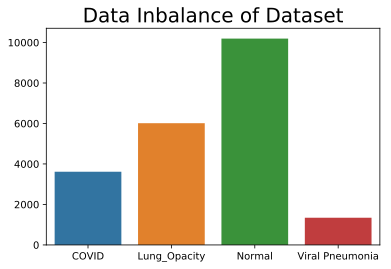

In [ ]:
distribution, fig = show_datafolder_overview(masked_covid_dataset)

In [ ]:
distribution

,COVID,Lung_Opacity,Normal,Viral Pneumonia
0,3616,6012,10192,1345


In [ ]:
fig.savefig('./covid_class_imbalance.png')

In [ ]:
x = raw_covid_dataset[0][0].squeeze()

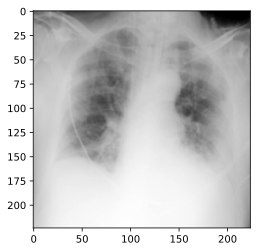

In [ ]:
plt.imshow(x,cmap='gray')

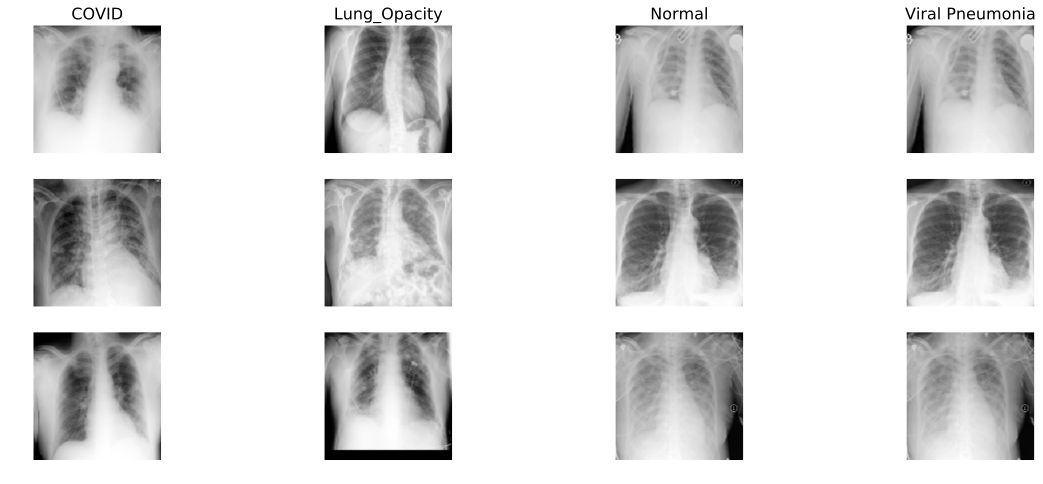

In [ ]:
fig_egs = plot_samples(raw_covid_dataset,num_rows=3,title="Covid-19 Dataset Examples", figsize=(20,8),label_size=16)

In [ ]:
type(fig_egs)

matplotlib.figure.Figure

In [ ]:
fig_egs.savefig('./convid_sample.png')

### Visualize the pneumonia dataset

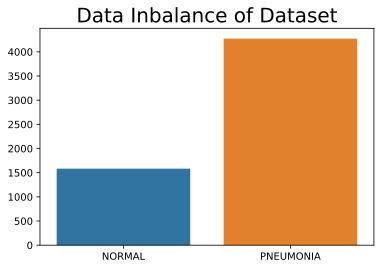

In [ ]:
distribution, fig = show_datafolder_overview(raw_pn_dataset)

In [ ]:
fig.savefig('./pn_class_imbalance.png')

In [ ]:
distribution

,NORMAL,PNEUMONIA
0,1583,4273


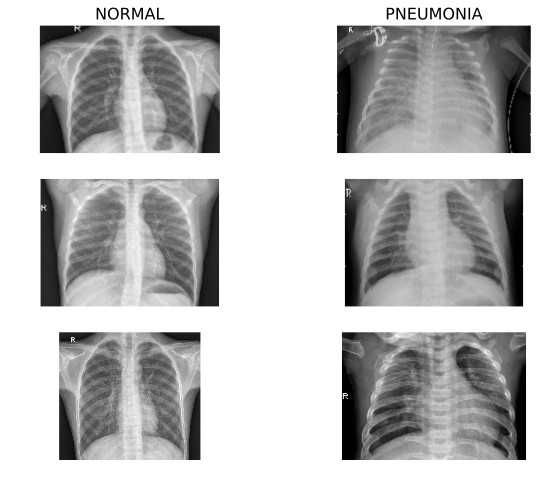

In [ ]:
fig_egs = plot_samples(raw_pn_dataset,num_rows=3,title="Pneumonia Dataset Examples", figsize=(10,8),label_size=16)

In [ ]:
fig_egs.savefig('./pn_samples.png')

## mask

In [ ]:
img_path='/content/covid19-radiography-database/COVID-19_Radiography_Dataset/raw/COVID/'
mask_path='/content/covid19-radiography-database/COVID-19_Radiography_Dataset/masks/COVID/'
masked_path='/content/covid19-radiography-database/COVID-19_Radiography_Dataset/masked/COVID/'
img_list = os.listdir(img_path)
mask_list = os.listdir(mask_path)
masked_list = os.listdir(masked_path)
img_len, mask_len = len(img_list), len(mask_list)
if( img_len != mask_len):
  print(f'The number of images is not equal to that of masks. imgs:{img_len},masks:{mask_len}')
img_list.sort(key=lambda x: int(re.search( r'-(\d+)\.', x).group(1)))
mask_list.sort(key=lambda x: int(re.search( r'-(\d+)\.', x).group(1)))
masked_list.sort(key=lambda x: int(re.search( r'-(\d+)\.', x).group(1)))

In [ ]:
image = cv2.imread(img_path+img_list[0],cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path+mask_list[0])
masked = cv2.imread(masked_path+masked_list[0])

In [ ]:
(raw_covid_dataset[0][0][0]!=raw_covid_dataset[0][0][1]).sum()

tensor(50176)

In [ ]:
raw_covid_dataset.transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

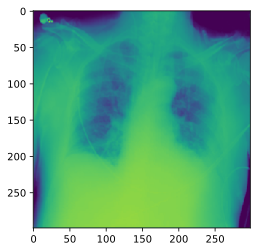

In [ ]:
plt.imshow(image)

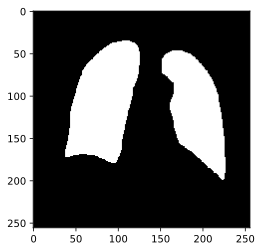

In [ ]:
plt.imshow(mask)

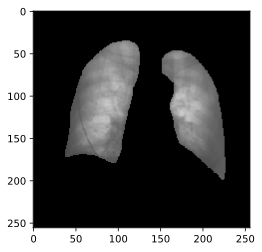

In [ ]:
plt.imshow(masked)

In [ ]:
np_image= np.array(image)
np_mask = np.array(mask)
np_masked = np.array(masked)

In [ ]:
np_image.shape

(299, 299, 3)

In [ ]:
(np_mask[:,:,0]!=np_mask[:,:,1]).sum()

0

In [ ]:
(np_mask[:,:,0]!=np_mask[:,:,2]).sum()

0

In [ ]:
(np_masked[:,:,0]!=np_masked[:,:,1]).sum()

0

## pn

In [ ]:
img_path='/content/chest-xray-pneumonia/chest_xray/PNEUMONIA/'
img_list = os.listdir(img_path)

In [ ]:
image = cv2.imread(img_path+img_list[0], cv2.IMREAD_COLOR)

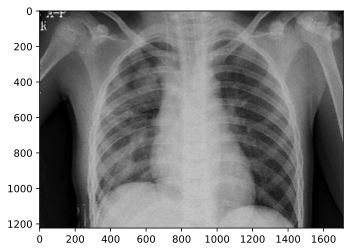

In [ ]:
plt.imshow(image)

In [ ]:
np_image= np.array(image)

In [ ]:
np_image.shape

(1224, 1712, 3)

In [ ]:
(np_mask[:,:,0]!=np_mask[:,:,1]).sum()

0

In [ ]:
(np_mask[:,:,0]!=np_mask[:,:,2]).sum()

0

# (Optional)Data Augmentation

In [ ]:
transform_aug = T.Compose([
    T.RandomAffine(degrees=15, translate=(0.05, 0.05)),
    torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
])

### Visualize the augmented training set

In [ ]:
# def show_batch(dl):
#     for images, labels in dl:
#         fig, ax = plt.subplots(figsize=(12, 12))
#         ax.set_xticks([]); ax.set_yticks([])
#         ax.imshow(make_grid(images[:60], nrow=10).permute(1, 2, 0))
#         break
        
# show_batch(train_dl)

In [ ]:
# dl=DataLoader(dataset, batch_size=256, shuffle=False)
# normal_num=0
# lo_num=0
# vp_num=0
# covid_num=0
# for X , y in dl:
#   normal_num+=(y==0).sum()
#   lo_num+=(y==1).sum()
#   vp_num+=(y==2).sum()
#   covid_num+=(y==3).sum()
# print(f'Normal:{normal_num},Lung_Opacity:{lo_num},Viral_Pneumonia:{vp_num},COVID:{covid_num}')

# Choosing Model

## Training funciton

In [ ]:
def get_targets(dataset):
  if type(dataset)==torch.utils.data.Subset:
    return np.take(dataset.dataset.targets, dataset.indices).tolist()
  elif type(dataset) in [torchvision.datasets.ImageFolder,torchvision.datasets.DatasetFolder]:
    return dataset.targets
def get_classes(dataset):
  if type(dataset)==torch.utils.data.Subset:
    return dataset.dataset.classes
  elif type(dataset) in [torchvision.datasets.ImageFolder,torchvision.datasets.DatasetFolder]:
    return dataset.classes
def get_class_to_idx(dataset):
  if type(dataset)==torch.utils.data.Subset:
    return dataset.dataset.class_to_idx
  elif type(dataset) in [torchvision.datasets.ImageFolder,torchvision.datasets.DatasetFolder]:
    return dataset.class_to_idx
def weights_weighted(dataloader):
  dataset = dataloader.dataset
  if(type(dataset)==DatasetFromSubset):
    dataset = dataset.subset
  dataset_size = len(dataset)
  classes = get_classes(dataset)
  targets = np.array(get_targets(dataset))
  class_to_idx = get_class_to_idx(dataset)
  nums = [(targets==class_to_idx[class_name]).sum() for class_name in classes]
  return torch.tensor(list(map(lambda x:(1-x/dataset_size), nums)), dtype=torch.float32)

def weights_weighted_m(dataloader):
  dataset = dataloader.dataset
  if(type(dataset)==DatasetFromSubset):
    dataset = dataset.subset
  dataset_size=len(dataset)
  classes=get_classes(dataset)
  targets=np.array(get_targets(dataset))
  class_to_idx = get_class_to_idx(dataset)
  nums = [(targets==class_to_idx[class_name]).sum() for class_name in classes]
  max_num = max(nums)
  return torch.tensor(list(map(lambda x:((1-x/dataset_size)/(1-max_num/dataset_size)), nums)), dtype=torch.float32)

def weights_icf(dataloader):
  dataset = dataloader.dataset
  dataset_size=len(dataset)
  classes=get_classes(dataset)
  targets=np.array(get_targets(dataset))
  class_to_idx = get_class_to_idx(dataset)
  nums = [(targets==class_to_idx[class_name]).sum() for class_name in classes]
  return torch.tensor(list(map(lambda x:(dataset_size/x), nums)), dtype=torch.float32)

def get_dataset_size(dataloader):
    dataset = dataloader.dataset
    return len(dataset)
  
def train_model(model,dataloaders, optimizer, scheduler, criterions, num_epochs=25, device=d2l.try_gpu()):
    model=model.to(device)
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    dataset_sizes = { phase:len(dataloaders[phase].dataset) for phase in ['train', 'val']}
    # dataset_sizes={
    #     'train': get_dataset_size(dataloaders['train']),
    #     'val': get_dataset_size(dataloaders['val'])
    # }
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterions[phase](outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
# def train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
#           scheduler=None):
#     net.to(device)
#     animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],ylim=[0,1],
#                             legend=['train loss', 'train acc', 'val acc'])

#     for epoch in range(num_epochs):
#         metric = d2l.Accumulator(3)  # train_loss,train_acc,num_examples
#         for i, (X, y) in enumerate(train_iter):
#             net.train()
#             trainer.zero_grad()
#             X, y = X.to(device), y.to(device)
#             y_hat = net(X)
#             l = loss(y_hat, y)
#             l.backward()
#             trainer.step()
#             with torch.no_grad():
#                 metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
#             train_loss = metric[0] / metric[2]
#             train_acc = metric[1] / metric[2]
#             if (i + 1) % 50 == 0:
#                 animator.add(epoch + i / len(train_iter),
#                              (train_loss, train_acc, None))

#         test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
#         animator.add(epoch+1, (None, None, test_acc))

#         if scheduler:
#             if scheduler.__module__ == lr_scheduler.__name__:
#                 # UsingPyTorchIn-Builtscheduler
#                 scheduler.step()
#             else:
#                 # Usingcustomdefinedscheduler
#                 for param_group in trainer.param_groups:
#                     param_group['lr'] = scheduler(epoch)

#     print(f'train loss {train_loss:.3f}, train acc {train_acc:.3f}, '
#           f'val acc {test_acc:.3f}')

In [ ]:
## Be careful, this traning fucntion is for d2l=0.17.5
# def train(net, train_iter, test_iter, num_epochs, lr,optim, device, fine_tune=False):
#     """Train a model with a GPU (defined in Chapter 6).

#     Defined in :numref:`sec_lenet`"""
#     def init_weights(m):
#         if type(m) == nn.Linear or type(m) == nn.Conv2d:
#             nn.init.xavier_uniform_(m.weight)
#     # net.apply(init_weights)
#     attrs=dir(net)
#     attrs_0=dir(net[0])
#     optimizer = None
#     if ( 'classifier' in attrs):
#       net.classifier.apply(init_weights)
#       optimizer = optim(net.classifier.parameters(), lr=lr)
#       print('optimizing classifier in net')
#     elif ( 'classifier' in attrs_0):
#       net[0].classifier.apply(init_weights)
#       optimizer = optim(net[0].classifier.parameters(), lr=lr)
#       print('optimizing classifier in net[0]')
#     else:
#       net[0].fc.apply(init_weights)
#       optimizer = optim(net[0].fc.parameters(), lr=lr)
#       print('optimizing fc in net[0]')
#     if(fine_tune):
#       optimizer = optim(net.parameters(),lr=lr)
#     print('training on', device)
#     net=net.to(device)
#     # optimizer = torch.optim.SGD(net.parameters(), lr=lr)
#     loss = nn.CrossEntropyLoss()
#     animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0,1],
#                             legend=['train loss', 'train acc', 'val acc'])
#     timer, num_batches = d2l.Timer(), len(train_iter)
#     for epoch in range(num_epochs):
#         # Sum of training loss, sum of training accuracy, no. of examples
#         metric = d2l.Accumulator(3)
#         net.train()
#         for i, (X, y) in enumerate(train_iter):
#             timer.start()
#             optimizer.zero_grad()
#             X, y = X.to(device), y.to(device)
#             y_hat = net(X)
#             l = loss(y_hat, y)
#             l.backward()
#             optimizer.step()
#             with torch.no_grad():
#                 metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
#             timer.stop()
#             train_l = metric[0] / metric[2]
#             train_acc = metric[1] / metric[2]
#             if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
#                 animator.add(epoch + (i + 1) / num_batches,
#                              (train_l, train_acc, None))
#         test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
#         animator.add(epoch + 1, (None, None, test_acc))
#     print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
#           f'val acc {test_acc:.3f}')
#     print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
#           f'on {str(device)}')

In [ ]:
covid_sizes={'train':len(train_raw_covid),
               'val':len(val_raw_covid),
               'test':len(test_raw_covid)}
pn_sizes ={'train':len(train_raw_pn),
               'val':len(val_raw_pn),
               'test':len(test_raw_pn)}

In [ ]:
# def loss_weight(datafolder):
#   classes=[]
#   if type(datafolder)==torch.utils.data.Subset:
#     datafolder = datafolder.dataset
#   if type(datafolder) in [torchvision.datasets.ImageFolder,torchvision.datasets.DatasetFolder]:
#     classes=datafolder.classes
#   else:
#     return None
#   targets=np.array(datafolder.targets)
#   dataset_size=len(datafolder)
#   nums = [(targets==datafolder.class_to_idx[class_name]).sum() for class_name in classes]
#   return torch.tensor(list(map(lambda x:(1-x/dataset_size), nums)), dtype=torch.float32)

# def train_model(model,dataloaders, optimizer, scheduler, criterion=nn.CrossEntropyLoss, num_epochs=25, device=d2l.try_gpu(), dataset_sizes=covid_sizes, use_weighted_loss=False):
#     model=model.to(device)
#     since = time.time()
#     loss_weights=None
#     default_criterion = criterion().to(device)
#     criterions = None
#     if use_weighted_loss:
#       loss_weights=loss_weight(dataloaders['train'].dataset).to(device)
#       criterions = { 'train': criterion(weight=loss_weights).to(device), 'val': default_criterion}
#     else: 
#       criterions= {'train': default_criterion, 'val': default_criterion}
#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_acc = 0.0

#     for epoch in range(num_epochs):
#         print(f'Epoch {epoch}/{num_epochs - 1}')
#         print('-' * 10)

#         # Each epoch has a training and validation phase
#         for phase in ['train', 'val']:
#             if phase == 'train':
#                 model.train()  # Set model to training mode
#             else:
#                 model.eval()   # Set model to evaluate mode

#             running_loss = 0.0
#             running_corrects = 0

#             # Iterate over data.
#             for inputs, labels in dataloaders[phase]:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 # zero the parameter gradients
#                 optimizer.zero_grad()

#                 # forward
#                 # track history if only in train
#                 with torch.set_grad_enabled(phase == 'train'):
#                     outputs = model(inputs)
#                     _, preds = torch.max(outputs, 1)
#                     loss = criterions[phase](outputs, labels)

#                     # backward + optimize only if in training phase
#                     if phase == 'train':
#                         loss.backward()
#                         optimizer.step()

#                 # statistics
#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)
#             if phase == 'train':
#                 scheduler.step()

#             epoch_loss = running_loss / dataset_sizes[phase]
#             epoch_acc = running_corrects.double() / dataset_sizes[phase]

#             print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

#             # deep copy the model
#             if phase == 'val' and epoch_acc > best_acc:
#                 best_acc = epoch_acc
#                 best_model_wts = copy.deepcopy(model.state_dict())

#         print()

#     time_elapsed = time.time() - since
#     print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
#     print(f'Best val Acc: {best_acc:4f}')

#     # load best model weights
#     model.load_state_dict(best_model_wts)
#     return model

## Testing funcitons

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) 
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)), preds

In [ ]:
def validation_step(model,batch):
  images,labels = batch
  images,labels = images.to(device),labels.to(device)
  out = model(images)                                      
  loss = F.cross_entropy(out, labels)                    
  acc,preds = accuracy(out, labels)                       

  return {'val_loss': loss.detach(), 'val_acc':acc.detach(), 
          'preds':preds.detach(), 'labels':labels.detach()}

In [ ]:
def test_prediction(outputs):
  batch_losses = [x['val_loss'] for x in outputs]
  epoch_loss = torch.stack(batch_losses).mean()           
  batch_accs = [x['val_acc'] for x in outputs]
  epoch_acc = torch.stack(batch_accs).mean()             
  # combine predictions
  batch_preds = [pred for x in outputs for pred in x['preds'].tolist()] 
  # combine labels
  batch_labels = [lab for x in outputs for lab in x['labels'].tolist()]  

  return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item(),
          'test_preds': batch_preds, 'test_labels': batch_labels}  

In [ ]:
@torch.no_grad()
def test_predict(model, test_loader):
    model.eval()
    # perform testing for each batch
    outputs = [validation_step(model,batch) for batch in test_loader] 
    results = test_prediction(outputs)                          
    print('test_loss: {:.4f}, test_acc: {:.4f}'
          .format(results['test_loss'], results['test_acc']))
    
    return results['test_preds'], results['test_labels']

In [ ]:
import time
def plot_cm(labels, preds,class_names=['0','1'],path=None):
  if not path:
    path = './'
    path=path+time.strftime("%Y-%m-%d-%H%M", time.localtime())+'.svg'
  cm  = confusion_matrix(labels, preds)
  # Plot confusion matrix
  plt.figure()
  plot_confusion_matrix(cm,cmap=plt.cm.Blues,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
  plt.xticks(range(len(class_names)), class_names, fontsize=8)
  plt.yticks(range(len(class_names)), class_names, fontsize=8)
  plt.xlabel('Predicted Label',fontsize=12)
  plt.ylabel('True Label',fontsize=12)
  plt.savefig(path)
  plt.show()
  return cm

## DenseNet-121 timm

In [ ]:
transformer = {
    'train': T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                          ]),
    'val':  T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                        ])
    }
train_ds_trans = DatasetFromSubset(train_ds, transform=transformer['train'])
val_ds_trans = DatasetFromSubset(val_ds, transform=transformer['val'])
test_ds_trans = DatasetFromSubset(test_ds, transform=transformer['val'])

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 15
milestones =[8,30,60]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_ds_trans, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds_trans, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), num_epochs=num_epochs, device=device)

In [ ]:
# test_dl = DataLoader(test_ds_trans, 256, num_workers=4, pin_memory=True)
# preds,labels = test_predict(net, test_dl)
# plot_cm(preds,labels)

In [ ]:
PATH_='/content/gdrive/MyDrive/model/covid/densenet121_unaug_ft_90_915.pt'
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
torch.save(net.state_dict(), PATH_)
# Load model
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH_))
# model.eval()


## DenseNet-121 timm masked unaug 32bs 30epochs

In [ ]:
transformer = {
    'train': T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                          ]),
    'val':  T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                        ])
    }
path = '/content/covid19/COVID-19_Radiography_Dataset'
masked_dataset=ImageFolder(path+'/masked',transform=torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms())
train_ds, val_ds, test_ds= torch.utils.data.random_split(masked_dataset, [14815,4233,6350-4233], generator=torch.Generator().manual_seed(random_seed))

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), num_epochs=num_epochs, device=device)

Epoch 0/29
----------
train Loss: 0.5985 Acc: 0.7656
val Loss: 0.7199 Acc: 0.7505

Epoch 1/29
----------
train Loss: 0.4207 Acc: 0.8417
val Loss: 0.3482 Acc: 0.8670

Epoch 2/29
----------
train Loss: 0.3512 Acc: 0.8706
val Loss: 0.4262 Acc: 0.8450

Epoch 3/29
----------
train Loss: 0.3045 Acc: 0.8869
val Loss: 0.4911 Acc: 0.8221

Epoch 4/29
----------
train Loss: 0.2803 Acc: 0.8972
val Loss: 0.2921 Acc: 0.8958

Epoch 5/29
----------
train Loss: 0.2455 Acc: 0.9123
val Loss: 0.4956 Acc: 0.8268

Epoch 6/29
----------
train Loss: 0.2258 Acc: 0.9181
val Loss: 0.2608 Acc: 0.9034

Epoch 7/29
----------
train Loss: 0.2041 Acc: 0.9263
val Loss: 0.3136 Acc: 0.8932

Epoch 8/29
----------
train Loss: 0.1200 Acc: 0.9583
val Loss: 0.2235 Acc: 0.9232

Epoch 9/29
----------
train Loss: 0.0827 Acc: 0.9726
val Loss: 0.2379 Acc: 0.9223

Epoch 10/29
----------
train Loss: 0.0660 Acc: 0.9780
val Loss: 0.2479 Acc: 0.9206

Epoch 11/29
----------
train Loss: 0.0489 Acc: 0.9841
val Loss: 0.2748 Acc: 0.9213

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_ft_30_916.pt'
torch.save(net.state_dict(),PATH)

test_loss: 0.2131, test_acc: 0.9197


<Figure size 432x288 with 0 Axes>

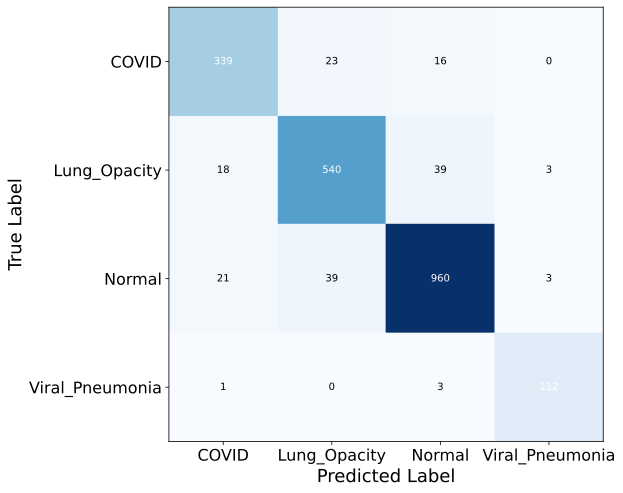

In [ ]:
net.eval()
test_dl = DataLoader(test_ds, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels)

In [ ]:
print('0.2\n0.3')

0.2
0.3


## DenseNet-121 timm masked unaug 64bs 15epochs

In [ ]:
covid_path = '/content/covid19/COVID-19_Radiography_Dataset'
masked_dataset=ImageFolder(covid_path+'/masked',transform=torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms())
train_ds, val_ds, test_ds= torch.utils.data.random_split(masked_dataset, [14815,4233,6350-4233], generator=torch.Generator().manual_seed(random_seed))
dataset_sizes={'train':len(train_ds),
               'val':len(val_ds),
               'test':len(test_ds)}

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs =32*k, 2e-3*k, 15
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), 
                num_epochs=num_epochs, device=device, dataset_sizes=dataset_sizes)

Epoch 0/14
----------
train Loss: 0.7642 Acc: 0.6947
val Loss: 0.8351 Acc: 0.6787

Epoch 1/14
----------
train Loss: 0.5302 Acc: 0.7931
val Loss: 0.7864 Acc: 0.6593

Epoch 2/14
----------
train Loss: 0.4545 Acc: 0.8284
val Loss: 0.6887 Acc: 0.7697

Epoch 3/14
----------
train Loss: 0.4022 Acc: 0.8489
val Loss: 0.5552 Acc: 0.7834

Epoch 4/14
----------
train Loss: 0.3561 Acc: 0.8688
val Loss: 0.5515 Acc: 0.7779

Epoch 5/14
----------
train Loss: 0.3175 Acc: 0.8844
val Loss: 0.4157 Acc: 0.8436

Epoch 6/14
----------
train Loss: 0.2889 Acc: 0.8936
val Loss: 0.4943 Acc: 0.8242

Epoch 7/14
----------
train Loss: 0.2686 Acc: 0.9025
val Loss: 0.5746 Acc: 0.8124

Epoch 8/14
----------
train Loss: 0.1791 Acc: 0.9407
val Loss: 0.2656 Acc: 0.9107

Epoch 9/14
----------
train Loss: 0.1396 Acc: 0.9522
val Loss: 0.2736 Acc: 0.9086

Epoch 10/14
----------
train Loss: 0.1190 Acc: 0.9582
val Loss: 0.2845 Acc: 0.9067

Epoch 11/14
----------
train Loss: 0.1028 Acc: 0.9638
val Loss: 0.2884 Acc: 0.9126

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_ft_64bs_15ep_916.pt'
torch.save(net.state_dict(),PATH)

test_loss: 0.2555, test_acc: 0.9172


<Figure size 432x288 with 0 Axes>

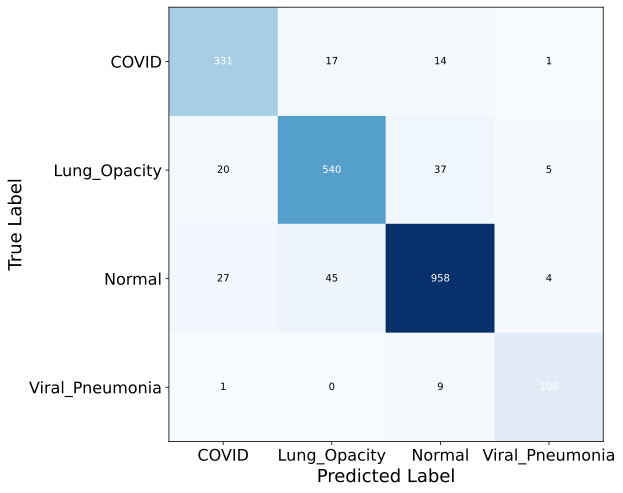

In [ ]:
net.eval()
test_dl = DataLoader(test_ds, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels)

## DenseNet-121 timm masked unaug 16bs 15epochs

In [ ]:
covid_path = '/content/covid19/COVID-19_Radiography_Dataset'
masked_dataset=ImageFolder(covid_path+'/masked',transform=torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms())
train_ds, val_ds, test_ds= torch.utils.data.random_split(masked_dataset, [14815,4233,6350-4233], generator=torch.Generator().manual_seed(random_seed))
dataset_sizes={'train':len(train_ds),
               'val':len(val_ds),
               'test':len(test_ds)}

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs =int(32*k), 2e-3*k, 15
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), 
                num_epochs=num_epochs, device=device, dataset_sizes=dataset_sizes)

Epoch 0/14
----------
train Loss: 0.5700 Acc: 0.7792
val Loss: 0.4703 Acc: 0.8197

Epoch 1/14
----------
train Loss: 0.3970 Acc: 0.8545
val Loss: 0.4338 Acc: 0.8417

Epoch 2/14
----------
train Loss: 0.3362 Acc: 0.8784
val Loss: 0.3582 Acc: 0.8656

Epoch 3/14
----------
train Loss: 0.2882 Acc: 0.8959
val Loss: 0.3751 Acc: 0.8703

Epoch 4/14
----------
train Loss: 0.2585 Acc: 0.9081
val Loss: 0.2792 Acc: 0.9013

Epoch 5/14
----------
train Loss: 0.2272 Acc: 0.9200
val Loss: 0.2796 Acc: 0.8920

Epoch 6/14
----------
train Loss: 0.2063 Acc: 0.9271
val Loss: 0.3769 Acc: 0.8670

Epoch 7/14
----------
train Loss: 0.1831 Acc: 0.9350
val Loss: 0.2702 Acc: 0.9067

Epoch 8/14
----------
train Loss: 0.0927 Acc: 0.9706
val Loss: 0.2165 Acc: 0.9289

Epoch 9/14
----------
train Loss: 0.0607 Acc: 0.9804
val Loss: 0.2234 Acc: 0.9301

Epoch 10/14
----------
train Loss: 0.0386 Acc: 0.9887
val Loss: 0.2657 Acc: 0.9249

Epoch 11/14
----------
train Loss: 0.0271 Acc: 0.9919
val Loss: 0.2669 Acc: 0.9251

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_ft_16bs_15ep_916.pt'
torch.save(net.state_dict(),PATH)

test_loss: 0.2290, test_acc: 0.9198


<Figure size 432x288 with 0 Axes>

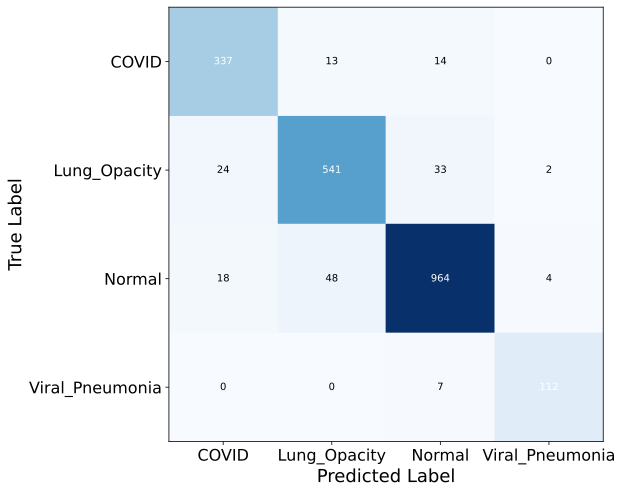

In [ ]:
net.eval()
test_dl = DataLoader(test_ds, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels)

## DenseNet-121 timm masked unaug 8bs 15epochs

In [ ]:
covid_path = '/content/covid19/COVID-19_Radiography_Dataset'
masked_dataset=ImageFolder(covid_path+'/masked',transform=torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms())
train_ds, val_ds, test_ds= torch.utils.data.random_split(masked_dataset, [14815,4233,6350-4233], generator=torch.Generator().manual_seed(random_seed))
dataset_sizes={'train':len(train_ds),
               'val':len(val_ds),
               'test':len(test_ds)}

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.25
batch_size, lr, num_epochs =int(32*k), 2e-3*k, 15
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), 
                num_epochs=num_epochs, device=device, dataset_sizes=dataset_sizes)

Epoch 0/14
----------
train Loss: 0.5611 Acc: 0.7849
val Loss: 0.6964 Acc: 0.7104

Epoch 1/14
----------
train Loss: 0.3830 Acc: 0.8589
val Loss: 0.3050 Acc: 0.8883

Epoch 2/14
----------
train Loss: 0.3198 Acc: 0.8837
val Loss: 0.4378 Acc: 0.8410

Epoch 3/14
----------
train Loss: 0.2740 Acc: 0.9010
val Loss: 0.3102 Acc: 0.8885

Epoch 4/14
----------
train Loss: 0.2372 Acc: 0.9166
val Loss: 0.2653 Acc: 0.9053

Epoch 5/14
----------
train Loss: 0.2112 Acc: 0.9247
val Loss: 0.3252 Acc: 0.8873

Epoch 6/14
----------
train Loss: 0.1864 Acc: 0.9336
val Loss: 0.3008 Acc: 0.8984

Epoch 7/14
----------
train Loss: 0.1600 Acc: 0.9440
val Loss: 0.2949 Acc: 0.9008

Epoch 8/14
----------
train Loss: 0.0713 Acc: 0.9766
val Loss: 0.2335 Acc: 0.9265

Epoch 9/14
----------
train Loss: 0.0391 Acc: 0.9885
val Loss: 0.2554 Acc: 0.9268

Epoch 10/14
----------
train Loss: 0.0226 Acc: 0.9942
val Loss: 0.2927 Acc: 0.9275

Epoch 11/14
----------
train Loss: 0.0157 Acc: 0.9955
val Loss: 0.3338 Acc: 0.9173

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_ft_8bs_15ep_916.pt'
torch.save(net.state_dict(),PATH)

test_loss: 0.2778, test_acc: 0.9293


<Figure size 432x288 with 0 Axes>

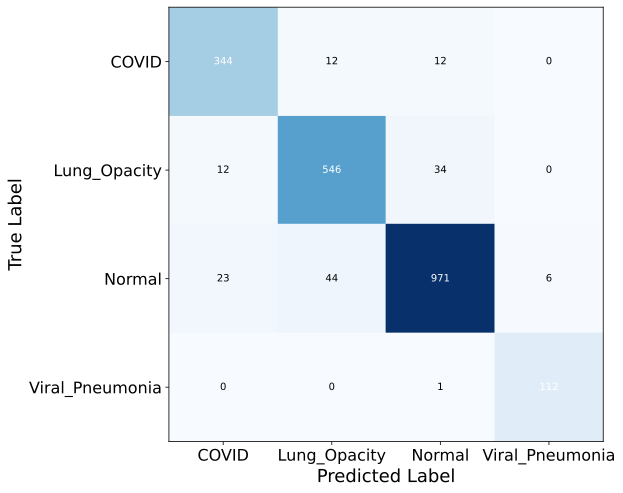

In [ ]:
net.eval()
test_dl = DataLoader(test_ds, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels)

## DenseNet-121 timm masked unaug 32bs 90epochs_best

In [ ]:
transformer = {
    'train': T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                          ]),
    'val':  T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                        ])
    }
train_ds_trans = DatasetFromSubset(train_ds, transform=transformer['train'])
val_ds_trans = DatasetFromSubset(val_ds, transform=transformer['val'])
test_ds_trans = DatasetFromSubset(test_ds, transform=transformer['val'])

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 90
milestones =[8,30,60]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_ds_trans, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds_trans, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), num_epochs=num_epochs, device=device)

Epoch 0/89
----------
train Loss: 0.5938 Acc: 0.7710
val Loss: 0.7365 Acc: 0.7491

Epoch 1/89
----------
train Loss: 0.4051 Acc: 0.8466
val Loss: 0.7387 Acc: 0.7236

Epoch 2/89
----------
train Loss: 0.3447 Acc: 0.8726
val Loss: 0.4995 Acc: 0.8245

Epoch 3/89
----------
train Loss: 0.2982 Acc: 0.8896
val Loss: 0.4644 Acc: 0.8382

Epoch 4/89
----------
train Loss: 0.2627 Acc: 0.9053
val Loss: 0.6766 Acc: 0.7378

Epoch 5/89
----------
train Loss: 0.2440 Acc: 0.9123
val Loss: 0.3786 Acc: 0.8604

Epoch 6/89
----------
train Loss: 0.2139 Acc: 0.9219
val Loss: 0.3385 Acc: 0.8842

Epoch 7/89
----------
train Loss: 0.1893 Acc: 0.9322
val Loss: 0.3002 Acc: 0.8899

Epoch 8/89
----------
train Loss: 0.1003 Acc: 0.9660
val Loss: 0.2296 Acc: 0.9246

Epoch 9/89
----------
train Loss: 0.0677 Acc: 0.9781
val Loss: 0.2405 Acc: 0.9263

Epoch 10/89
----------
train Loss: 0.0504 Acc: 0.9828
val Loss: 0.2631 Acc: 0.9235

Epoch 11/89
----------
train Loss: 0.0351 Acc: 0.9891
val Loss: 0.2916 Acc: 0.9173

Ep

test_loss: 0.2298, test_acc: 0.9223


<Figure size 432x288 with 0 Axes>

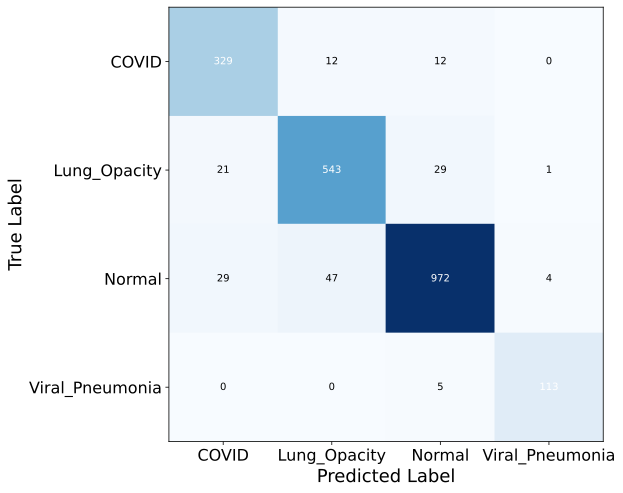

In [ ]:
test_dl = DataLoader(test_ds_trans, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels)

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_ft_90_915.pkl')
# Load model
# model = torch.load('/content/gdrive/MyDrive/model/covid/resnet18_001_15_100.pkl')


In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_unaug_ft_90_915.pkl'
net = torch.load(PATH)

test_loss: 0.2298, test_acc: 0.9223


<Figure size 432x288 with 0 Axes>

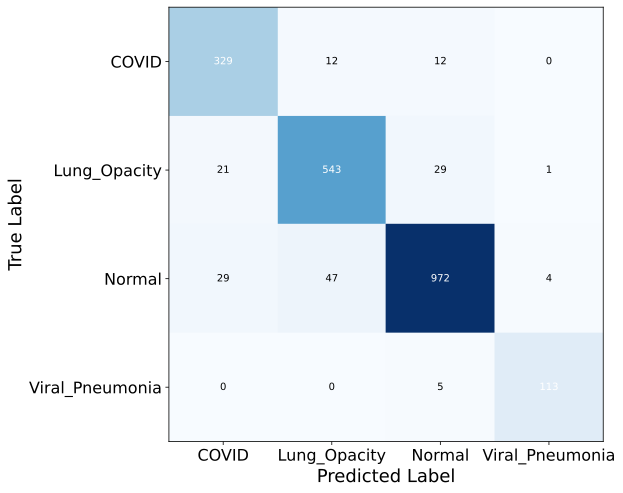

In [ ]:
net = net.to(device)
net.eval()
test_dl = DataLoader(test_ds_trans, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels)

In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_ft_90_915.pt'
torch.save(net.state_dict(),PATH)

## DenseNet-121 timm raw unaug 32bs 30epochs_best

In [ ]:
transformer = {
    'train': T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                          ]),
    'val':  T.Compose([
                        torchvision.models.DenseNet121_Weights.IMAGENET1K_V1.transforms()
                        ])
    }
raw_train_ds_trans = DatasetFromSubset(raw_train_ds, transform=transformer['train'])
raw_val_ds_trans = DatasetFromSubset(raw_val_ds, transform=transformer['val'])
raw_test_ds_trans = DatasetFromSubset(raw_test_ds, transform=transformer['val'])

train_ds_trans = DatasetFromSubset(train_ds, transform=transformer['train'])
val_ds_trans = DatasetFromSubset(val_ds, transform=transformer['val'])
test_ds_trans = DatasetFromSubset(test_ds, transform=transformer['val'])

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(raw_train_ds_trans, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(raw_val_ds_trans, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), num_epochs=num_epochs, device=device)

Epoch 0/29
----------
train Loss: 0.4584 Acc: 0.8290
val Loss: 0.5403 Acc: 0.8039

Epoch 1/29
----------
train Loss: 0.2754 Acc: 0.8983
val Loss: 0.9449 Acc: 0.7992

Epoch 2/29
----------
train Loss: 0.2204 Acc: 0.9214
val Loss: 0.2196 Acc: 0.9199

Epoch 3/29
----------
train Loss: 0.1948 Acc: 0.9324
val Loss: 0.2999 Acc: 0.8831

Epoch 4/29
----------
train Loss: 0.1700 Acc: 0.9398
val Loss: 0.3031 Acc: 0.9031

Epoch 5/29
----------
train Loss: 0.1563 Acc: 0.9449
val Loss: 0.3160 Acc: 0.8913

Epoch 6/29
----------
train Loss: 0.1376 Acc: 0.9519
val Loss: 0.2323 Acc: 0.9171

Epoch 7/29
----------
train Loss: 0.1214 Acc: 0.9576
val Loss: 0.5528 Acc: 0.8566

Epoch 8/29
----------
train Loss: 0.0635 Acc: 0.9785
val Loss: 0.1740 Acc: 0.9476

Epoch 9/29
----------
train Loss: 0.0340 Acc: 0.9900
val Loss: 0.1770 Acc: 0.9492

Epoch 10/29
----------
train Loss: 0.0187 Acc: 0.9947
val Loss: 0.1936 Acc: 0.9506

Epoch 11/29
----------
train Loss: 0.0095 Acc: 0.9981
val Loss: 0.2256 Acc: 0.9468

Ep

test_loss: 0.1842, test_acc: 0.9516


<Figure size 432x288 with 0 Axes>

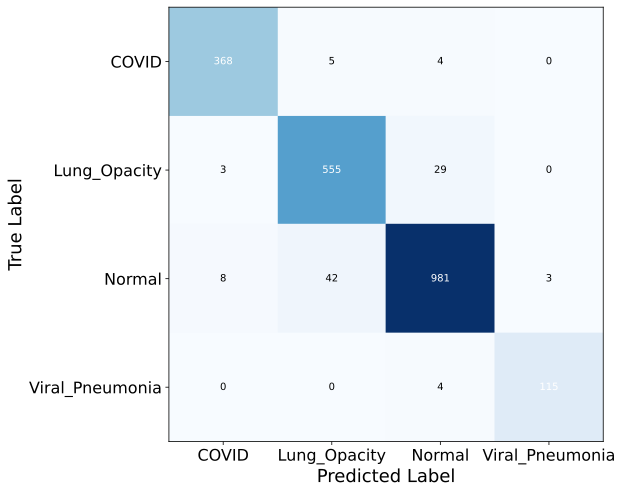

In [ ]:
test_dl = DataLoader(raw_test_ds_trans, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels)

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_ft_916.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
# Load model
# model = torch.load('/content/gdrive/MyDrive/model/covid/resnet18_001_15_100.pkl')
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_ft_916.pkl'
net.load_state_dict(torch.load(PATH))
net=net.to(device)
net.eval()
# net = torch.load('/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')
# net.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNormAct2d(
          128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
  

In [ ]:
test_dl = DataLoader(raw_test_ds_trans, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)


test_loss: 0.1842, test_acc: 0.9516


In [ ]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics import classification_report
measure_result=classification_report(labels, preds, target_names=raw_dataset.classes)
print('measure_result = \n', measure_result)
 
print("accuracy：%.2f" % accuracy_score(labels, preds))
print("precision：%.2f" % precision_score(labels, preds, labels=[0, 1, 2, 3], average='macro'))
print("recall：%.2f" % recall_score(labels, preds, labels=[0, 1, 2,3], average='macro'))
print("f1-score：%.2f" % f1_score(labels, preds, labels=[0, 1, 2,3], average='macro'))


measure_result = 
                  precision    recall  f1-score   support

          COVID       0.98      0.97      0.97       379
   Lung_Opacity       0.95      0.92      0.93       602
         Normal       0.95      0.96      0.96      1018
Viral Pneumonia       0.97      0.97      0.97       118

       accuracy                           0.95      2117
      macro avg       0.96      0.96      0.96      2117
   weighted avg       0.95      0.95      0.95      2117

accuracy：0.95
precision：0.96
recall：0.96
f1-score：0.96


<Figure size 432x288 with 0 Axes>

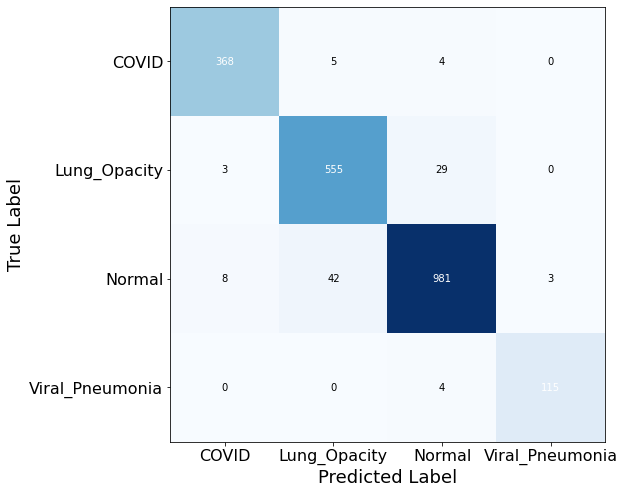

In [ ]:
plot_cm(preds,labels,path='./cm_raw_covid.svg')

In [ ]:
cm_fig.savefig('covid_cm.svg')

# Weighted Loss

## Plan A


$$M=\sum_{i=1}^n{N_i}$$
$$w_i=1-\frac{N_i}{M}$$
$$\sum_{i=1}^n{w_i}=n-1$$

### DenseNet-121 timm raw unaug 32bs 10epochs_pretrained on ImageNet_Weighted Loss_fine-tuned

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 10
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, batch_size, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, num_epochs=num_epochs, device=device, use_weighted_loss=True)

Epoch 0/9
----------
train Loss: 0.4531 Acc: 0.8342
val Loss: 0.3697 Acc: 0.8590

Epoch 1/9
----------
train Loss: 0.2836 Acc: 0.9010
val Loss: 0.4449 Acc: 0.8389

Epoch 2/9
----------
train Loss: 0.2289 Acc: 0.9183
val Loss: 0.3312 Acc: 0.8821

Epoch 3/9
----------
train Loss: 0.2053 Acc: 0.9277
val Loss: 0.2673 Acc: 0.9046

Epoch 4/9
----------
train Loss: 0.1722 Acc: 0.9372
val Loss: 0.4686 Acc: 0.8372

Epoch 5/9
----------
train Loss: 0.1584 Acc: 0.9441
val Loss: 0.1993 Acc: 0.9253

Epoch 6/9
----------
train Loss: 0.1365 Acc: 0.9514
val Loss: 0.2276 Acc: 0.9225

Epoch 7/9
----------
train Loss: 0.1234 Acc: 0.9561
val Loss: 0.2194 Acc: 0.9213

Epoch 8/9
----------
train Loss: 0.0607 Acc: 0.9787
val Loss: 0.1663 Acc: 0.9450

Epoch 9/9
----------
train Loss: 0.0350 Acc: 0.9885
val Loss: 0.1748 Acc: 0.9476

Training complete in 21m 1s
Best val Acc: 0.947555


In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_weighted_loss_ft_920.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.1612, test_acc: 0.9510


<Figure size 432x288 with 0 Axes>

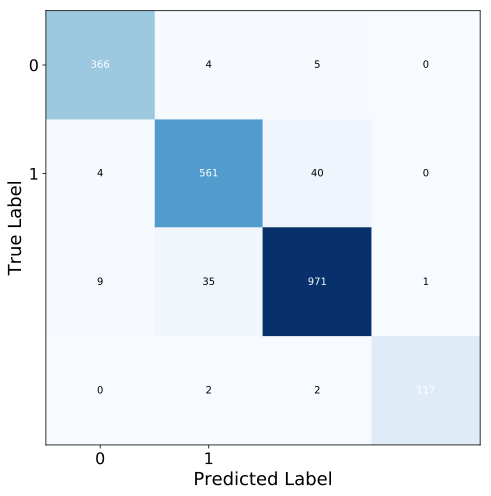

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels)


In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.98      0.97      0.97       379
   Lung_Opacity       0.93      0.93      0.93       602
         Normal       0.96      0.95      0.95      1018
Viral Pneumonia       0.97      0.99      0.98       118

       accuracy                           0.95      2117
      macro avg       0.96      0.96      0.96      2117
   weighted avg       0.95      0.95      0.95      2117



### DenseNet-121 timm raw unaug 64bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs =32*k, 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, num_epochs=num_epochs, device=device, use_weighted_loss=True)

Epoch 0/29
----------
train Loss: 0.5695 Acc: 0.7860
val Loss: 0.9245 Acc: 0.6204

Epoch 1/29
----------
train Loss: 0.3133 Acc: 0.8872
val Loss: 0.3291 Acc: 0.8781

Epoch 2/29
----------
train Loss: 0.2542 Acc: 0.9104
val Loss: 0.6172 Acc: 0.7378

Epoch 3/29
----------
train Loss: 0.2124 Acc: 0.9234
val Loss: 0.6754 Acc: 0.7224

Epoch 4/29
----------
train Loss: 0.1831 Acc: 0.9339
val Loss: 0.3611 Acc: 0.8672

Epoch 5/29
----------
train Loss: 0.1679 Acc: 0.9412
val Loss: 0.2783 Acc: 0.9027

Epoch 6/29
----------
train Loss: 0.1434 Acc: 0.9473
val Loss: 0.4694 Acc: 0.8431

Epoch 7/29
----------
train Loss: 0.1310 Acc: 0.9530
val Loss: 0.2558 Acc: 0.9124

Epoch 8/29
----------
train Loss: 0.0629 Acc: 0.9778
val Loss: 0.1797 Acc: 0.9388

Epoch 9/29
----------
train Loss: 0.0377 Acc: 0.9867
val Loss: 0.1980 Acc: 0.9400

Epoch 10/29
----------
train Loss: 0.0240 Acc: 0.9926
val Loss: 0.2202 Acc: 0.9376

Epoch 11/29
----------
train Loss: 0.0156 Acc: 0.9954
val Loss: 0.2380 Acc: 0.9398

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_64bs_weighted_loss_ft_920.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.2928, test_acc: 0.9502


<Figure size 432x288 with 0 Axes>

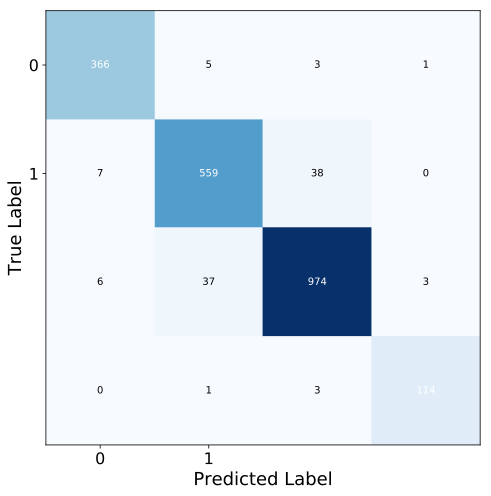

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels)


In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.98      0.97      0.97       379
   Lung_Opacity       0.93      0.93      0.93       602
         Normal       0.95      0.96      0.96      1018
Viral Pneumonia       0.97      0.97      0.97       118

       accuracy                           0.95      2117
      macro avg       0.96      0.95      0.95      2117
   weighted avg       0.95      0.95      0.95      2117



### DenseNet-121 timm raw unaug 32bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, batch_size, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, num_epochs=num_epochs, device=device, use_weighted_loss=True)

Epoch 0/29
----------
train Loss: 0.4750 Acc: 0.8290
val Loss: 0.4241 Acc: 0.8353

Epoch 1/29
----------
train Loss: 0.2882 Acc: 0.8975
val Loss: 0.9243 Acc: 0.7524

Epoch 2/29
----------
train Loss: 0.2438 Acc: 0.9118
val Loss: 0.3231 Acc: 0.8788

Epoch 3/29
----------
train Loss: 0.2071 Acc: 0.9265
val Loss: 0.3154 Acc: 0.8904

Epoch 4/29
----------
train Loss: 0.1776 Acc: 0.9362
val Loss: 0.2254 Acc: 0.9204

Epoch 5/29
----------
train Loss: 0.1605 Acc: 0.9438
val Loss: 0.2214 Acc: 0.9251

Epoch 6/29
----------
train Loss: 0.1347 Acc: 0.9503
val Loss: 0.2654 Acc: 0.9128

Epoch 7/29
----------
train Loss: 0.1313 Acc: 0.9526
val Loss: 0.2870 Acc: 0.8987

Epoch 8/29
----------
train Loss: 0.0584 Acc: 0.9802
val Loss: 0.1732 Acc: 0.9450

Epoch 9/29
----------
train Loss: 0.0333 Acc: 0.9892
val Loss: 0.2008 Acc: 0.9409

Epoch 10/29
----------
train Loss: 0.0210 Acc: 0.9939
val Loss: 0.2097 Acc: 0.9435

Epoch 11/29
----------
train Loss: 0.0128 Acc: 0.9974
val Loss: 0.2345 Acc: 0.9424

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_weighted_loss_ft_920.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.1384, test_acc: 0.9558


<Figure size 432x288 with 0 Axes>

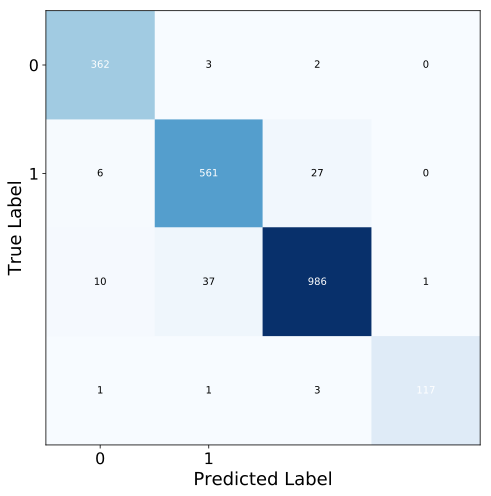

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels)


In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

### DenseNet-121 timm raw unaug 16bs 30epochs_1fc_pretrained on ImageNet_Weighted Loss_fine-tuned

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, num_epochs=num_epochs, device=device, use_weighted_loss=True)

train Loss: 0.0216 Acc: 0.9936
train Loss: 0.0216 Acc: 0.9936
val Loss: 0.1865 Acc: 0.9499

Epoch 10/29
----------
val Loss: 0.1865 Acc: 0.9499

Epoch 10/29
----------
train Loss: 0.0126 Acc: 0.9966
train Loss: 0.0126 Acc: 0.9966
val Loss: 0.2072 Acc: 0.9476

Epoch 11/29
----------
val Loss: 0.2072 Acc: 0.9476

Epoch 11/29
----------
train Loss: 0.0063 Acc: 0.9991
train Loss: 0.0063 Acc: 0.9991
val Loss: 0.2228 Acc: 0.9478

Epoch 12/29
----------
val Loss: 0.2228 Acc: 0.9478

Epoch 12/29
----------
train Loss: 0.0044 Acc: 0.9995
train Loss: 0.0044 Acc: 0.9995
val Loss: 0.2497 Acc: 0.9468

Epoch 13/29
----------
val Loss: 0.2497 Acc: 0.9468

Epoch 13/29
----------
train Loss: 0.0041 Acc: 0.9995
train Loss: 0.0041 Acc: 0.9995
val Loss: 0.2516 Acc: 0.9478

Epoch 14/29
----------
val Loss: 0.2516 Acc: 0.9478

Epoch 14/29
----------
train Loss: 0.0024 Acc: 0.9997
train Loss: 0.0024 Acc: 0.9997
val Loss: 0.2776 Acc: 0.9407

Epoch 15/29
----------
val Loss: 0.2776 Acc: 0.9407

Epoch 15/29
---

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_1fc_weighted_loss_ft_920.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.1588, test_acc: 0.9513
test_loss: 0.1588, test_acc: 0.9513


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

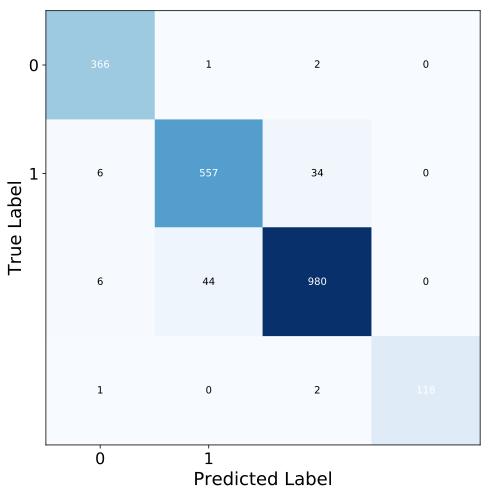

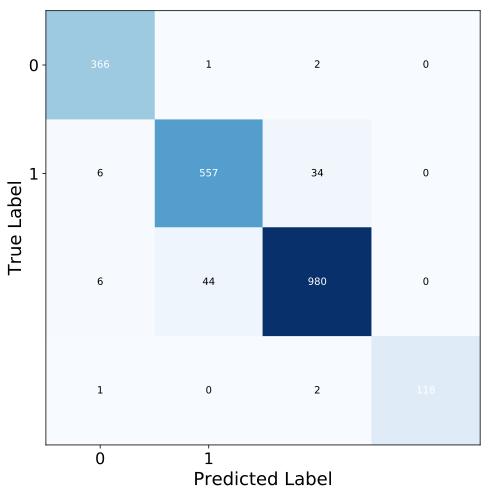

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

### DenseNet-121 timm raw unaug 16bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned_best

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, batch_size, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, num_epochs=num_epochs, device=device, use_weighted_loss=True)

Epoch 0/29
----------
train Loss: 0.4233 Acc: 0.8508
val Loss: 0.3142 Acc: 0.8840

Epoch 1/29
----------
train Loss: 0.2796 Acc: 0.9005
val Loss: 0.2702 Acc: 0.9043

Epoch 2/29
----------
train Loss: 0.2268 Acc: 0.9193
val Loss: 0.6732 Acc: 0.8330

Epoch 3/29
----------
train Loss: 0.1982 Acc: 0.9325
val Loss: 0.2578 Acc: 0.9095

Epoch 4/29
----------
train Loss: 0.1726 Acc: 0.9377
val Loss: 0.3517 Acc: 0.8772

Epoch 5/29
----------
train Loss: 0.1558 Acc: 0.9430
val Loss: 0.2152 Acc: 0.9301

Epoch 6/29
----------
train Loss: 0.1382 Acc: 0.9494
val Loss: 0.2079 Acc: 0.9242

Epoch 7/29
----------
train Loss: 0.1191 Acc: 0.9579
val Loss: 0.2518 Acc: 0.9263

Epoch 8/29
----------
train Loss: 0.0545 Acc: 0.9814
val Loss: 0.1581 Acc: 0.9490

Epoch 9/29
----------
train Loss: 0.0267 Acc: 0.9918
val Loss: 0.1721 Acc: 0.9509

Epoch 10/29
----------
train Loss: 0.0161 Acc: 0.9957
val Loss: 0.1974 Acc: 0.9445

Epoch 11/29
----------
train Loss: 0.0094 Acc: 0.9976
val Loss: 0.2267 Acc: 0.9447

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.2226, test_acc: 0.9586
test_loss: 0.2226, test_acc: 0.9586


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

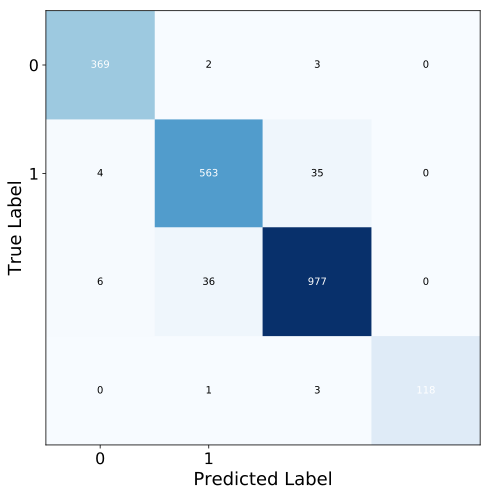

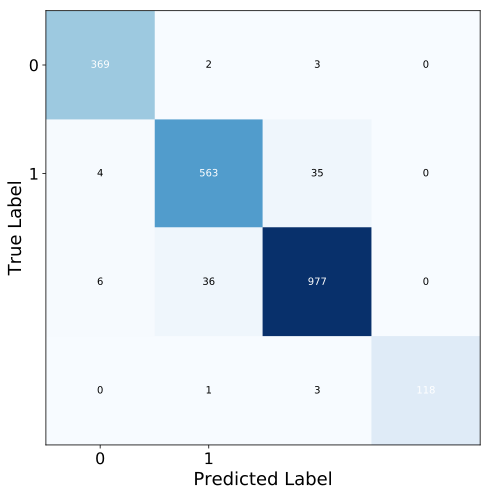

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels)


In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.99      0.97      0.98       379
   Lung_Opacity       0.94      0.94      0.94       602
         Normal       0.96      0.96      0.96      1018
Viral Pneumonia       0.97      1.00      0.98       118

       accuracy                           0.96      2117
      macro avg       0.96      0.97      0.96      2117
   weighted avg       0.96      0.96      0.96      2117

                 precision    recall  f1-score   support

          COVID       0.99      0.97      0.98       379
   Lung_Opacity       0.94      0.94      0.94       602
         Normal       0.96      0.96      0.96      1018
Viral Pneumonia       0.97      1.00      0.98       118

       accuracy                           0.96      2117
      macro avg       0.96      0.97      0.96      2117
   weighted avg       0.96      0.96      0.96      2117



### raw bs32 ep 10_pretrained on COVID_weighted loss=a_as fixed featrue extractor

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH =  '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 10
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, 
                num_epochs=num_epochs, device=device, dataset_sizes=pn_sizes, f_loss_weight=weigts_1_minus_p)

Epoch 0/9
----------
train Loss: 0.1407 Acc: 0.9517
val Loss: 0.4897 Acc: 0.7498

Epoch 1/9
----------
train Loss: 0.1204 Acc: 0.9612
val Loss: 0.3080 Acc: 0.8924

Epoch 2/9
----------
train Loss: 0.1098 Acc: 0.9617
val Loss: 0.1028 Acc: 0.9693

Epoch 3/9
----------
train Loss: 0.0943 Acc: 0.9676
val Loss: 0.0960 Acc: 0.9658

Epoch 4/9
----------
train Loss: 0.0992 Acc: 0.9693
val Loss: 0.0993 Acc: 0.9693

Epoch 5/9
----------
train Loss: 0.0784 Acc: 0.9737
val Loss: 0.1180 Acc: 0.9633

Epoch 6/9
----------
train Loss: 0.0854 Acc: 0.9678
val Loss: 0.0946 Acc: 0.9710

Epoch 7/9
----------
train Loss: 0.0754 Acc: 0.9732
val Loss: 0.5990 Acc: 0.8155

Epoch 8/9
----------
train Loss: 0.0868 Acc: 0.9715
val Loss: 0.0984 Acc: 0.9684

Epoch 9/9
----------
train Loss: 0.0652 Acc: 0.9739
val Loss: 0.0962 Acc: 0.9693

Training complete in 6m 60s
Best val Acc: 0.970965


In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_a_unaug_raw_fe_ep30_922.pt'
torch.save(net.state_dict(), PATH)

test_loss: 0.0754, test_acc: 0.9747


<Figure size 432x288 with 0 Axes>

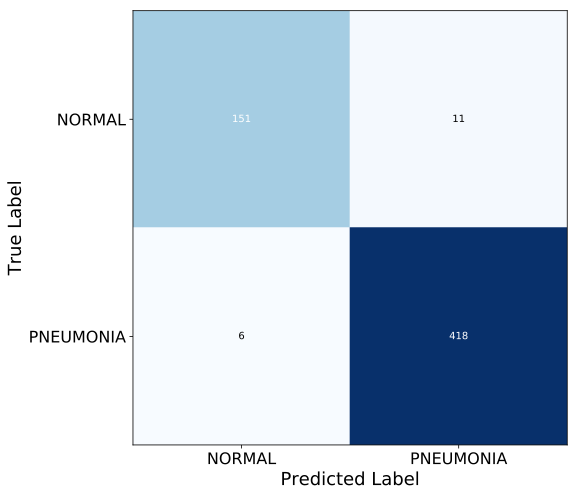

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_pn, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels,class_names=raw_pn_dataset.classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.93      0.96      0.95       157
   PNEUMONIA       0.99      0.97      0.98       429

    accuracy                           0.97       586
   macro avg       0.96      0.97      0.96       586
weighted avg       0.97      0.97      0.97       586



## Modified Plan A


$$M\ =\ \sum_{i=1}^n{N_i}$$
$$N_{(n)}\ =\ \mathop{max}\limits_{1\leq i\leq n}(N_i)$$
$$w_i\ =\ \frac{(1-\frac{N_i}{M})}{(1-\frac{N_{(n)}}{M})}$$
$$\sum_{i=1}^n{w_i}\ =\ \frac{n-1}{1-\frac{N_{(n)}}{M}}$$


### DenseNet-121 timm raw unaug 16bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, 
                num_epochs=num_epochs, device=device, dataset_sizes=covid_sizes, f_loss_weight=weigts_1_minus_p_m)

Epoch 0/29
----------
train Loss: 0.4210 Acc: 0.8468
val Loss: 0.3700 Acc: 0.8526

Epoch 1/29
----------
train Loss: 0.2753 Acc: 0.9012
val Loss: 0.2422 Acc: 0.9140

Epoch 2/29
----------
train Loss: 0.2217 Acc: 0.9211
val Loss: 0.2232 Acc: 0.9225

Epoch 3/29
----------
train Loss: 0.2032 Acc: 0.9302
val Loss: 0.4173 Acc: 0.8339

Epoch 4/29
----------
train Loss: 0.1720 Acc: 0.9386
val Loss: 0.3009 Acc: 0.8920

Epoch 5/29
----------
train Loss: 0.1528 Acc: 0.9443
val Loss: 0.2285 Acc: 0.9180

Epoch 6/29
----------
train Loss: 0.1312 Acc: 0.9524
val Loss: 0.1923 Acc: 0.9360

Epoch 7/29
----------
train Loss: 0.1165 Acc: 0.9593
val Loss: 0.2856 Acc: 0.9062

Epoch 8/29
----------
train Loss: 0.0506 Acc: 0.9826
val Loss: 0.1804 Acc: 0.9424

Epoch 9/29
----------
train Loss: 0.0250 Acc: 0.9925
val Loss: 0.1965 Acc: 0.9461

Epoch 10/29
----------
train Loss: 0.0155 Acc: 0.9953
val Loss: 0.2172 Acc: 0.9416

Epoch 11/29
----------
train Loss: 0.0076 Acc: 0.9982
val Loss: 0.2487 Acc: 0.9433

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ma_ft_922.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.2621, test_acc: 0.9516


<Figure size 432x288 with 0 Axes>

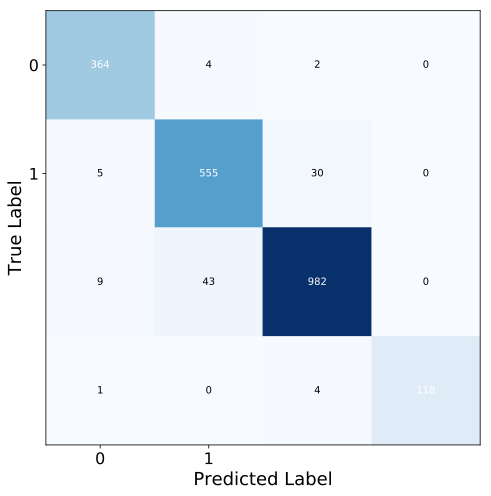

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels)


In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.98      0.96      0.97       379
   Lung_Opacity       0.94      0.92      0.93       602
         Normal       0.95      0.96      0.96      1018
Viral Pneumonia       0.96      1.00      0.98       118

       accuracy                           0.95      2117
      macro avg       0.96      0.96      0.96      2117
   weighted avg       0.95      0.95      0.95      2117



### raw bs32 ep 10_pretrained on COVID_weighted loss=ma_as fixed featrue extractor

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH =  '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 10
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, 
                num_epochs=num_epochs, device=device, dataset_sizes=pn_sizes, f_loss_weight=weigts_1_minus_p_m)

Epoch 0/9
----------
train Loss: 0.1414 Acc: 0.9539
val Loss: 0.1322 Acc: 0.9582

Epoch 1/9
----------
train Loss: 0.1145 Acc: 0.9627
val Loss: 0.0970 Acc: 0.9667

Epoch 2/9
----------
train Loss: 0.0984 Acc: 0.9668
val Loss: 0.0924 Acc: 0.9693

Epoch 3/9
----------
train Loss: 0.0911 Acc: 0.9688
val Loss: 0.0990 Acc: 0.9684

Epoch 4/9
----------
train Loss: 0.0849 Acc: 0.9712
val Loss: 0.1144 Acc: 0.9599

Epoch 5/9
----------
train Loss: 0.0859 Acc: 0.9705
val Loss: 0.3611 Acc: 0.8523

Epoch 6/9
----------
train Loss: 0.0918 Acc: 0.9690
val Loss: 0.1854 Acc: 0.9360

Epoch 7/9
----------
train Loss: 0.0797 Acc: 0.9707
val Loss: 0.1002 Acc: 0.9641

Epoch 8/9
----------
train Loss: 0.0652 Acc: 0.9763
val Loss: 0.1000 Acc: 0.9684

Epoch 9/9
----------
train Loss: 0.0589 Acc: 0.9783
val Loss: 0.0998 Acc: 0.9675

Training complete in 7m 27s
Best val Acc: 0.969257


In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_ma_unaug_raw_fe_ep30_922.pt'
torch.save(net.state_dict(), PATH)

test_loss: 0.0667, test_acc: 0.9689


<Figure size 432x288 with 0 Axes>

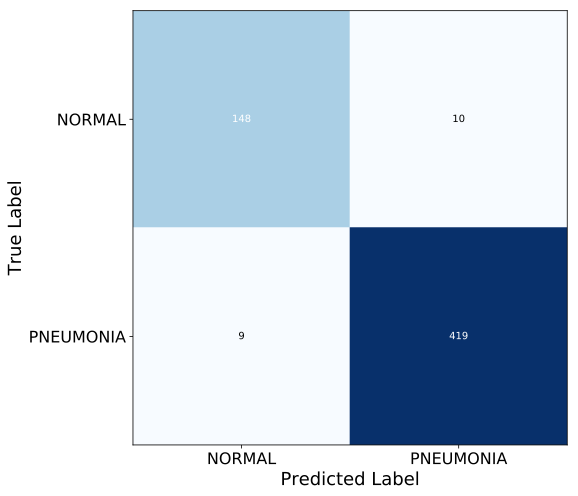

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_pn, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels,class_names=raw_pn_dataset.classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.94      0.94      0.94       157
   PNEUMONIA       0.98      0.98      0.98       429

    accuracy                           0.97       586
   macro avg       0.96      0.96      0.96       586
weighted avg       0.97      0.97      0.97       586



## Inverse Class Frequency

$$M\ =\ \sum_{i=1}^n{N_i}$$
$$w_i\ =\ \frac{M}{N_{i}}$$

### raw bs32 ep 10_pretrained on COVID_weighted loss=p_rcpl_as fixed featrue extractor

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH =  '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 10
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, 
                num_epochs=num_epochs, device=device, dataset_sizes=pn_sizes, f_loss_weight=weight_p_rcpl)

Epoch 0/9
----------
train Loss: 0.1524 Acc: 0.9427
val Loss: 0.1547 Acc: 0.9590

Epoch 1/9
----------
train Loss: 0.1190 Acc: 0.9593
val Loss: 0.1024 Acc: 0.9684

Epoch 2/9
----------
train Loss: 0.0999 Acc: 0.9666
val Loss: 0.0978 Acc: 0.9658

Epoch 3/9
----------
train Loss: 0.0953 Acc: 0.9668
val Loss: 0.1026 Acc: 0.9616

Epoch 4/9
----------
train Loss: 0.0912 Acc: 0.9690
val Loss: 0.0959 Acc: 0.9701

Epoch 5/9
----------
train Loss: 0.0901 Acc: 0.9685
val Loss: 0.2790 Acc: 0.8924

Epoch 6/9
----------
train Loss: 0.0935 Acc: 0.9680
val Loss: 0.1108 Acc: 0.9633

Epoch 7/9
----------
train Loss: 0.0855 Acc: 0.9668
val Loss: 0.1313 Acc: 0.9488

Epoch 8/9
----------
train Loss: 0.0710 Acc: 0.9780
val Loss: 0.0886 Acc: 0.9693

Epoch 9/9
----------
train Loss: 0.0577 Acc: 0.9785
val Loss: 0.0895 Acc: 0.9701

Training complete in 6m 48s
Best val Acc: 0.970111


In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_prs_unaug_raw_fe_ep30_922.pt'
torch.save(net.state_dict(), PATH)

test_loss: 0.0648, test_acc: 0.9702


<Figure size 432x288 with 0 Axes>

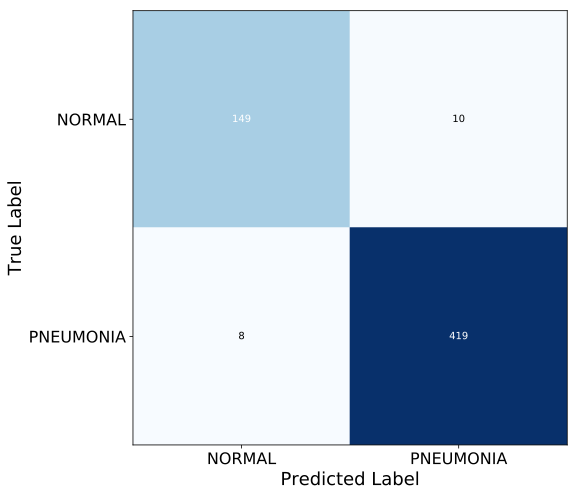

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_pn, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels,class_names=raw_pn_dataset.classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.94      0.95      0.94       157
   PNEUMONIA       0.98      0.98      0.98       429

    accuracy                           0.97       586
   macro avg       0.96      0.96      0.96       586
weighted avg       0.97      0.97      0.97       586



### raw bs32 ep 30_pretrained on COVID_weighted loss=p_rcpl_as fixed featrue extractor

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH =  '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, 
                num_epochs=num_epochs, device=device, dataset_sizes=pn_sizes, f_loss_weight=weight_p_rcpl)

Epoch 0/29
----------
train Loss: 0.1483 Acc: 0.9439
val Loss: 0.2677 Acc: 0.8975

Epoch 1/29
----------
train Loss: 0.1158 Acc: 0.9605
val Loss: 0.2745 Acc: 0.8693

Epoch 2/29
----------
train Loss: 0.1149 Acc: 0.9593
val Loss: 0.1010 Acc: 0.9667

Epoch 3/29
----------
train Loss: 0.0929 Acc: 0.9710
val Loss: 0.1069 Acc: 0.9684

Epoch 4/29
----------
train Loss: 0.0915 Acc: 0.9676
val Loss: 0.0904 Acc: 0.9701

Epoch 5/29
----------
train Loss: 0.0832 Acc: 0.9717
val Loss: 0.3340 Acc: 0.8950

Epoch 6/29
----------
train Loss: 0.0883 Acc: 0.9700
val Loss: 0.0928 Acc: 0.9693

Epoch 7/29
----------
train Loss: 0.0730 Acc: 0.9761
val Loss: 0.1075 Acc: 0.9650

Epoch 8/29
----------
train Loss: 0.0591 Acc: 0.9766
val Loss: 0.0906 Acc: 0.9658

Epoch 9/29
----------
train Loss: 0.0558 Acc: 0.9819
val Loss: 0.0886 Acc: 0.9693

Epoch 10/29
----------
train Loss: 0.0496 Acc: 0.9846
val Loss: 0.0920 Acc: 0.9701

Epoch 11/29
----------
train Loss: 0.0542 Acc: 0.9788
val Loss: 0.0891 Acc: 0.9684

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_prcpl_unaug_raw_fe_ep30_922.pt'
torch.save(net.state_dict(), PATH)

test_loss: 0.0615, test_acc: 0.9702


<Figure size 432x288 with 0 Axes>

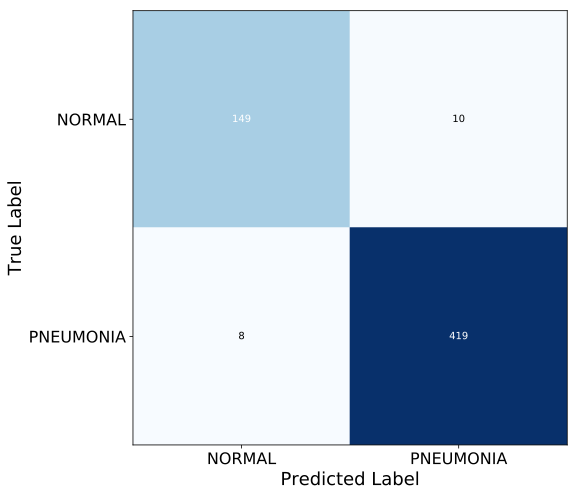

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_pn, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels,class_names=raw_pn_dataset.classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.94      0.95      0.94       157
   PNEUMONIA       0.98      0.98      0.98       429

    accuracy                           0.97       586
   macro avg       0.96      0.96      0.96       586
weighted avg       0.97      0.97      0.97       586



### DenseNet-121 timm raw unaug 16bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss,
                num_epochs=num_epochs, device=device, dataset_sizes=covid_sizes, f_loss_weight=weight_p_rcpl)

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_icf_ft_922.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
net.eval()
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels)


In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

## Focal Loss

### DenseNet-121 timm raw unaug 64bs 30epochs_pretrained on ImageNet_focal Loss_fine-tuneds 9406

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=None,
	gamma=2,
	reduction='mean',
	force_reload=False
)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------


Using cache found in /root/.cache/torch/hub/adeelh_pytorch-multi-class-focal-loss_master


train Loss: 0.2657 Acc: 0.7622
val Loss: 0.5559 Acc: 0.8117

Epoch 1/29
----------
train Loss: 0.1241 Acc: 0.8763
val Loss: 0.5064 Acc: 0.7867

Epoch 2/29
----------
train Loss: 0.0932 Acc: 0.9025
val Loss: 0.6118 Acc: 0.7645

Epoch 3/29
----------
train Loss: 0.0781 Acc: 0.9102
val Loss: 0.3873 Acc: 0.8611

Epoch 4/29
----------
train Loss: 0.0724 Acc: 0.9226
val Loss: 0.6136 Acc: 0.7685

Epoch 5/29
----------
train Loss: 0.0596 Acc: 0.9328
val Loss: 0.8349 Acc: 0.6367

Epoch 6/29
----------
train Loss: 0.0581 Acc: 0.9302
val Loss: 0.5900 Acc: 0.7860

Epoch 7/29
----------
train Loss: 0.0532 Acc: 0.9375
val Loss: 0.2956 Acc: 0.9109

Epoch 8/29
----------
train Loss: 0.0274 Acc: 0.9665
val Loss: 0.2089 Acc: 0.9454

Epoch 9/29
----------
train Loss: 0.0197 Acc: 0.9750
val Loss: 0.1981 Acc: 0.9445

Epoch 10/29
----------
train Loss: 0.0155 Acc: 0.9801
val Loss: 0.1994 Acc: 0.9409

Epoch 11/29
----------
train Loss: 0.0128 Acc: 0.9829
val Loss: 0.1816 Acc: 0.9412

Epoch 12/29
----------
t

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_'+str(k*32)+'bs_focal_loss_ft_'+datetime.datetime.now().strftime("%m%d")+'.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.2042, test_acc: 0.9406


<Figure size 432x288 with 0 Axes>

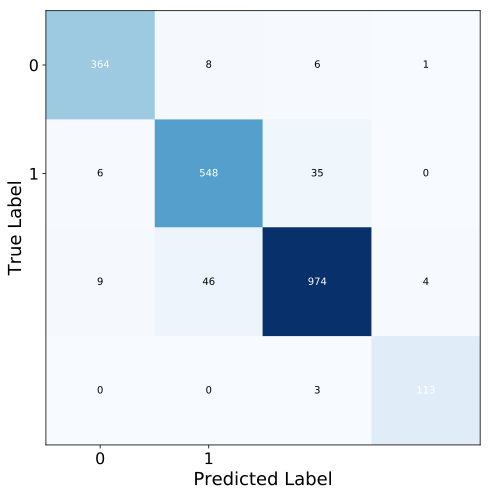

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.96      0.96      0.96       379
   Lung_Opacity       0.93      0.91      0.92       602
         Normal       0.94      0.96      0.95      1018
Viral Pneumonia       0.97      0.96      0.97       118

       accuracy                           0.94      2117
      macro avg       0.95      0.95      0.95      2117
   weighted avg       0.94      0.94      0.94      2117



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_ft_0922.pkl


### DenseNet-121 timm raw unaug 64bs 30epochs_pretrained on ImageNet_focal Loss_weighted_fine-tuneds 9454

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted(train_dl).to(device),
	gamma=2,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

NameError: ignored

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_'+str(k*32)+'bs_focal_loss_weightedM_ft_'+datetime.datetime.now().strftime("%m%d")+'.pt'
torch.save(net.state_dict(), PATH)

# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.2002, test_acc: 0.9454


<Figure size 432x288 with 0 Axes>

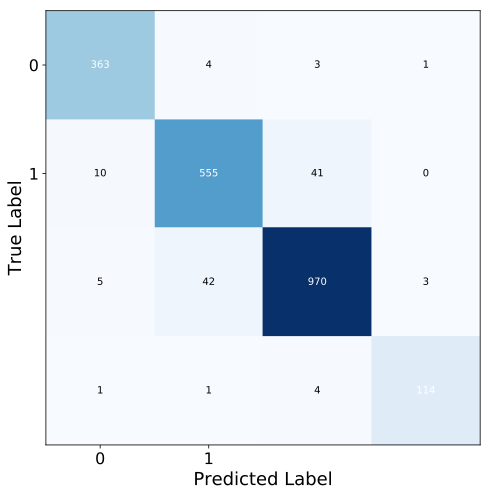

In [ ]:
preds, labels, cm=None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.98      0.96      0.97       379
   Lung_Opacity       0.92      0.92      0.92       602
         Normal       0.95      0.95      0.95      1018
Viral Pneumonia       0.95      0.97      0.96       118

       accuracy                           0.95      2117
      macro avg       0.95      0.95      0.95      2117
   weighted avg       0.95      0.95      0.95      2117



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl


### DenseNet-121 timm raw unaug 64bs 30epochs_pretrained on ImageNet_focal Loss_weightedM_fine-tuneds 9456

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,26]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted_m(train_dl).to(device),
	gamma=2,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------


Using cache found in /root/.cache/torch/hub/adeelh_pytorch-multi-class-focal-loss_master


train Loss: 0.3892 Acc: 0.7096


Exception ignored in: Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4f632ede60><function _MultiProcessingDataLoaderIter.__del__ at 0x7f4f632ede60>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4f632ede60>

Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f4f632ede60>  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__


Traceback (most recent call last):
      File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
Traceback (most recent call last):
self._shutdown_workers()  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
Traceback (most recent call last):
    self._shutdown_workers()

  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1510, in __del__
        self._shutdown_workers()  

val Loss: 0.5800 Acc: 0.7841

Epoch 1/29
----------
train Loss: 0.1992 Acc: 0.8470
val Loss: 0.7347 Acc: 0.7347

Epoch 2/29
----------
train Loss: 0.1454 Acc: 0.8802
val Loss: 0.5349 Acc: 0.7942

Epoch 3/29
----------
train Loss: 0.1203 Acc: 0.9016
val Loss: 0.6029 Acc: 0.7543

Epoch 4/29
----------
train Loss: 0.1008 Acc: 0.9108
val Loss: 0.5804 Acc: 0.7794

Epoch 5/29
----------
train Loss: 0.0881 Acc: 0.9209
val Loss: 0.3558 Acc: 0.8712

Epoch 6/29
----------
train Loss: 0.0797 Acc: 0.9275
val Loss: 0.5660 Acc: 0.7716

Epoch 7/29
----------
train Loss: 0.0726 Acc: 0.9328
val Loss: 0.3013 Acc: 0.9114

Epoch 8/29
----------
train Loss: 0.0393 Acc: 0.9618
val Loss: 0.2284 Acc: 0.9400

Epoch 9/29
----------
train Loss: 0.0291 Acc: 0.9691
val Loss: 0.2147 Acc: 0.9447

Epoch 10/29
----------
train Loss: 0.0228 Acc: 0.9769
val Loss: 0.2036 Acc: 0.9424

Epoch 11/29
----------
train Loss: 0.0198 Acc: 0.9791
val Loss: 0.1908 Acc: 0.9421

Epoch 12/29
----------
train Loss: 0.0154 Acc: 0.9827
v

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_'+str(k*32)+'bs_focal_loss_weighted_ft_'+datetime.datetime.now().strftime("%m%d")+'.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl


test_loss: 0.2160, test_acc: 0.9456


<Figure size 432x288 with 0 Axes>

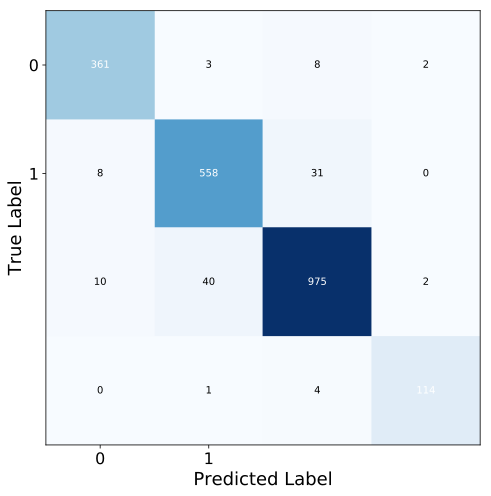

In [ ]:
preds,labels,cm=None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.97      0.95      0.96       379
   Lung_Opacity       0.93      0.93      0.93       602
         Normal       0.95      0.96      0.95      1018
Viral Pneumonia       0.96      0.97      0.96       118

       accuracy                           0.95      2117
      macro avg       0.95      0.95      0.95      2117
   weighted avg       0.95      0.95      0.95      2117



### DenseNet-121 timm raw unaug 64bs 30epochs_pretrained on ImageNet_focal Loss_icf_fine-tuneds 9332

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,26]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_icf(train_dl).to(device),
	gamma=2,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/adeelh/pytorch-multi-class-focal-loss/zipball/master" to /root/.cache/torch/hub/master.zip


Epoch 0/29
----------
train Loss: 1.2204 Acc: 0.6805
val Loss: 0.5475 Acc: 0.8094

Epoch 1/29
----------
train Loss: 0.5506 Acc: 0.8381
val Loss: 0.5237 Acc: 0.8223

Epoch 2/29
----------
train Loss: 0.4818 Acc: 0.8593
val Loss: 0.5187 Acc: 0.8283

Epoch 3/29
----------
train Loss: 0.3746 Acc: 0.8785
val Loss: 0.4809 Acc: 0.8056

Epoch 4/29
----------
train Loss: 0.2913 Acc: 0.9039
val Loss: 0.6108 Acc: 0.7364

Epoch 5/29
----------
train Loss: 0.2819 Acc: 0.9089
val Loss: 0.7894 Acc: 0.6927

Epoch 6/29
----------
train Loss: 0.2686 Acc: 0.9053
val Loss: 1.1793 Acc: 0.4248

Epoch 7/29
----------
train Loss: 0.2335 Acc: 0.9181
val Loss: 0.3645 Acc: 0.8930

Epoch 8/29
----------
train Loss: 0.1282 Acc: 0.9456
val Loss: 0.2503 Acc: 0.9346

Epoch 9/29
----------
train Loss: 0.0972 Acc: 0.9552
val Loss: 0.2391 Acc: 0.9350

Epoch 10/29
----------
train Loss: 0.0832 Acc: 0.9611
val Loss: 0.2230 Acc: 0.9388

Epoch 11/29
----------
train Loss: 0.0727 Acc: 0.9650
val Loss: 0.2104 Acc: 0.9409

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_'+str(k*32)+'bs_focal_loss_icf_ft_'+datetime.datetime.now().strftime("%m%d")+'.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_icf_ft_0922.pkl


test_loss: 0.2106, test_acc: 0.9332


<Figure size 432x288 with 0 Axes>

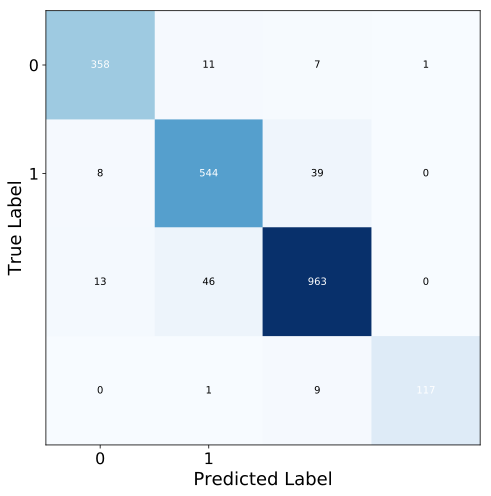

In [ ]:
preds,labels,cm=None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.95      0.94      0.95       379
   Lung_Opacity       0.92      0.90      0.91       602
         Normal       0.94      0.95      0.94      1018
Viral Pneumonia       0.92      0.99      0.96       118

       accuracy                           0.94      2117
      macro avg       0.93      0.95      0.94      2117
   weighted avg       0.94      0.94      0.94      2117



## fine-tune focal gama

### fine-tune_DenseNet-121 timm raw 64bs 30epochs_focal Loss_weighted_gamma=3 9489

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted(train_dl).to(device),
	gamma=3,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------


Using cache found in /root/.cache/torch/hub/adeelh_pytorch-multi-class-focal-loss_master


train Loss: 0.1381 Acc: 0.7127
val Loss: 0.9847 Acc: 0.5691

Epoch 1/29
----------
train Loss: 0.0672 Acc: 0.8432
val Loss: 0.6353 Acc: 0.8068

Epoch 2/29
----------
train Loss: 0.0513 Acc: 0.8765
val Loss: 0.6168 Acc: 0.8049

Epoch 3/29
----------
train Loss: 0.0433 Acc: 0.8871
val Loss: 0.4469 Acc: 0.8665

Epoch 4/29
----------
train Loss: 0.0361 Acc: 0.9032
val Loss: 0.5205 Acc: 0.7942

Epoch 5/29
----------
train Loss: 0.0301 Acc: 0.9190
val Loss: 0.4504 Acc: 0.9041

Epoch 6/29
----------
train Loss: 0.0286 Acc: 0.9157
val Loss: 0.4403 Acc: 0.8611

Epoch 7/29
----------
train Loss: 0.0230 Acc: 0.9262
val Loss: 0.3846 Acc: 0.8984

Epoch 8/29
----------
train Loss: 0.0140 Acc: 0.9515
val Loss: 0.3040 Acc: 0.9339

Epoch 9/29
----------
train Loss: 0.0105 Acc: 0.9579
val Loss: 0.2698 Acc: 0.9416

Epoch 10/29
----------
train Loss: 0.0087 Acc: 0.9650
val Loss: 0.2564 Acc: 0.9426

Epoch 11/29
----------
train Loss: 0.0077 Acc: 0.9663
val Loss: 0.2528 Acc: 0.9402

Epoch 12/29
----------
t

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_raw_'+str(k*32)+'bs_focal_loss_weighted_gamma3_ft'+datetime.datetime.now().strftime("%m%d")+'.pt'
torch.save(net.state_dict(), PATH)

# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.2484, test_acc: 0.9489


<Figure size 432x288 with 0 Axes>

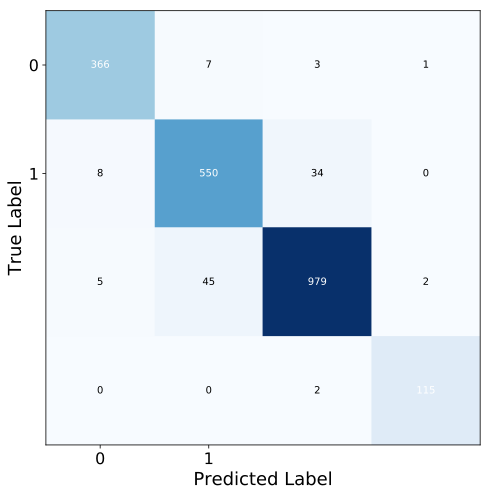

In [ ]:
preds, labels, cm=None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.97      0.97      0.97       379
   Lung_Opacity       0.93      0.91      0.92       602
         Normal       0.95      0.96      0.96      1018
Viral Pneumonia       0.98      0.97      0.98       118

       accuracy                           0.95      2117
      macro avg       0.96      0.95      0.96      2117
   weighted avg       0.95      0.95      0.95      2117



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_raw_64bs_focal_loss_weighted_gamma3_ft0922.pt


### fine-tune_DenseNet-121 timm raw 64bs 30epochs_focal Loss_weighted_gamma=3.5 9451

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted(train_dl).to(device),
	gamma=3.5,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------


Using cache found in /root/.cache/torch/hub/adeelh_pytorch-multi-class-focal-loss_master


train Loss: 0.1135 Acc: 0.7247
val Loss: 0.6683 Acc: 0.7718

Epoch 1/29
----------
train Loss: 0.0616 Acc: 0.8248
val Loss: 0.7136 Acc: 0.7208

Epoch 2/29
----------
train Loss: 0.0405 Acc: 0.8735
val Loss: 0.8898 Acc: 0.4900

Epoch 3/29
----------
train Loss: 0.0333 Acc: 0.8897
val Loss: 0.5106 Acc: 0.8580

Epoch 4/29
----------
train Loss: 0.0297 Acc: 0.9010
val Loss: 0.6588 Acc: 0.7576

Epoch 5/29
----------
train Loss: 0.0250 Acc: 0.9115
val Loss: 0.3952 Acc: 0.9138

Epoch 6/29
----------
train Loss: 0.0211 Acc: 0.9205
val Loss: 0.4219 Acc: 0.8906

Epoch 7/29
----------
train Loss: 0.0197 Acc: 0.9221
val Loss: 0.3723 Acc: 0.9171

Epoch 8/29
----------
train Loss: 0.0104 Acc: 0.9523
val Loss: 0.3147 Acc: 0.9329

Epoch 9/29
----------
train Loss: 0.0078 Acc: 0.9586
val Loss: 0.2854 Acc: 0.9357

Epoch 10/29
----------
train Loss: 0.0065 Acc: 0.9633
val Loss: 0.2755 Acc: 0.9379

Epoch 11/29
----------
train Loss: 0.0058 Acc: 0.9671
val Loss: 0.2682 Acc: 0.9379

Epoch 12/29
----------
t

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_raw_'+str(k*32)+'bs_focal_loss_weighted_gamma3_5_ft'+datetime.datetime.now().strftime("%m%d")+'.pt'
torch.save(net.state_dict(), PATH)

# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.2124, test_acc: 0.9451


<Figure size 432x288 with 0 Axes>

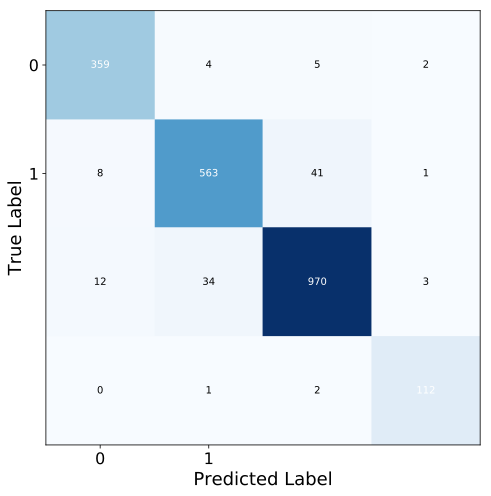

In [ ]:
preds, labels, cm=None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.97      0.95      0.96       379
   Lung_Opacity       0.92      0.94      0.93       602
         Normal       0.95      0.95      0.95      1018
Viral Pneumonia       0.97      0.95      0.96       118

       accuracy                           0.95      2117
      macro avg       0.95      0.95      0.95      2117
   weighted avg       0.95      0.95      0.95      2117



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_raw_64bs_focal_loss_weighted_gamma3_5_ft0922.pt


### fine-tune_DenseNet-121 timm raw 64bs 30epochs_focal Loss_weighted_gamma=4 9455

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted(train_dl).to(device),
	gamma=4,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------


Using cache found in /root/.cache/torch/hub/adeelh_pytorch-multi-class-focal-loss_master


train Loss: 0.0970 Acc: 0.7285
val Loss: 1.4844 Acc: 0.5344

Epoch 1/29
----------
train Loss: 0.0449 Acc: 0.8385
val Loss: 0.5936 Acc: 0.8346

Epoch 2/29
----------
train Loss: 0.0365 Acc: 0.8620
val Loss: 0.6916 Acc: 0.8131

Epoch 3/29
----------
train Loss: 0.0306 Acc: 0.8799
val Loss: 0.5642 Acc: 0.8651

Epoch 4/29
----------
train Loss: 0.0255 Acc: 0.8957
val Loss: 0.5141 Acc: 0.8689

Epoch 5/29
----------
train Loss: 0.0227 Acc: 0.9021
val Loss: 0.5654 Acc: 0.7971

Epoch 6/29
----------
train Loss: 0.0205 Acc: 0.9035
val Loss: 0.5163 Acc: 0.8351

Epoch 7/29
----------
train Loss: 0.0181 Acc: 0.9107
val Loss: 0.4445 Acc: 0.8807

Epoch 8/29
----------
train Loss: 0.0086 Acc: 0.9471
val Loss: 0.3452 Acc: 0.9331

Epoch 9/29
----------
train Loss: 0.0063 Acc: 0.9539
val Loss: 0.3276 Acc: 0.9313

Epoch 10/29
----------
train Loss: 0.0053 Acc: 0.9584
val Loss: 0.3114 Acc: 0.9324

Epoch 11/29
----------
train Loss: 0.0048 Acc: 0.9599
val Loss: 0.2994 Acc: 0.9350

Epoch 12/29
----------
t

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_raw_'+str(k*32)+'bs_focal_loss_weighted_gamma4_ft'+datetime.datetime.now().strftime("%m%d")+'.pt'
torch.save(net.state_dict(), PATH)

# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.2326, test_acc: 0.9455


<Figure size 432x288 with 0 Axes>

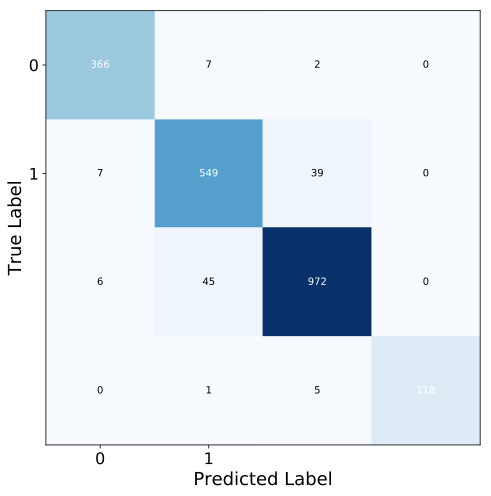

In [ ]:
preds, labels, cm=None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.98      0.97      0.97       379
   Lung_Opacity       0.92      0.91      0.92       602
         Normal       0.95      0.95      0.95      1018
Viral Pneumonia       0.95      1.00      0.98       118

       accuracy                           0.95      2117
      macro avg       0.95      0.96      0.95      2117
   weighted avg       0.95      0.95      0.95      2117



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_raw_64bs_focal_loss_weighted_gamma4_ft0922.pt


### fine-tune_DenseNet-121 timm raw 32bs 30epochs_focal Loss_weighted_gamma=3 9485

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted(train_dl).to(device),
	gamma=3,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/adeelh/pytorch-multi-class-focal-loss/zipball/master" to /root/.cache/torch/hub/master.zip


Epoch 0/29
----------
train Loss: 0.0944 Acc: 0.8045
val Loss: 0.6477 Acc: 0.7418

Epoch 1/29
----------
train Loss: 0.0525 Acc: 0.8689
val Loss: 0.9287 Acc: 0.5141

Epoch 2/29
----------
train Loss: 0.0398 Acc: 0.8986
val Loss: 0.4670 Acc: 0.8717

Epoch 3/29
----------
train Loss: 0.0337 Acc: 0.9089
val Loss: 0.4130 Acc: 0.8873

Epoch 4/29
----------
train Loss: 0.0285 Acc: 0.9158
val Loss: 0.4333 Acc: 0.8970

Epoch 5/29
----------
train Loss: 0.0282 Acc: 0.9208
val Loss: 0.3431 Acc: 0.9265

Epoch 6/29
----------
train Loss: 0.0242 Acc: 0.9289
val Loss: 0.3515 Acc: 0.9180

Epoch 7/29
----------
train Loss: 0.0226 Acc: 0.9305
val Loss: 0.3430 Acc: 0.9183

Epoch 8/29
----------
train Loss: 0.0120 Acc: 0.9578
val Loss: 0.2632 Acc: 0.9379

Epoch 9/29
----------
train Loss: 0.0083 Acc: 0.9663
val Loss: 0.2490 Acc: 0.9407

Epoch 10/29
----------
train Loss: 0.0065 Acc: 0.9721
val Loss: 0.2316 Acc: 0.9395

Epoch 11/29
----------
train Loss: 0.0051 Acc: 0.9775
val Loss: 0.2162 Acc: 0.9400

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_raw_'+str(k*32)+'bs_focal_loss_weighted_gamma3_ft'+datetime.datetime.now().strftime("%m%d")+'.pt'
torch.save(net.state_dict(), PATH)

# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.1499, test_acc: 0.9485


<Figure size 432x288 with 0 Axes>

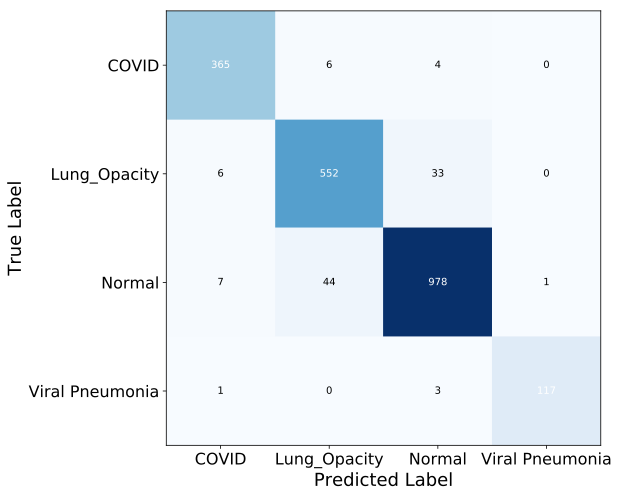

In [ ]:
preds, labels, cm=None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.97      0.96      0.97       379
   Lung_Opacity       0.93      0.92      0.93       602
         Normal       0.95      0.96      0.96      1018
Viral Pneumonia       0.97      0.99      0.98       118

       accuracy                           0.95      2117
      macro avg       0.96      0.96      0.96      2117
   weighted avg       0.95      0.95      0.95      2117



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_raw_32bs_focal_loss_weighted_gamma3_ft0923.pt


### fine-tune_DenseNet-121 timm raw 16bs 30epochs_focal Loss_weighted_gamma=3 9451

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted(train_dl).to(device),
	gamma=3,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------


Using cache found in /root/.cache/torch/hub/adeelh_pytorch-multi-class-focal-loss_master


train Loss: 0.0862 Acc: 0.8163
val Loss: 0.4304 Acc: 0.8760

Epoch 1/29
----------
train Loss: 0.0514 Acc: 0.8734
val Loss: 0.4577 Acc: 0.8831

Epoch 2/29
----------
train Loss: 0.0459 Acc: 0.8863
val Loss: 0.4700 Acc: 0.8807

Epoch 3/29
----------
train Loss: 0.0362 Acc: 0.9039
val Loss: 0.4046 Acc: 0.8979

Epoch 4/29
----------
train Loss: 0.0319 Acc: 0.9123
val Loss: 0.4178 Acc: 0.9062

Epoch 5/29
----------
train Loss: 0.0277 Acc: 0.9220
val Loss: 0.3614 Acc: 0.9261

Epoch 6/29
----------
train Loss: 0.0256 Acc: 0.9262
val Loss: 0.3338 Acc: 0.9246

Epoch 7/29
----------
train Loss: 0.0220 Acc: 0.9330
val Loss: 0.3202 Acc: 0.9213

Epoch 8/29
----------
train Loss: 0.0102 Acc: 0.9644
val Loss: 0.2515 Acc: 0.9457

Epoch 9/29
----------
train Loss: 0.0072 Acc: 0.9721
val Loss: 0.2237 Acc: 0.9447

Epoch 10/29
----------
train Loss: 0.0056 Acc: 0.9766
val Loss: 0.2135 Acc: 0.9459

Epoch 11/29
----------
train Loss: 0.0044 Acc: 0.9835
val Loss: 0.1920 Acc: 0.9487

Epoch 12/29
----------
t

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_raw_'+str(k*32)+'bs_focal_loss_weighted_gamma3_ft'+datetime.datetime.now().strftime("%m%d")+'.pt'
torch.save(net.state_dict(), PATH)

# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.1514, test_acc: 0.9451


<Figure size 432x288 with 0 Axes>

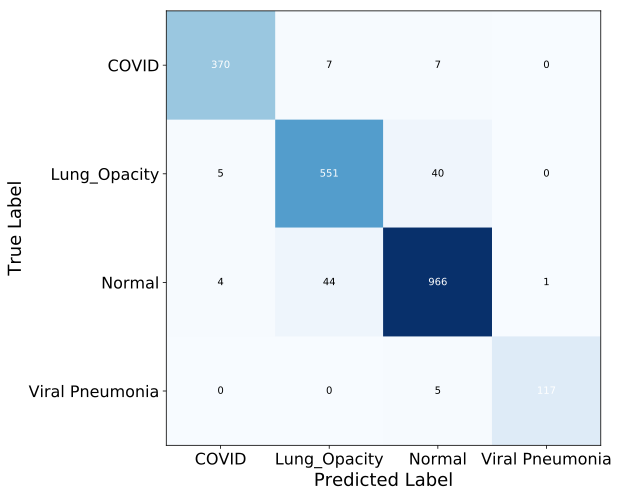

In [ ]:
preds, labels, cm=None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.96      0.98      0.97       379
   Lung_Opacity       0.92      0.92      0.92       602
         Normal       0.95      0.95      0.95      1018
Viral Pneumonia       0.96      0.99      0.97       118

       accuracy                           0.95      2117
      macro avg       0.95      0.96      0.95      2117
   weighted avg       0.95      0.95      0.95      2117



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/covid/densenet121_raw_16.0bs_focal_loss_weighted_gamma3_ft0923.pt


# Expt

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_ft_916.pkl'
net.load_state_dict(torch.load(PATH))
net=net.to(device)
net.eval()

test_loss: 0.1842, test_acc: 0.9516


<Figure size 432x288 with 0 Axes>

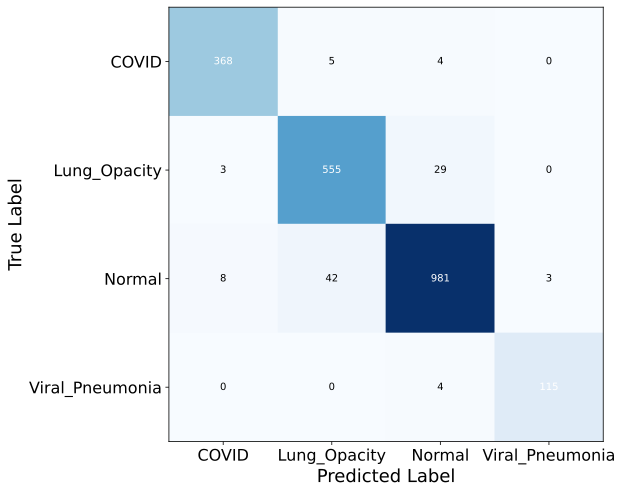

In [ ]:
test_dl = DataLoader(raw_test_ds_trans, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels)

In [ ]:
X = np.random.uniform(size=(1, 32, 224, 224))
net.eval()
# net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

TypeError: ignored

In [ ]:
X, y, logits = None, None, None
for X, y in train_dl:
    X=X.to(device)
    y=y.to(device)
    print(X.shape, X.dtype, y.shape, y.dtype)
    print(y.shape)
    logits = model(X).to(device)
    break

torch.Size([50, 3, 224, 224]) torch.float32 torch.Size([50]) torch.int64
torch.Size([50])


In [ ]:
pred_probab = nn.Softmax(dim=1)(logits)

In [ ]:
y_pred = pred_probab.argmax(1)

In [ ]:
y_pred == y

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True], device='cuda:0')

# Test

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) 
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)), preds

In [ ]:
def validation_step(batch):
  images,labels = batch
  images,labels = images.to(device),labels.to(device)
  out = model(images)                                      
  loss = F.cross_entropy(out, labels)                    
  acc,preds = accuracy(out, labels)                       

  return {'val_loss': loss.detach(), 'val_acc':acc.detach(), 
          'preds':preds.detach(), 'labels':labels.detach()}

In [ ]:
def test_prediction(outputs):
  batch_losses = [x['val_loss'] for x in outputs]
  epoch_loss = torch.stack(batch_losses).mean()           
  batch_accs = [x['val_acc'] for x in outputs]
  epoch_acc = torch.stack(batch_accs).mean()             
  # combine predictions
  batch_preds = [pred for x in outputs for pred in x['preds'].tolist()] 
  # combine labels
  batch_labels = [lab for x in outputs for lab in x['labels'].tolist()]  

  return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item(),
          'test_preds': batch_preds, 'test_labels': batch_labels}  

In [ ]:
@torch.no_grad()
def test_predict(model, test_loader):
    model.eval()
    # perform testing for each batch
    outputs = [validation_step(batch) for batch in test_loader] 
    results = test_prediction(outputs)                          
    print('test_loss: {:.4f}, test_acc: {:.4f}'
          .format(results['test_loss'], results['test_acc']))
    
    return results['test_preds'], results['test_labels']

##  Calculation of some more metrics and visualization of predictions

In [ ]:
def plot_cm(labels, preds):
  cm  = confusion_matrix(labels, preds)
  # Plot confusion matrix
  plt.figure()
  plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
  plt.xticks(range(4), ['Normal','Lung_Opacity','Viral_Pneumonia','COVID'], fontsize=16)
  plt.yticks(range(4), ['Normal','Lung_Opacity','Viral_Pneumonia','COVID'], fontsize=16)
  plt.xlabel('Predicted Label',fontsize=18)
  plt.ylabel('True Label',fontsize=18)
  plt.show()

In [ ]:
cm  = confusion_matrix(labels, preds)

In [ ]:
cm

array([[965,  43,   7,  18],
       [ 50, 519,   1,  28],
       [  4,   0, 126,   0],
       [ 25,  24,   0, 307]])

<Figure size 432x288 with 0 Axes>

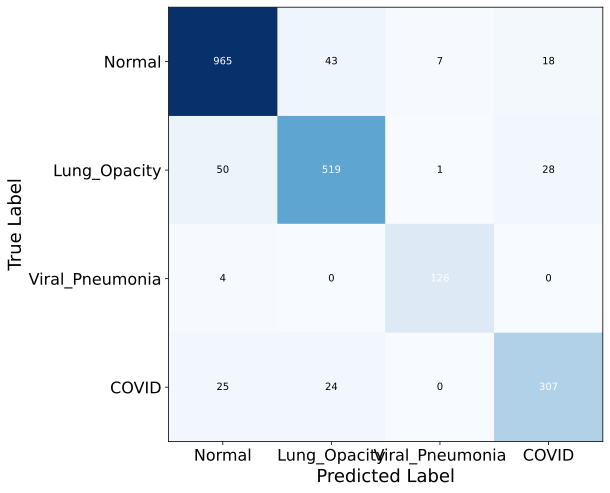

In [ ]:
# Plot confusion matrix

plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
plt.xticks(range(4), ['Normal','Lung_Opacity','Viral_Pneumonia','COVID'], fontsize=16)
plt.yticks(range(4), ['Normal','Lung_Opacity','Viral_Pneumonia','COVID'], fontsize=16)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()

* Next, let's calculate recall, precision and f1 score. This is one of the most key metrics for classification problems.

In [ ]:
# Compute Performance Metrics
tn, fp, fn, tp = cm.ravel()

accuracy = (np.array(preds) == np.array(labels)).sum() / len(preds)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*((precision*recall)/(precision+recall))

print("Accuracy of the model is {:.2f}".format(accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1 Score of the model is {:.2f}".format(f1))

ValueError: ignored

## Visualize some of test results

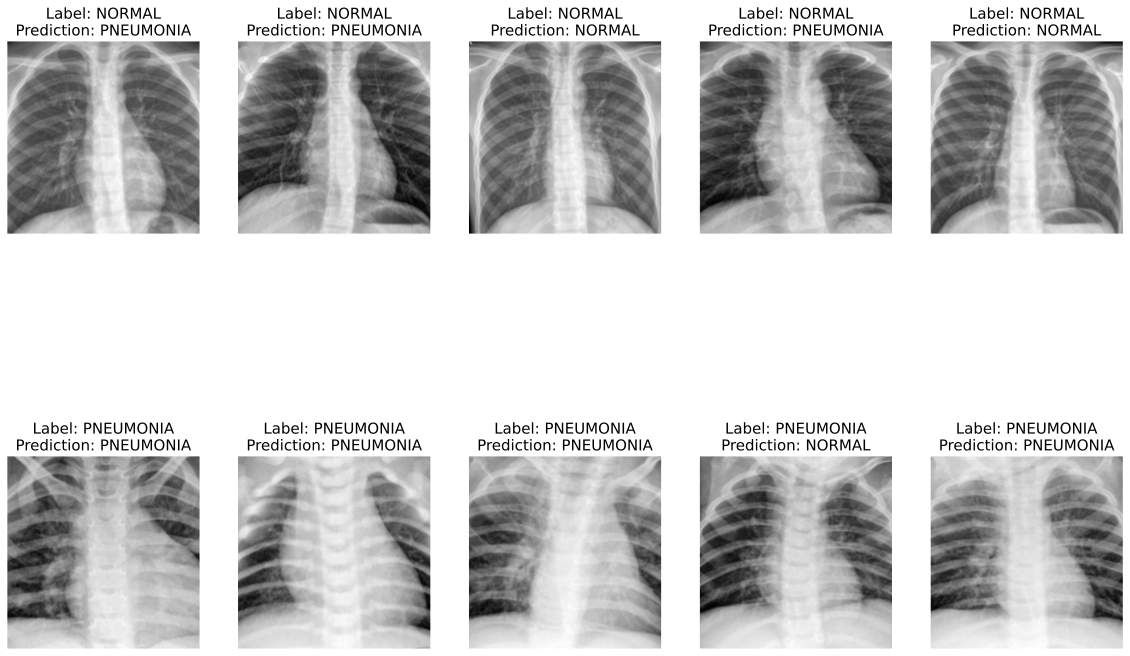

In [ ]:
# select 5 normal and 5 pneumonia images indices
idxs = torch.tensor(np.append(np.arange(start=0, stop=5, step=1), 
                             np.arange(start=500, stop=505, step=1))) 

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,14))

for c,i in enumerate(idxs):
    img_tensor, label = testset[i]
    ax[c//5][c%5].imshow(img_tensor[0,:,:], cmap='gray')
    ax[c//5][c%5].set_title('Label: {}\nPrediction: {}'
                            .format(testset.classes[label], 
                                    testset.classes[preds[i]]),
                            fontsize=15)
    ax[c//5][c%5].axis('off')

# Transfer learning on Pneumonia Classification


## raw none bs16

In [ ]:
net = timm.create_model('densenet121', pretrained=False, num_classes=2)
# net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.2911 Acc: 0.8761
val Loss: 0.4152 Acc: 0.8702

Epoch 1/29
----------
train Loss: 0.2290 Acc: 0.9158
val Loss: 0.1635 Acc: 0.9360

Epoch 2/29
----------
train Loss: 0.2078 Acc: 0.9232
val Loss: 0.1914 Acc: 0.9317

Epoch 3/29
----------
train Loss: 0.1925 Acc: 0.9314
val Loss: 0.1283 Acc: 0.9530

Epoch 4/29
----------
train Loss: 0.1807 Acc: 0.9363
val Loss: 0.1904 Acc: 0.9377

Epoch 5/29
----------
train Loss: 0.1737 Acc: 0.9400
val Loss: 0.1972 Acc: 0.9257

Epoch 6/29
----------
train Loss: 0.1564 Acc: 0.9434
val Loss: 0.1591 Acc: 0.9445

Epoch 7/29
----------
train Loss: 0.1394 Acc: 0.9519
val Loss: 0.1706 Acc: 0.9342

Epoch 8/29
----------
train Loss: 0.1061 Acc: 0.9624
val Loss: 0.1210 Acc: 0.9564

Epoch 9/29
----------
train Loss: 0.0903 Acc: 0.9654
val Loss: 0.1130 Acc: 0.9582

Epoch 10/29
----------
train Loss: 0.1008 Acc: 0.9612
val Loss: 0.1136 Acc: 0.9616

Epoch 11/29
----------
train Loss: 0.0802 Acc: 0.9717
val Loss: 0.1125 Acc: 0.9590

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/tt/RGB_densenet121_unaug_raw_weighted_cf_16bs_ft_1017.pt'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.0773, test_acc: 0.9659


<Figure size 432x288 with 0 Axes>

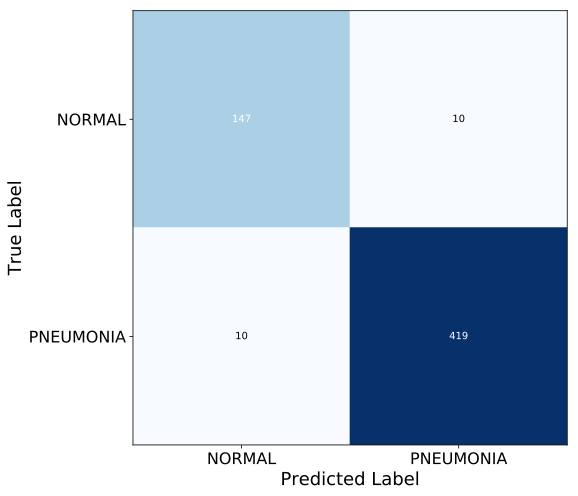

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_pn, num_workers=4, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes, digits=4)
print(report)

              precision    recall  f1-score   support

      NORMAL     0.9363    0.9363    0.9363       157
   PNEUMONIA     0.9767    0.9767    0.9767       429

    accuracy                         0.9659       586
   macro avg     0.9565    0.9565    0.9565       586
weighted avg     0.9659    0.9659    0.9659       586



## raw ImageNet bs16_fe

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=2)
# net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

In [ ]:
for name, param in net.named_parameters():
  if param.requires_grad is not None:
    param.requires_grad = False

for param in net.classifier.parameters():
  if (param.requires_grad is not None) and (param.requires_grad==False):
    param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.2839 Acc: 0.8919
val Loss: 0.1561 Acc: 0.9453

Epoch 1/29
----------
train Loss: 0.1858 Acc: 0.9322
val Loss: 0.1581 Acc: 0.9479

Epoch 2/29
----------
train Loss: 0.1630 Acc: 0.9390
val Loss: 0.2285 Acc: 0.9172

Epoch 3/29
----------
train Loss: 0.1574 Acc: 0.9417
val Loss: 0.1756 Acc: 0.9351

Epoch 4/29
----------
train Loss: 0.1508 Acc: 0.9419
val Loss: 0.1498 Acc: 0.9539

Epoch 5/29
----------
train Loss: 0.1266 Acc: 0.9502
val Loss: 0.1522 Acc: 0.9522

Epoch 6/29
----------
train Loss: 0.1149 Acc: 0.9573
val Loss: 0.1863 Acc: 0.9360

Epoch 7/29
----------
train Loss: 0.1162 Acc: 0.9568
val Loss: 0.1911 Acc: 0.9505

Epoch 8/29
----------
train Loss: 0.0875 Acc: 0.9666
val Loss: 0.1796 Acc: 0.9419

Epoch 9/29
----------
train Loss: 0.0757 Acc: 0.9717
val Loss: 0.1737 Acc: 0.9496

Epoch 10/29
----------
train Loss: 0.0776 Acc: 0.9693
val Loss: 0.1657 Acc: 0.9513

Epoch 11/29
----------
train Loss: 0.0839 Acc: 0.9719
val Loss: 0.1655 Acc: 0.9530

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/tt/RGB_densenet121_ImageNet_unaug_raw_weighted_cf_16bs_fe_1017.pt'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/RGB_densenet121_ImageNet_unaug_raw_weighted_cf_16bs_fe_1017.pt'
net.load_state_dict(torch.load(PATH))
net.to(device)

test_loss: 0.1401, test_acc: 0.9488


<Figure size 432x288 with 0 Axes>

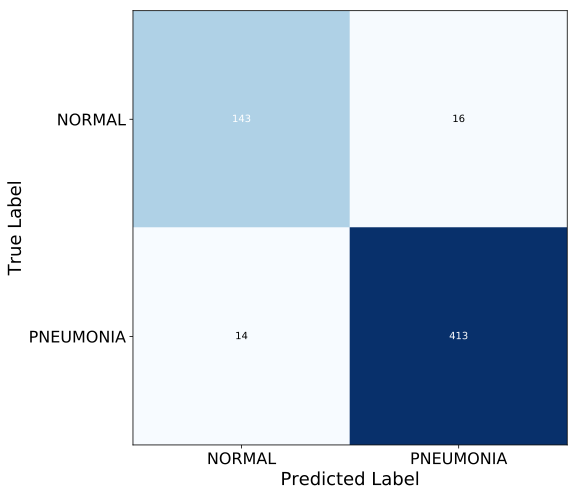

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_pn, num_workers=4, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes, digits=4)
print(report)

              precision    recall  f1-score   support

      NORMAL     0.8994    0.9108    0.9051       157
   PNEUMONIA     0.9672    0.9627    0.9650       429

    accuracy                         0.9488       586
   macro avg     0.9333    0.9368    0.9350       586
weighted avg     0.9490    0.9488    0.9489       586



## raw COVID bs16 ft

In [ ]:
net = timm.create_model('densenet121', pretrained=False, num_classes=4)
# net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.classifier[2]=nn.Linear(64,2)
net.to(device)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, batch_size=len(val_raw_pn), num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.1901 Acc: 0.9349
val Loss: 0.1171 Acc: 0.9607

Epoch 1/29
----------
train Loss: 0.0928 Acc: 0.9702
val Loss: 0.1141 Acc: 0.9633

Epoch 2/29
----------
train Loss: 0.0632 Acc: 0.9751
val Loss: 0.1162 Acc: 0.9701

Epoch 3/29
----------
train Loss: 0.0504 Acc: 0.9798
val Loss: 0.1190 Acc: 0.9658

Epoch 4/29
----------
train Loss: 0.0454 Acc: 0.9844
val Loss: 0.1666 Acc: 0.9675

Epoch 5/29
----------
train Loss: 0.0326 Acc: 0.9876
val Loss: 0.1133 Acc: 0.9761

Epoch 6/29
----------
train Loss: 0.0237 Acc: 0.9907
val Loss: 0.1392 Acc: 0.9684

Epoch 7/29
----------
train Loss: 0.0442 Acc: 0.9851
val Loss: 0.1222 Acc: 0.9650

Epoch 8/29
----------
train Loss: 0.0205 Acc: 0.9944
val Loss: 0.0991 Acc: 0.9744

Epoch 9/29
----------
train Loss: 0.0056 Acc: 0.9993
val Loss: 0.1024 Acc: 0.9769

Epoch 10/29
----------
train Loss: 0.0050 Acc: 0.9993
val Loss: 0.1060 Acc: 0.9778

Epoch 11/29
----------
train Loss: 0.0025 Acc: 1.0000
val Loss: 0.1076 Acc: 0.9778

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/tt/RGB_densenet121_unaug_raw_COVID_cf_16bs_ft_1018.pt'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.0649, test_acc: 0.9829


<Figure size 432x288 with 0 Axes>

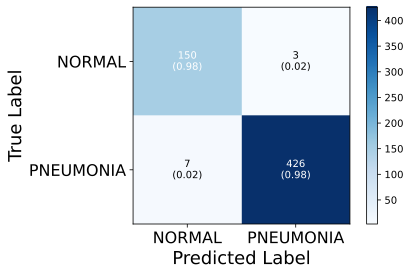

In [ ]:
net.to(device)
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_pn,batch_size=len(test_raw_pn), num_workers=4, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

<Figure size 432x288 with 0 Axes>

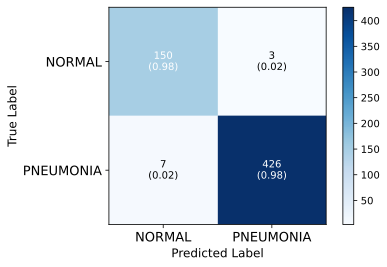

In [ ]:
cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes, digits=4)
print(report)

              precision    recall  f1-score   support

      NORMAL     0.9804    0.9554    0.9677       157
   PNEUMONIA     0.9838    0.9930    0.9884       429

    accuracy                         0.9829       586
   macro avg     0.9821    0.9742    0.9781       586
weighted avg     0.9829    0.9829    0.9829       586



In [ ]:
net = timm.create_model('densenet121', pretrained=False, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
PATH = '/content/gdrive/MyDrive/model/tt/RGB_densenet121_unaug_raw_COVID_cf_16bs_ft_1018.pt'
net.load_state_dict(torch.load(PATH))
# net.to(device)

<All keys matched successfully>

In [ ]:
test_dl = DataLoader(test_raw_pn,batch_size=len(test_raw_pn), num_workers=4, pin_memory=True)
images = None
labels = None
for batch in test_dl:
  images=batch[0]
  labels = batch[1]

In [ ]:
labels=list(labels.numpy())

In [ ]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(labels, classes=[0,1])

In [ ]:
y= np.hstack((1-y, y))

In [ ]:
net.to(device)

In [ ]:
images= images.to(device)

In [ ]:
logits = None
with torch.no_grad():
  net.eval()
  logits = net(images)
y_score = nn.Softmax(dim=1)(logits)

In [ ]:
n_classes = y.shape[1]

In [ ]:
y_test = np.array(labels).reshape(-1,1)

In [ ]:
y_test= np.hstack((1-y_test, y_test))

In [ ]:
y_score=y_score.detach().cpu().numpy()

In [ ]:
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

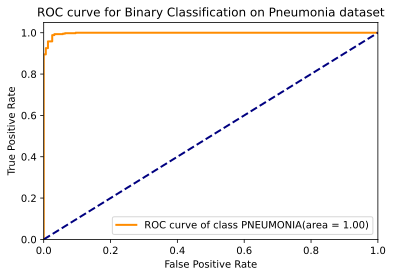

In [ ]:
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve of class PNEUMONIA(area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Binary Classification on Pneumonia dataset")
plt.legend(loc="lower right")
plt.savefig('roc_pneumonia.png')
plt.show()

In [ ]:
plt.show()

## raw bs32 ep 10

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_ft_916.pkl'
net.load_state_dict(torch.load(PATH))
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 10
milestones =[8]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(pn_raw_train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(pn_raw_val_ds, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), num_epochs=num_epochs, device=device)

Epoch 0/9
----------
train Loss: 0.1321 Acc: 0.9576
val Loss: 0.2012 Acc: 0.9257

Epoch 1/9
----------
train Loss: 0.1044 Acc: 0.9641
val Loss: 0.1076 Acc: 0.9693

Epoch 2/9
----------
train Loss: 0.1026 Acc: 0.9644
val Loss: 0.1679 Acc: 0.9453

Epoch 3/9
----------
train Loss: 0.0957 Acc: 0.9639
val Loss: 0.2504 Acc: 0.8898

Epoch 4/9
----------
train Loss: 0.0872 Acc: 0.9646
val Loss: 0.1070 Acc: 0.9641

Epoch 5/9
----------
train Loss: 0.0778 Acc: 0.9729
val Loss: 0.1114 Acc: 0.9641

Epoch 6/9
----------
train Loss: 0.0755 Acc: 0.9719
val Loss: 0.1498 Acc: 0.9479

Epoch 7/9
----------
train Loss: 0.0729 Acc: 0.9734
val Loss: 0.1215 Acc: 0.9616

Epoch 8/9
----------
train Loss: 0.0556 Acc: 0.9798
val Loss: 0.1056 Acc: 0.9701

Epoch 9/9
----------
train Loss: 0.0504 Acc: 0.9827
val Loss: 0.1020 Acc: 0.9718

Training complete in 7m 3s
Best val Acc: 0.971819


In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_ft_916.pt'
torch.save(net.state_dict(), PATH)

In [ ]:
raw_pn_dataset.class_to_idx

{'NORMAL': 0, 'PNEUMONIA': 1}

<Figure size 432x288 with 0 Axes>

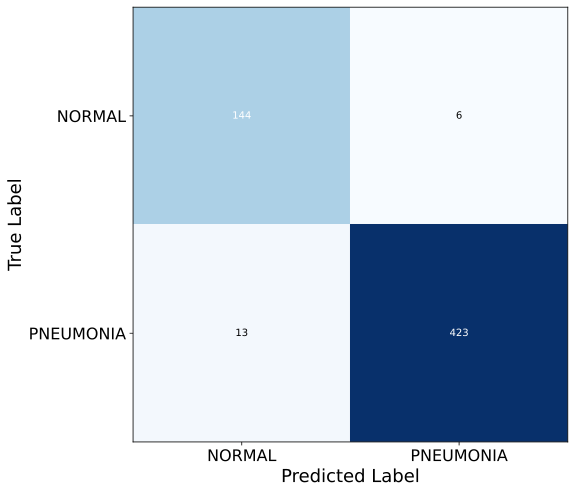

In [ ]:
net.eval()
test_dl = DataLoader(pn_raw_test_ds, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels,class_names=pneumonia_classes)

In [ ]:
# Load model
# model = torch.load('/content/gdrive/MyDrive/model/covid/resnet18_001_15_100.pkl')
net = timm.create_model('densenet121', pretrained=True, num_classes=2)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_ft_916.pt'
net.load_state_dict(torch.load(PATH))
net=net.to(device)
net.eval()
# net = torch.load('/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')
# net.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNormAct2d(
          128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
  

test_loss: 0.0714, test_acc: 0.9625


<Figure size 432x288 with 0 Axes>

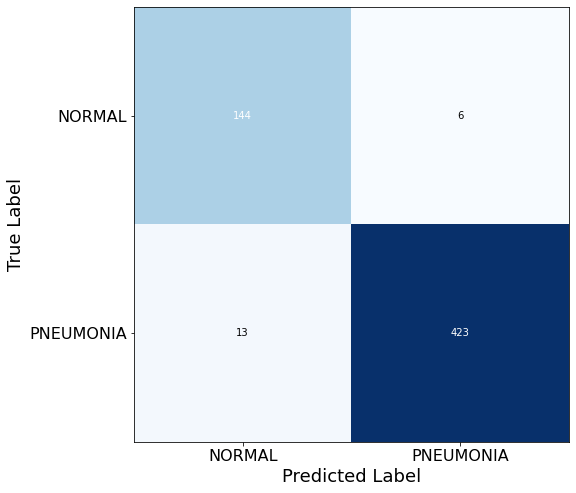

In [ ]:
net.eval()
test_dl = DataLoader(pn_raw_test_ds, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels,class_names=pneumonia_classes)

## raw bs32 ep 30_pretrained on COVID_as fixed feature extractor

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_ft_916.pkl'
net.load_state_dict(torch.load(PATH))
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(pn_raw_train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(pn_raw_val_ds, batch_size, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), num_epochs=num_epochs, device=device)

Epoch 0/29
----------
train Loss: 0.1522 Acc: 0.9473
val Loss: 0.1357 Acc: 0.9599

Epoch 1/29
----------
train Loss: 0.1120 Acc: 0.9605
val Loss: 0.1087 Acc: 0.9658

Epoch 2/29
----------
train Loss: 0.1030 Acc: 0.9641
val Loss: 0.2902 Acc: 0.8933

Epoch 3/29
----------
train Loss: 0.0939 Acc: 0.9676
val Loss: 0.1121 Acc: 0.9658

Epoch 4/29
----------
train Loss: 0.0851 Acc: 0.9690
val Loss: 0.1210 Acc: 0.9667

Epoch 5/29
----------
train Loss: 0.0809 Acc: 0.9702
val Loss: 0.1127 Acc: 0.9658

Epoch 6/29
----------
train Loss: 0.0680 Acc: 0.9741
val Loss: 0.1032 Acc: 0.9675

Epoch 7/29
----------
train Loss: 0.0734 Acc: 0.9722
val Loss: 0.1305 Acc: 0.9641

Epoch 8/29
----------
train Loss: 0.0493 Acc: 0.9810
val Loss: 0.1109 Acc: 0.9684

Epoch 9/29
----------
train Loss: 0.0490 Acc: 0.9810
val Loss: 0.1124 Acc: 0.9710

Epoch 10/29
----------
train Loss: 0.0488 Acc: 0.9827
val Loss: 0.1040 Acc: 0.9701

Epoch 11/29
----------
train Loss: 0.0457 Acc: 0.9851
val Loss: 0.1131 Acc: 0.9684

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_ft_ep30_916.pt'
torch.save(net.state_dict(), PATH)

In [ ]:
raw_pn_dataset.class_to_idx

{'NORMAL': 0, 'PNEUMONIA': 1}

test_loss: 0.0742, test_acc: 0.9664


<Figure size 432x288 with 0 Axes>

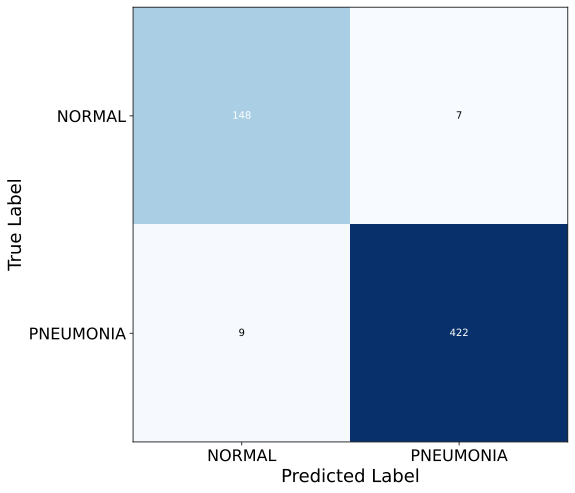

In [ ]:
net.eval()
test_dl = DataLoader(pn_raw_test_ds, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
plot_cm(preds,labels,class_names=pneumonia_classes)

In [ ]:
# Load model
# model = torch.load('/content/gdrive/MyDrive/model/covid/resnet18_001_15_100.pkl')
net = timm.create_model('densenet121', pretrained=True, num_classes=2)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_ft_ep30_916.pt'
net.load_state_dict(torch.load(PATH))
net=net.to(device)
net.eval()
# net = torch.load('/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')
# net.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNormAct2d(
          128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
  

test_loss: 0.0742, test_acc: 0.9664


<Figure size 432x288 with 0 Axes>

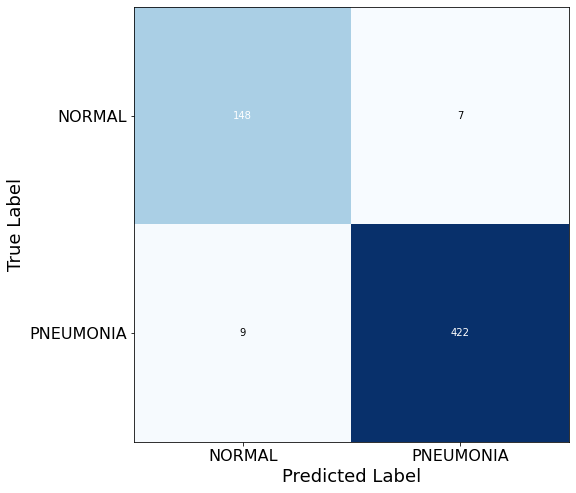

In [ ]:
net.eval()
test_dl = DataLoader(pn_raw_test_ds, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)

<Figure size 432x288 with 0 Axes>

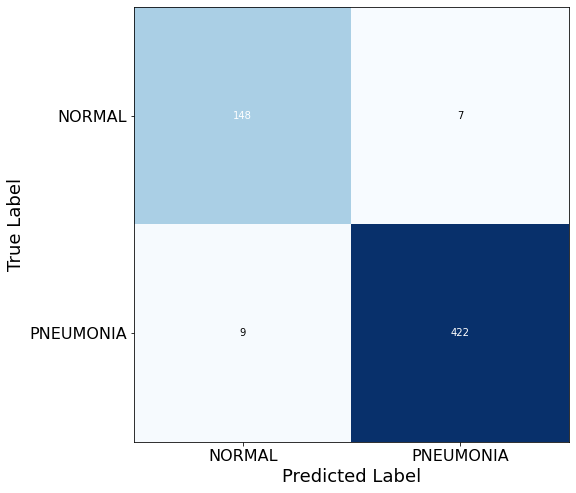

In [ ]:
cm=plot_cm(preds,labels,class_names=pneumonia_classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)

In [ ]:
print(report)

              precision    recall  f1-score   support

      NORMAL       0.95      0.94      0.95       157
   PNEUMONIA       0.98      0.98      0.98       429

    accuracy                           0.97       586
   macro avg       0.97      0.96      0.97       586
weighted avg       0.97      0.97      0.97       586



In [ ]:
s='''
Epoch 0/29
----------
train Loss: 0.1522 Acc: 0.9473
val Loss: 0.1357 Acc: 0.9599

Epoch 1/29
----------
train Loss: 0.1120 Acc: 0.9605
val Loss: 0.1087 Acc: 0.9658

Epoch 2/29
----------
train Loss: 0.1030 Acc: 0.9641
val Loss: 0.2902 Acc: 0.8933

Epoch 3/29
----------
train Loss: 0.0939 Acc: 0.9676
val Loss: 0.1121 Acc: 0.9658

Epoch 4/29
----------
train Loss: 0.0851 Acc: 0.9690
val Loss: 0.1210 Acc: 0.9667

Epoch 5/29
----------
train Loss: 0.0809 Acc: 0.9702
val Loss: 0.1127 Acc: 0.9658

Epoch 6/29
----------
train Loss: 0.0680 Acc: 0.9741
val Loss: 0.1032 Acc: 0.9675

Epoch 7/29
----------
train Loss: 0.0734 Acc: 0.9722
val Loss: 0.1305 Acc: 0.9641

Epoch 8/29
----------
train Loss: 0.0493 Acc: 0.9810
val Loss: 0.1109 Acc: 0.9684

Epoch 9/29
----------
train Loss: 0.0490 Acc: 0.9810
val Loss: 0.1124 Acc: 0.9710

Epoch 10/29
----------
train Loss: 0.0488 Acc: 0.9827
val Loss: 0.1040 Acc: 0.9701

Epoch 11/29
----------
train Loss: 0.0457 Acc: 0.9851
val Loss: 0.1131 Acc: 0.9684

Epoch 12/29
----------
train Loss: 0.0431 Acc: 0.9824
val Loss: 0.1153 Acc: 0.9624

Epoch 13/29
----------
train Loss: 0.0458 Acc: 0.9837
val Loss: 0.1135 Acc: 0.9675

Epoch 14/29
----------
train Loss: 0.0424 Acc: 0.9834
val Loss: 0.1104 Acc: 0.9701

Epoch 15/29
----------
train Loss: 0.0399 Acc: 0.9846
val Loss: 0.1128 Acc: 0.9658

Epoch 16/29
----------
train Loss: 0.0443 Acc: 0.9849
val Loss: 0.1091 Acc: 0.9693

Epoch 17/29
----------
train Loss: 0.0401 Acc: 0.9863
val Loss: 0.1068 Acc: 0.9684

Epoch 18/29
----------
train Loss: 0.0419 Acc: 0.9837
val Loss: 0.1124 Acc: 0.9727

Epoch 19/29
----------
train Loss: 0.0426 Acc: 0.9849
val Loss: 0.1096 Acc: 0.9710

Epoch 20/29
----------
train Loss: 0.0427 Acc: 0.9849
val Loss: 0.1099 Acc: 0.9675

Epoch 21/29
----------
train Loss: 0.0376 Acc: 0.9866
val Loss: 0.1082 Acc: 0.9675

Epoch 22/29
----------
train Loss: 0.0392 Acc: 0.9854
val Loss: 0.1135 Acc: 0.9684

Epoch 23/29
----------
train Loss: 0.0411 Acc: 0.9866
val Loss: 0.1106 Acc: 0.9658

Epoch 24/29
----------
train Loss: 0.0413 Acc: 0.9844
val Loss: 0.1087 Acc: 0.9667

Epoch 25/29
----------
train Loss: 0.0403 Acc: 0.9868
val Loss: 0.1180 Acc: 0.9641

Epoch 26/29
----------
train Loss: 0.0413 Acc: 0.9841
val Loss: 0.1092 Acc: 0.9727

Epoch 27/29
----------
train Loss: 0.0387 Acc: 0.9859
val Loss: 0.1146 Acc: 0.9693

Epoch 28/29
----------
train Loss: 0.0422 Acc: 0.9861
val Loss: 0.1111 Acc: 0.9658

Epoch 29/29
----------
train Loss: 0.0410 Acc: 0.9868
val Loss: 0.1098 Acc: 0.9710
'''

In [ ]:
 import re
 l=[]
 def addd(matched):
    l.append(matched)
    return matched
l=re.findall(r'val Loss: [\d\.]+ Acc: ([\d\.]+)', s)
len(l)

30

In [ ]:
for i in l:
  print(i)

0.9599
0.9658
0.8933
0.9658
0.9667
0.9658
0.9675
0.9641
0.9684
0.9710
0.9701
0.9684
0.9624
0.9675
0.9701
0.9658
0.9693
0.9684
0.9727
0.9710
0.9675
0.9675
0.9684
0.9658
0.9667
0.9641
0.9727
0.9693
0.9658
0.9710


## raw bs32 ep 30_pretrained on COVID_weighted loss_as fixed featrue extractor_9773

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH =  '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, 
                num_epochs=num_epochs, device=device, dataset_sizes=pn_sizes, use_weighted_loss=True)

Epoch 0/29
----------
train Loss: 0.1438 Acc: 0.9522
val Loss: 0.1244 Acc: 0.9624

Epoch 1/29
----------
train Loss: 0.1131 Acc: 0.9627
val Loss: 0.3580 Acc: 0.8617

Epoch 2/29
----------
train Loss: 0.1148 Acc: 0.9593
val Loss: 0.2127 Acc: 0.9411

Epoch 3/29
----------
train Loss: 0.1079 Acc: 0.9649
val Loss: 0.1103 Acc: 0.9650

Epoch 4/29
----------
train Loss: 0.0945 Acc: 0.9697
val Loss: 0.1078 Acc: 0.9616

Epoch 5/29
----------
train Loss: 0.0847 Acc: 0.9695
val Loss: 0.0993 Acc: 0.9693

Epoch 6/29
----------
train Loss: 0.0795 Acc: 0.9717
val Loss: 0.1061 Acc: 0.9701

Epoch 7/29
----------
train Loss: 0.0758 Acc: 0.9739
val Loss: 0.2141 Acc: 0.8992

Epoch 8/29
----------
train Loss: 0.0808 Acc: 0.9737
val Loss: 0.0969 Acc: 0.9684

Epoch 9/29
----------
train Loss: 0.0635 Acc: 0.9768
val Loss: 0.0961 Acc: 0.9667

Epoch 10/29
----------
train Loss: 0.0576 Acc: 0.9802
val Loss: 0.0987 Acc: 0.9684

Epoch 11/29
----------
train Loss: 0.0574 Acc: 0.9780
val Loss: 0.0993 Acc: 0.9675

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_fe_ep30_921.pt'
torch.save(net.state_dict(), PATH)

test_loss: 0.0667, test_acc: 0.9773


<Figure size 432x288 with 0 Axes>

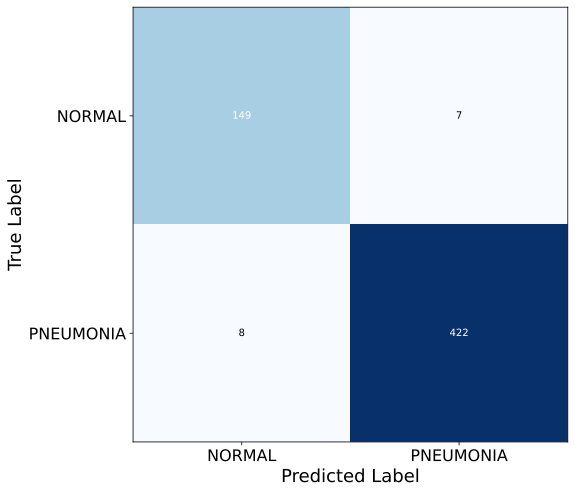

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_pn, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels,class_names=raw_pn_dataset.classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.96      0.95      0.95       157
   PNEUMONIA       0.98      0.98      0.98       429

    accuracy                           0.97       586
   macro avg       0.97      0.97      0.97       586
weighted avg       0.97      0.97      0.97       586



## raw bs32 ep 30_pretrained on COVID_weighted loss_ft_9806

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH =  '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, 
                num_epochs=num_epochs, device=device, dataset_sizes=pn_sizes, use_weighted_loss=True)

Epoch 0/29
----------
train Loss: 0.1709 Acc: 0.9361
val Loss: 0.5022 Acc: 0.7310

Epoch 1/29
----------
train Loss: 0.1165 Acc: 0.9580
val Loss: 0.3092 Acc: 0.8514

Epoch 2/29
----------
train Loss: 0.1053 Acc: 0.9607
val Loss: 0.1177 Acc: 0.9684

Epoch 3/29
----------
train Loss: 0.0587 Acc: 0.9763
val Loss: 0.1502 Acc: 0.9530

Epoch 4/29
----------
train Loss: 0.0497 Acc: 0.9824
val Loss: 0.1002 Acc: 0.9693

Epoch 5/29
----------
train Loss: 0.0493 Acc: 0.9798
val Loss: 0.2228 Acc: 0.9556

Epoch 6/29
----------
train Loss: 0.0560 Acc: 0.9805
val Loss: 0.1144 Acc: 0.9693

Epoch 7/29
----------
train Loss: 0.0376 Acc: 0.9863
val Loss: 0.1111 Acc: 0.9667

Epoch 8/29
----------
train Loss: 0.0153 Acc: 0.9959
val Loss: 0.1185 Acc: 0.9701

Epoch 9/29
----------
train Loss: 0.0067 Acc: 0.9983
val Loss: 0.1232 Acc: 0.9693

Epoch 10/29
----------
train Loss: 0.0040 Acc: 0.9993
val Loss: 0.1736 Acc: 0.9641

Epoch 11/29
----------
train Loss: 0.0079 Acc: 0.9976
val Loss: 0.1306 Acc: 0.9667

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_ft_ep30_920.pt'
torch.save(net.state_dict(), PATH)

test_loss: 0.0529, test_acc: 0.9806


<Figure size 432x288 with 0 Axes>

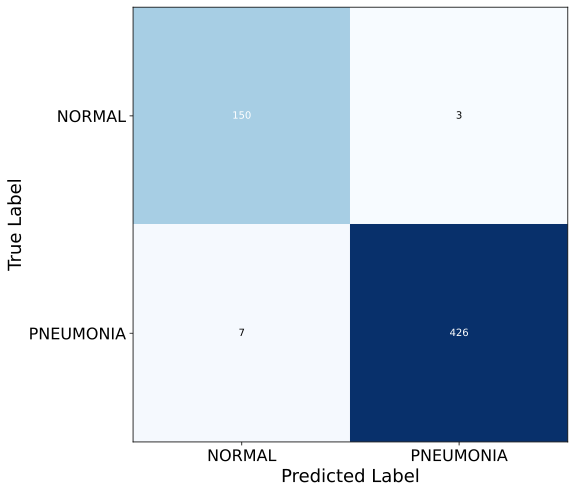

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_pn, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels,class_names=raw_pn_dataset.classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.98      0.96      0.97       157
   PNEUMONIA       0.98      0.99      0.99       429

    accuracy                           0.98       586
   macro avg       0.98      0.97      0.98       586
weighted avg       0.98      0.98      0.98       586



## raw bs32 ep 30_pre_trained on ImageNet_as fixed featrue extractor_9578

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=2)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs =32*k, 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.classifier.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_pn, batch_size, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss()
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=nn.CrossEntropyLoss(), num_epochs=num_epochs, device=device, dataset_sizes=pn_sizes)

Epoch 0/29
----------
train Loss: 0.2590 Acc: 0.8953
val Loss: 0.6756 Acc: 0.7455

Epoch 1/29
----------
train Loss: 0.1430 Acc: 0.9422
val Loss: 0.1770 Acc: 0.9351

Epoch 2/29
----------
train Loss: 0.1248 Acc: 0.9527
val Loss: 0.3081 Acc: 0.8907

Epoch 3/29
----------
train Loss: 0.1020 Acc: 0.9593
val Loss: 0.1481 Acc: 0.9582

Epoch 4/29
----------
train Loss: 0.0900 Acc: 0.9676
val Loss: 0.3300 Acc: 0.8676

Epoch 5/29
----------
train Loss: 0.0991 Acc: 0.9602
val Loss: 0.1517 Acc: 0.9547

Epoch 6/29
----------
train Loss: 0.0687 Acc: 0.9741
val Loss: 0.1613 Acc: 0.9556

Epoch 7/29
----------
train Loss: 0.0588 Acc: 0.9776
val Loss: 0.7134 Acc: 0.8070

Epoch 8/29
----------
train Loss: 0.0596 Acc: 0.9800
val Loss: 0.1528 Acc: 0.9590

Epoch 9/29
----------
train Loss: 0.0303 Acc: 0.9917
val Loss: 0.1570 Acc: 0.9582

Epoch 10/29
----------
train Loss: 0.0297 Acc: 0.9910
val Loss: 0.1733 Acc: 0.9513

Epoch 11/29
----------
train Loss: 0.0301 Acc: 0.9905
val Loss: 0.1563 Acc: 0.9624

Ep

In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_IN_fe_ep30_920.pt'
torch.save(net.state_dict(), PATH)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


test_loss: 0.1167, test_acc: 0.9578


<Figure size 432x288 with 0 Axes>

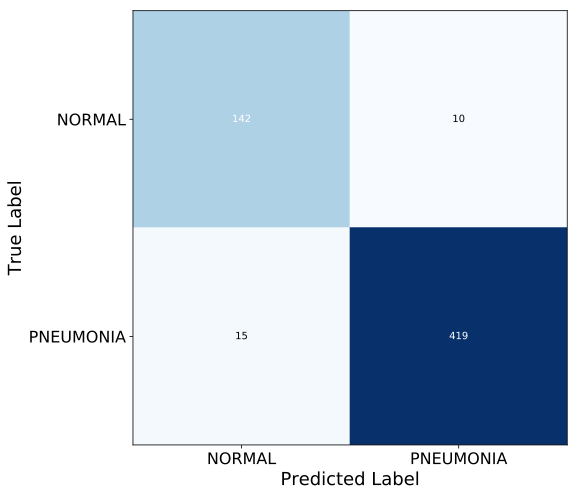

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_pn, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels,class_names=raw_pn_dataset.classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.93      0.90      0.92       157
   PNEUMONIA       0.97      0.98      0.97       429

    accuracy                           0.96       586
   macro avg       0.95      0.94      0.95       586
weighted avg       0.96      0.96      0.96       586



## raw bs32 ep 30_pre_trained on ImageNet_weighted loss_ft_9664

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=2)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)
net.train()
net=net.to(device)

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

net.classifier.apply(init_weights)

net = net.to(device)

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, 
                num_epochs=num_epochs, device=device, dataset_sizes=pn_sizes, use_weighted_loss=True)

Epoch 0/29
----------
train Loss: 0.2943 Acc: 0.8836
val Loss: 1.8818 Acc: 0.5824

Epoch 1/29
----------
train Loss: 0.2103 Acc: 0.9224
val Loss: 0.1442 Acc: 0.9462

Epoch 2/29
----------
train Loss: 0.1493 Acc: 0.9493
val Loss: 0.2861 Acc: 0.8958

Epoch 3/29
----------
train Loss: 0.1830 Acc: 0.9307
val Loss: 0.3004 Acc: 0.8941

Epoch 4/29
----------
train Loss: 0.1540 Acc: 0.9461
val Loss: 0.6534 Acc: 0.5850

Epoch 5/29
----------
train Loss: 0.1709 Acc: 0.9390
val Loss: 0.1466 Acc: 0.9462

Epoch 6/29
----------
train Loss: 0.1150 Acc: 0.9632
val Loss: 13.7798 Acc: 0.5833

Epoch 7/29
----------
train Loss: 0.1028 Acc: 0.9678
val Loss: 0.1543 Acc: 0.9462

Epoch 8/29
----------
train Loss: 0.0678 Acc: 0.9773
val Loss: 0.0983 Acc: 0.9701

Epoch 9/29
----------
train Loss: 0.0431 Acc: 0.9854
val Loss: 0.1048 Acc: 0.9693

Epoch 10/29
----------
train Loss: 0.0361 Acc: 0.9873
val Loss: 0.1422 Acc: 0.9556

Epoch 11/29
----------
train Loss: 0.0362 Acc: 0.9873
val Loss: 0.2025 Acc: 0.9471

E

In [ ]:
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_IN_ft_ep30_920.pt'
torch.save(net.state_dict(), PATH)

test_loss: 0.0943, test_acc: 0.9664


<Figure size 432x288 with 0 Axes>

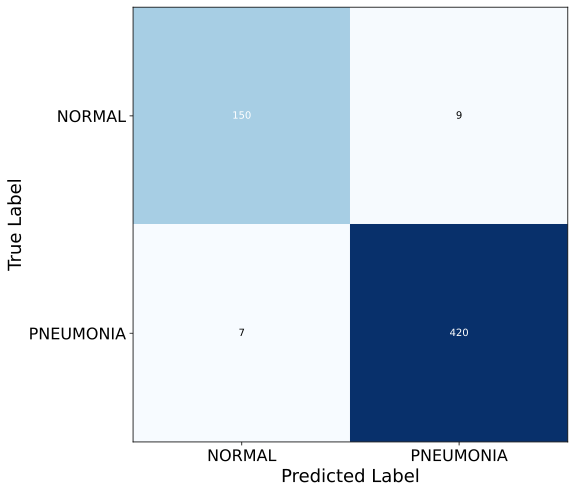

In [ ]:
net.eval()
test_dl = DataLoader(test_raw_pn, 256, num_workers=4, pin_memory=True)
preds,labels = test_predict(net, test_dl)
cm=plot_cm(preds,labels,class_names=raw_pn_dataset.classes)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(labels, preds, target_names=raw_pn_dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.94      0.96      0.95       157
   PNEUMONIA       0.98      0.98      0.98       429

    accuracy                           0.97       586
   macro avg       0.96      0.97      0.97       586
weighted avg       0.97      0.97      0.97       586



## DenseNet-121 timm raw 16bs 30epochs_focal Loss_weighted_gamma=3 9451

### feature_extractor_DenseNet-121 timm raw 16bs 30epochs_focal Loss_weighted_gamma=3 9559

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH='/content/gdrive/MyDrive/model/covid/densenet121_raw_16.0bs_focal_loss_weighted_gamma3_ft0923.pt'
net.load_state_dict(torch.load(PATH))
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted(train_dl).to(device),
	gamma=3,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/adeelh/pytorch-multi-class-focal-loss/zipball/master" to /root/.cache/torch/hub/master.zip


Epoch 0/29
----------
train Loss: 0.0100 Acc: 0.9288
val Loss: 0.3098 Acc: 0.9488

Epoch 1/29
----------
train Loss: 0.0078 Acc: 0.9490
val Loss: 0.4967 Acc: 0.8582

Epoch 2/29
----------
train Loss: 0.0080 Acc: 0.9529
val Loss: 0.2593 Acc: 0.9650

Epoch 3/29
----------
train Loss: 0.0065 Acc: 0.9595
val Loss: 0.2659 Acc: 0.9658

Epoch 4/29
----------
train Loss: 0.0060 Acc: 0.9639
val Loss: 0.2261 Acc: 0.9701

Epoch 5/29
----------
train Loss: 0.0058 Acc: 0.9615
val Loss: 0.2385 Acc: 0.9658

Epoch 6/29
----------
train Loss: 0.0054 Acc: 0.9661
val Loss: 0.2181 Acc: 0.9650

Epoch 7/29
----------
train Loss: 0.0055 Acc: 0.9639
val Loss: 0.2337 Acc: 0.9675

Epoch 8/29
----------
train Loss: 0.0042 Acc: 0.9707
val Loss: 0.2039 Acc: 0.9693

Epoch 9/29
----------
train Loss: 0.0040 Acc: 0.9732
val Loss: 0.2002 Acc: 0.9718

Epoch 10/29
----------
train Loss: 0.0039 Acc: 0.9722
val Loss: 0.2011 Acc: 0.9641

Epoch 11/29
----------
train Loss: 0.0041 Acc: 0.9751
val Loss: 0.1876 Acc: 0.9675

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_raw_'+str(k*32)+'bs_focal_loss_weighted_gamma3_fe'+datetime.datetime.now().strftime("%m%d")+'.pt'
torch.save(net.state_dict(), PATH)

# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.2056, test_acc: 0.9559


<Figure size 432x288 with 0 Axes>

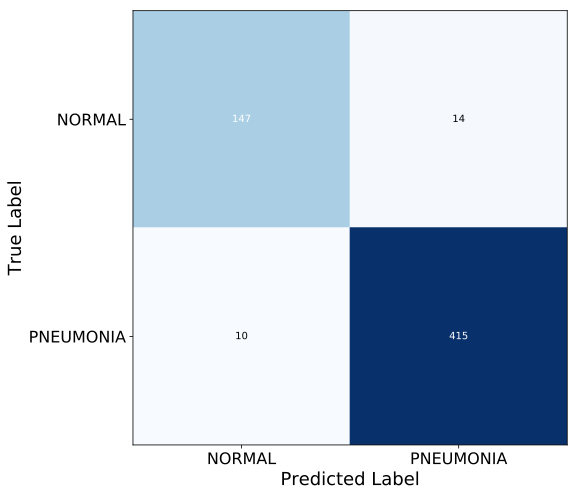

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_pn, 256, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=test_dl.dataset.dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.91      0.94      0.92       157
   PNEUMONIA       0.98      0.97      0.97       429

    accuracy                           0.96       586
   macro avg       0.94      0.95      0.95       586
weighted avg       0.96      0.96      0.96       586



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/tt/densenet121_raw_16.0bs_focal_loss_weighted_gamma3_ft0923.pt


### fine-tune_DenseNet-121 timm raw 16bs 30epochs_focal Loss_weighted_gamma=3 9754

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH='/content/gdrive/MyDrive/model/covid/densenet121_raw_16.0bs_focal_loss_weighted_gamma3_ft0923.pt'
net.load_state_dict(torch.load(PATH))
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

loss = torch.hub.load(
	'adeelh/pytorch-multi-class-focal-loss',
	model='FocalLoss',
	alpha=weights_weighted(train_dl).to(device),
	gamma=3,
	reduction='mean',
	force_reload=False
).to(device)
criterions = {'train':loss,
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------


Using cache found in /root/.cache/torch/hub/adeelh_pytorch-multi-class-focal-loss_master


train Loss: 0.0106 Acc: 0.9273
val Loss: 0.3893 Acc: 0.9308

Epoch 1/29
----------
train Loss: 0.0072 Acc: 0.9524
val Loss: 0.2719 Acc: 0.9283

Epoch 2/29
----------
train Loss: 0.0058 Acc: 0.9585
val Loss: 0.2369 Acc: 0.9641

Epoch 3/29
----------
train Loss: 0.0042 Acc: 0.9717
val Loss: 0.1718 Acc: 0.9658

Epoch 4/29
----------
train Loss: 0.0045 Acc: 0.9671
val Loss: 0.2038 Acc: 0.9675

Epoch 5/29
----------
train Loss: 0.0031 Acc: 0.9795
val Loss: 0.1561 Acc: 0.9616

Epoch 6/29
----------
train Loss: 0.0022 Acc: 0.9856
val Loss: 0.2249 Acc: 0.9257

Epoch 7/29
----------
train Loss: 0.0031 Acc: 0.9802
val Loss: 0.1964 Acc: 0.9607

Epoch 8/29
----------
train Loss: 0.0010 Acc: 0.9944
val Loss: 0.1615 Acc: 0.9675

Epoch 9/29
----------
train Loss: 0.0005 Acc: 0.9978
train Loss: 0.0003 Acc: 0.9983
val Loss: 0.1320 Acc: 0.9710

Epoch 11/29
----------
train Loss: 0.0002 Acc: 0.9998
val Loss: 0.1212 Acc: 0.9727

Epoch 12/29
----------
train Loss: 0.0001 Acc: 1.0000
val Loss: 0.1219 Acc: 0

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_raw_'+str(k*32)+'bs_focal_loss_weighted_gamma3_ft'+datetime.datetime.now().strftime("%m%d")+'.pt'
torch.save(net.state_dict(), PATH)

# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.1088, test_acc: 0.9754


<Figure size 432x288 with 0 Axes>

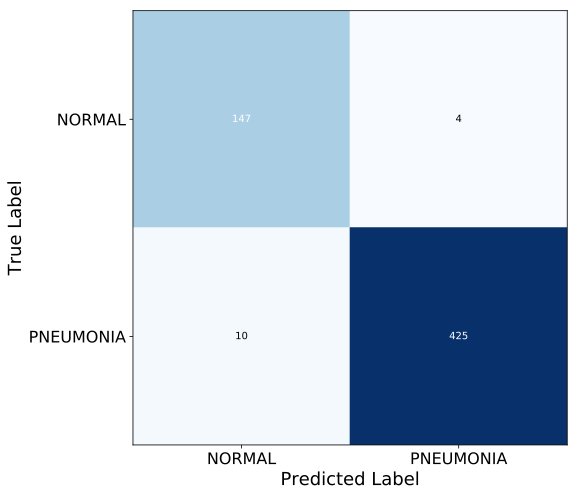

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_pn, 256, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=test_dl.dataset.dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.97      0.94      0.95       157
   PNEUMONIA       0.98      0.99      0.98       429

    accuracy                           0.98       586
   macro avg       0.98      0.96      0.97       586
weighted avg       0.98      0.98      0.98       586



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/tt/densenet121_raw_16.0bs_focal_loss_weighted_gamma3_ft0923.pt


# best model
* PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
* DenseNet-121 timm raw unaug 16bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned_best

## DenseNet-121 timm raw unaug 16bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned_best_9586

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,30]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, batch_size, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}
loss = nn.CrossEntropyLoss
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)
net=train_model(net,dataloaders, trainer, scheduler, criterion=loss, num_epochs=num_epochs, device=device, use_weighted_loss=True)

Epoch 0/29
----------
train Loss: 0.4233 Acc: 0.8508
val Loss: 0.3142 Acc: 0.8840

Epoch 1/29
----------
train Loss: 0.2796 Acc: 0.9005
val Loss: 0.2702 Acc: 0.9043

Epoch 2/29
----------
train Loss: 0.2268 Acc: 0.9193
val Loss: 0.6732 Acc: 0.8330

Epoch 3/29
----------
train Loss: 0.1982 Acc: 0.9325
val Loss: 0.2578 Acc: 0.9095

Epoch 4/29
----------
train Loss: 0.1726 Acc: 0.9377
val Loss: 0.3517 Acc: 0.8772

Epoch 5/29
----------
train Loss: 0.1558 Acc: 0.9430
val Loss: 0.2152 Acc: 0.9301

Epoch 6/29
----------
train Loss: 0.1382 Acc: 0.9494
val Loss: 0.2079 Acc: 0.9242

Epoch 7/29
----------
train Loss: 0.1191 Acc: 0.9579
val Loss: 0.2518 Acc: 0.9263

Epoch 8/29
----------
train Loss: 0.0545 Acc: 0.9814
val Loss: 0.1581 Acc: 0.9490

Epoch 9/29
----------
train Loss: 0.0267 Acc: 0.9918
val Loss: 0.1721 Acc: 0.9509

Epoch 10/29
----------
train Loss: 0.0161 Acc: 0.9957
val Loss: 0.1974 Acc: 0.9445

Epoch 11/29
----------
train Loss: 0.0094 Acc: 0.9976
val Loss: 0.2267 Acc: 0.9447

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH, map_location=device))
net.to(device)

test_loss: 0.2226, test_acc: 0.9586


<Figure size 432x288 with 0 Axes>

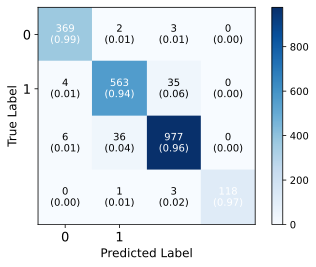

In [ ]:
preds, labels, cm = None, None, None
with torch.no_grad():
  net.eval()
  test_dl = DataLoader(test_raw_covid, batch_size=256, num_workers=4, pin_memory=True)
  preds,labels = test_predict(net, test_dl)
  cm = plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)


<Figure size 432x288 with 0 Axes>

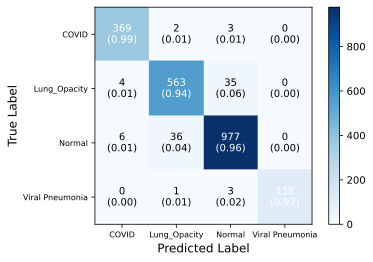

array([[369,   2,   3,   0],
       [  4, 563,  35,   0],
       [  6,  36, 977,   0],
       [  0,   1,   3, 118]])

In [ ]:
plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes, digits=4)
print(report)

                 precision    recall  f1-score   support

          COVID     0.9866    0.9736    0.9801       379
   Lung_Opacity     0.9352    0.9352    0.9352       602
         Normal     0.9588    0.9597    0.9593      1018
Viral Pneumonia     0.9672    1.0000    0.9833       118

       accuracy                         0.9575      2117
      macro avg     0.9620    0.9671    0.9645      2117
   weighted avg     0.9575    0.9575    0.9575      2117



In [ ]:
net = timm.create_model('densenet121', pretrained=False, num_classes=4)
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
# net.to(device)

<All keys matched successfully>

In [ ]:
test_dl = DataLoader(test_raw_covid,batch_size=len(test_raw_covid), num_workers=4, pin_memory=True)
images = None
labels = None
for batch in test_dl:
  labels = batch[1]

In [ ]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output

In [ ]:
net.to(device)

In [ ]:
test_dl = DataLoader(test_raw_covid,batch_size=256, num_workers=4, pin_memory=True)
logits = None
labels = None
with torch.no_grad():
  net.eval()
  for batch in test_dl:
    images=batch[0].to(device)
    if logits is None:
      logits = nn.Softmax(dim=1)(net(images))
      labels = batch[1]
    else:
      logits = torch.cat((logits,nn.Softmax(dim=1)(net(images))),0)
      labels = torch.cat((labels, batch[1]))
y_score = logits.detach().cpu().numpy()
y_test = label_binarize(list(labels.numpy()), classes=[0,1,2,3])

In [ ]:
classes = test_raw_covid.dataset.classes
n_classes = len(test_raw_covid.dataset.classes)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

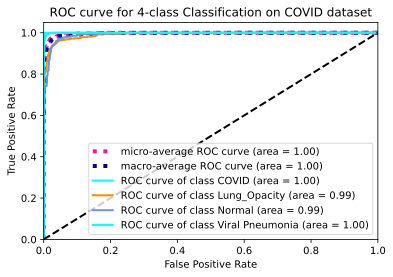

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for 4-class Classification on COVID dataset")
plt.legend(loc="lower right")
plt.savefig('roc_covid.svg')
plt.show()

## feature_extractor_DenseNet-121 timm raw 16bs 30epochs_pretrained on COVID_weighted loss

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH='/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = False

for param in net.classifier.parameters():
  if not param.requires_grad:
    param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.1604 Acc: 0.9475
val Loss: 0.1009 Acc: 0.9718

Epoch 1/29
----------
train Loss: 0.1208 Acc: 0.9605
val Loss: 0.1184 Acc: 0.9650

Epoch 2/29
----------
train Loss: 0.1148 Acc: 0.9590
val Loss: 0.0993 Acc: 0.9684

Epoch 3/29
----------
train Loss: 0.1012 Acc: 0.9695
val Loss: 0.0960 Acc: 0.9667

Epoch 4/29
----------
train Loss: 0.1038 Acc: 0.9678
val Loss: 0.0960 Acc: 0.9693

Epoch 5/29
----------
train Loss: 0.1004 Acc: 0.9666
val Loss: 0.0991 Acc: 0.9684

Epoch 6/29
----------
train Loss: 0.0921 Acc: 0.9688
val Loss: 0.0930 Acc: 0.9701

Epoch 7/29
----------
train Loss: 0.0911 Acc: 0.9690
val Loss: 0.0935 Acc: 0.9675

Epoch 8/29
----------
train Loss: 0.0741 Acc: 0.9763
val Loss: 0.0840 Acc: 0.9710

Epoch 9/29
----------
train Loss: 0.0712 Acc: 0.9761
val Loss: 0.0852 Acc: 0.9744

Epoch 10/29
----------
train Loss: 0.0687 Acc: 0.9749
val Loss: 0.0868 Acc: 0.9735

Epoch 11/29
----------
train Loss: 0.0738 Acc: 0.9758
val Loss: 0.0880 Acc: 0.9718

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_'+'16bs_weighted_loss_fe_929.pt'
torch.save(net.state_dict(), PATH)
# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.0600, test_acc: 0.9747


<Figure size 432x288 with 0 Axes>

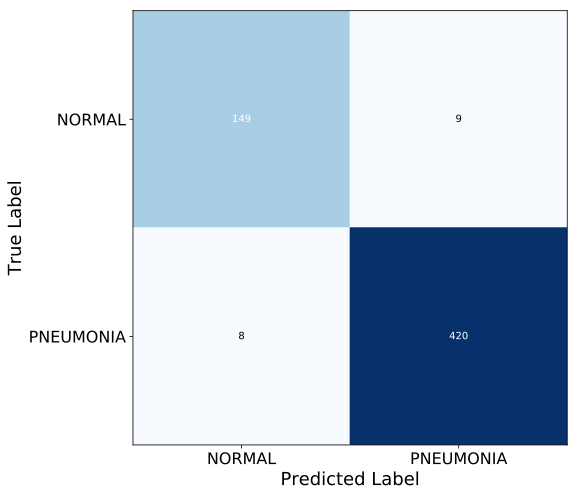

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_pn, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=test_dl.dataset.dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.94      0.95      0.95       157
   PNEUMONIA       0.98      0.98      0.98       429

    accuracy                           0.97       586
   macro avg       0.96      0.96      0.96       586
weighted avg       0.97      0.97      0.97       586



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_16bs_weighted_loss_fe_929.pt


## fint_tuned_DenseNet-121 timm raw 16bs 30epochs_pretrained on COVID_weighted loss

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH='/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.1526 Acc: 0.9444
val Loss: 0.1061 Acc: 0.9599

Epoch 1/29
----------
train Loss: 0.0943 Acc: 0.9656
val Loss: 0.1053 Acc: 0.9624

Epoch 2/29
----------
train Loss: 0.0733 Acc: 0.9739
val Loss: 0.1228 Acc: 0.9727

Epoch 3/29
----------
train Loss: 0.0553 Acc: 0.9812
val Loss: 0.1052 Acc: 0.9658

Epoch 4/29
----------
train Loss: 0.0431 Acc: 0.9824
val Loss: 0.1283 Acc: 0.9675

Epoch 5/29
----------
train Loss: 0.0470 Acc: 0.9856
val Loss: 0.1579 Acc: 0.9624

Epoch 6/29
----------
train Loss: 0.0290 Acc: 0.9898
val Loss: 0.1116 Acc: 0.9710

Epoch 7/29
----------
train Loss: 0.0304 Acc: 0.9873
val Loss: 0.0992 Acc: 0.9684

Epoch 8/29
----------
train Loss: 0.0101 Acc: 0.9973
val Loss: 0.1120 Acc: 0.9693

Epoch 9/29
----------
train Loss: 0.0036 Acc: 0.9993
val Loss: 0.1223 Acc: 0.9701

Epoch 10/29
----------
train Loss: 0.0015 Acc: 1.0000
val Loss: 0.1252 Acc: 0.9718

Epoch 11/29
----------
train Loss: 0.0025 Acc: 0.9995
val Loss: 0.1373 Acc: 0.9727

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_'+'16bs_weighted_loss_ft_929.pt'
torch.save(net.state_dict(), PATH)
# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.1075, test_acc: 0.9761


<Figure size 432x288 with 0 Axes>

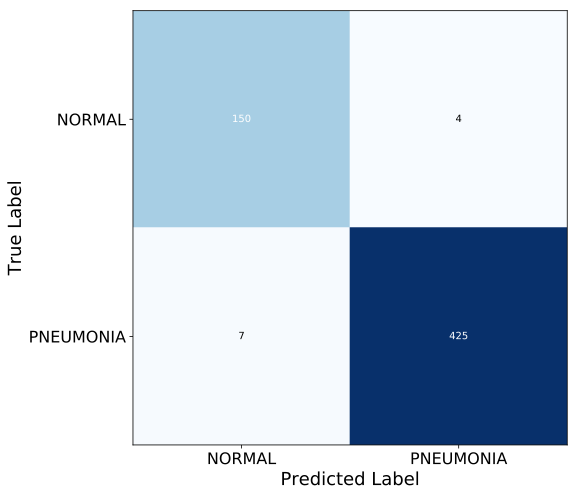

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_pn, 256, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=test_dl.dataset.dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.97      0.96      0.96       157
   PNEUMONIA       0.98      0.99      0.99       429

    accuracy                           0.98       586
   macro avg       0.98      0.97      0.98       586
weighted avg       0.98      0.98      0.98       586



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_929.pt


## fint_tuned_DenseNet-121 timm raw 32bs 30epochs_pretrained on COVID_weighted loss

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

PATH='/content/gdrive/MyDrive/model/covid/densenet121_weights_unaug_raw_16bs_weighted_loss_ft_920.pkl'
net.load_state_dict(torch.load(PATH))
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,2)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=1
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_pn, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_pn, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.1705 Acc: 0.9368
val Loss: 0.2699 Acc: 0.8804

Epoch 1/29
----------
train Loss: 0.0977 Acc: 0.9639
val Loss: 0.1769 Acc: 0.9240

Epoch 2/29
----------
train Loss: 0.0802 Acc: 0.9700
val Loss: 0.1054 Acc: 0.9633

Epoch 3/29
----------
train Loss: 0.0700 Acc: 0.9756
val Loss: 0.1109 Acc: 0.9633

Epoch 4/29
----------
train Loss: 0.0556 Acc: 0.9783
val Loss: 0.3124 Acc: 0.8847

Epoch 5/29
----------
train Loss: 0.1067 Acc: 0.9617
val Loss: 0.1233 Acc: 0.9624

Epoch 6/29
----------
train Loss: 0.0520 Acc: 0.9788
val Loss: 1.8693 Acc: 0.7472

Epoch 7/29
----------
train Loss: 0.0519 Acc: 0.9834
val Loss: 2.7396 Acc: 0.5346

Epoch 8/29
----------
train Loss: 0.0737 Acc: 0.9734
val Loss: 0.1031 Acc: 0.9693

Epoch 9/29
----------
train Loss: 0.0243 Acc: 0.9902
val Loss: 0.1146 Acc: 0.9701

Epoch 10/29
----------
train Loss: 0.0122 Acc: 0.9976
val Loss: 0.1157 Acc: 0.9718

Epoch 11/29
----------
train Loss: 0.0086 Acc: 0.9980
val Loss: 0.1223 Acc: 0.9693

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_'+'32bs_weighted_loss_ft_929.pt'
torch.save(net.state_dict(), PATH)
# Load model
# PATH='/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_64bs_focal_loss_weighted_ft_0922.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net=net.to(device)

test_loss: 0.0764, test_acc: 0.9709


<Figure size 432x288 with 0 Axes>

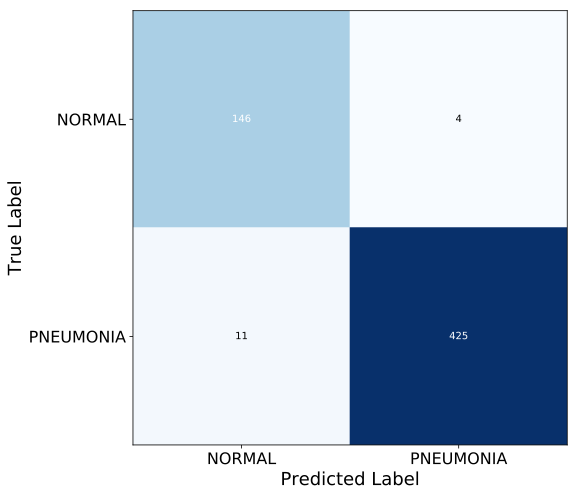

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_pn, 256, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=test_dl.dataset.dataset.classes)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.97      0.93      0.95       157
   PNEUMONIA       0.97      0.99      0.98       429

    accuracy                           0.97       586
   macro avg       0.97      0.96      0.97       586
weighted avg       0.97      0.97      0.97       586



In [ ]:
print(PATH)

/content/gdrive/MyDrive/model/tt/densenet121_weights_unaug_raw_32bs_weighted_loss_ft_929.pt


# With Augmentation

In [ ]:
train_raw_covid_aug = DatasetFromSubset(train_raw_covid, transform=transform_aug)
train_raw_pn_aug = DatasetFromSubset(train_raw_pn, transform=transform_aug)

## DenseNet-121 timm raw aug 16bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# o = net(torch.randn(2, 3, 224, 224))
# print(f'output shape: {o.shape}')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True
# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid_aug, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=4, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.5462 Acc: 0.8044
val Loss: 1.2838 Acc: 0.4401

Epoch 1/29
----------
train Loss: 0.3547 Acc: 0.8755
val Loss: 1.6540 Acc: 0.4609

Epoch 2/29
----------
train Loss: 0.3040 Acc: 0.8950
val Loss: 1.1186 Acc: 0.5592

Epoch 3/29
----------
train Loss: 0.2708 Acc: 0.9036
val Loss: 1.1509 Acc: 0.4524

Epoch 4/29
----------
train Loss: 0.2411 Acc: 0.9150
val Loss: 3.2109 Acc: 0.2875

Epoch 5/29
----------
train Loss: 0.2220 Acc: 0.9220
val Loss: 0.8660 Acc: 0.6808

Epoch 6/29
----------
train Loss: 0.2074 Acc: 0.9264
val Loss: 1.4361 Acc: 0.6662

Epoch 7/29
----------
train Loss: 0.1893 Acc: 0.9343
val Loss: 1.0149 Acc: 0.6726

Epoch 8/29
----------
train Loss: 0.1210 Acc: 0.9588
val Loss: 0.8711 Acc: 0.7172

Epoch 9/29
----------
train Loss: 0.0999 Acc: 0.9650
val Loss: 0.7684 Acc: 0.7312

Epoch 10/29
----------
train Loss: 0.0907 Acc: 0.9677
val Loss: 0.8280 Acc: 0.7267

Epoch 11/29
----------
train Loss: 0.0815 Acc: 0.9722
val Loss: 1.1671 Acc: 0.6830

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/densenet121_pre_raw_aug_weighted_16bs_ft_930.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.9932, test_acc: 0.7197


<Figure size 432x288 with 0 Axes>

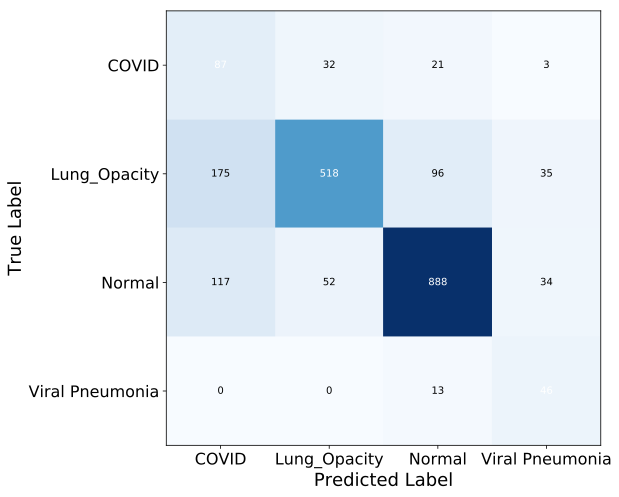

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.61      0.23      0.33       379
   Lung_Opacity       0.63      0.86      0.73       602
         Normal       0.81      0.87      0.84      1018
Viral Pneumonia       0.78      0.39      0.52       118

       accuracy                           0.73      2117
      macro avg       0.71      0.59      0.61      2117
   weighted avg       0.72      0.73      0.70      2117



# With Mask

In [ ]:
3616/(3616+6012+10192+1345)

0.17084809827545477

# Grayscale

## DenseNet-121 timm raw unaug 64bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned_best_9586

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=2
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.6767 Acc: 0.7466
val Loss: 0.7802 Acc: 0.7534

Epoch 1/29
----------
train Loss: 0.3917 Acc: 0.8529
val Loss: 0.4597 Acc: 0.8412

Epoch 2/29
----------
train Loss: 0.2975 Acc: 0.8926
val Loss: 0.6421 Acc: 0.8034

Epoch 3/29
----------
train Loss: 0.2483 Acc: 0.9110
val Loss: 0.4030 Acc: 0.8476

Epoch 4/29
----------
train Loss: 0.2256 Acc: 0.9194
val Loss: 0.4092 Acc: 0.8587

Epoch 5/29
----------
train Loss: 0.1921 Acc: 0.9291
val Loss: 0.3607 Acc: 0.8724

Epoch 6/29
----------
train Loss: 0.1655 Acc: 0.9407
val Loss: 0.8161 Acc: 0.7054

Epoch 7/29
----------
train Loss: 0.1555 Acc: 0.9430
val Loss: 0.2376 Acc: 0.9147

Epoch 8/29
----------
train Loss: 0.0828 Acc: 0.9712
val Loss: 0.1897 Acc: 0.9365

Epoch 9/29
----------
train Loss: 0.0582 Acc: 0.9797
val Loss: 0.2011 Acc: 0.9353

Epoch 10/29
----------
train Loss: 0.0412 Acc: 0.9868
val Loss: 0.2164 Acc: 0.9365

Epoch 11/29
----------
train Loss: 0.0292 Acc: 0.9903
val Loss: 0.2377 Acc: 0.9339

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_raw_64bs_weighted_loss_ft_1013.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.1765, test_acc: 0.9364


<Figure size 432x288 with 0 Axes>

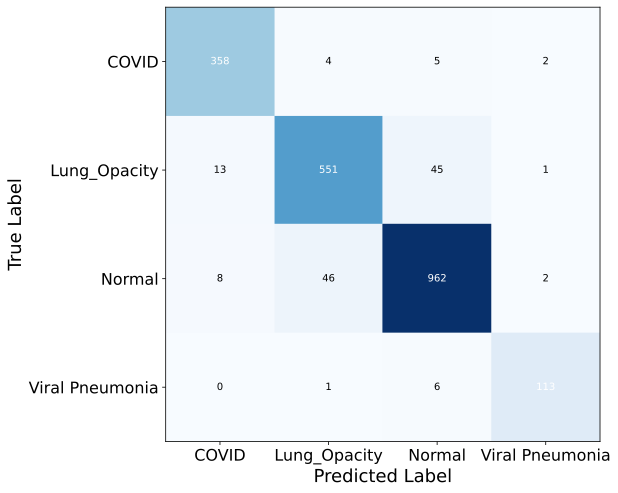

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.97      0.94      0.96       379
   Lung_Opacity       0.90      0.92      0.91       602
         Normal       0.94      0.94      0.94      1018
Viral Pneumonia       0.94      0.96      0.95       118

       accuracy                           0.94      2117
      macro avg       0.94      0.94      0.94      2117
   weighted avg       0.94      0.94      0.94      2117



## DenseNet-121 timm raw unaug 16bs 30epochs_pretrained on ImageNet_Weighted Loss_fine-tuned_best_9586

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.5153 Acc: 0.8099
val Loss: 0.4802 Acc: 0.8370

Epoch 1/29
----------
train Loss: 0.3175 Acc: 0.8875
val Loss: 0.2872 Acc: 0.8918

Epoch 2/29
----------
train Loss: 0.2595 Acc: 0.9085
val Loss: 0.2617 Acc: 0.9079

Epoch 3/29
----------
train Loss: 0.2225 Acc: 0.9190
val Loss: 2.3631 Acc: 0.7992

Epoch 4/29
----------
train Loss: 0.1939 Acc: 0.9312
val Loss: 0.2579 Acc: 0.9100

Epoch 5/29
----------
train Loss: 0.1700 Acc: 0.9374
val Loss: 0.2327 Acc: 0.9230

Epoch 6/29
----------
train Loss: 0.1467 Acc: 0.9473
val Loss: 0.2048 Acc: 0.9190

Epoch 7/29
----------
train Loss: 0.1295 Acc: 0.9549
val Loss: 0.2917 Acc: 0.8982

Epoch 8/29
----------
train Loss: 0.0567 Acc: 0.9814
val Loss: 0.1901 Acc: 0.9398

Epoch 9/29
----------
train Loss: 0.0300 Acc: 0.9906
val Loss: 0.2081 Acc: 0.9409

Epoch 10/29
----------
train Loss: 0.0182 Acc: 0.9949
val Loss: 0.2132 Acc: 0.9405

Epoch 11/29
----------
train Loss: 0.0101 Acc: 0.9978
val Loss: 0.2386 Acc: 0.9412

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_raw_16bs_weighted_loss_ft_1014.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


test_loss: 0.3039, test_acc: 0.9465


<Figure size 432x288 with 0 Axes>

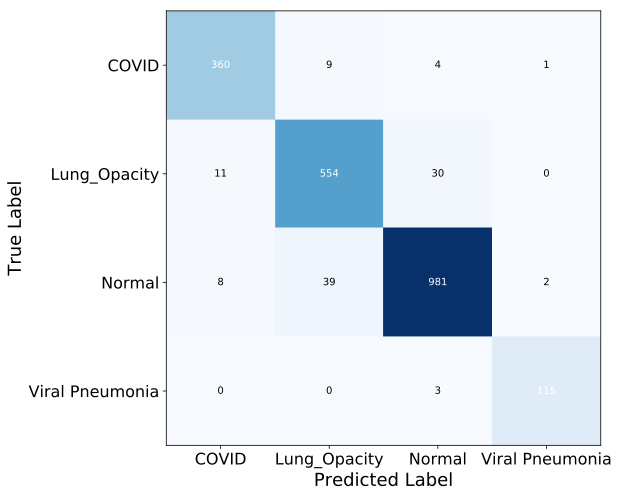

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_covid, 256, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes)
print(report)

                 precision    recall  f1-score   support

          COVID       0.96      0.95      0.96       379
   Lung_Opacity       0.93      0.92      0.93       602
         Normal       0.95      0.96      0.96      1018
Viral Pneumonia       0.97      0.97      0.97       118

       accuracy                           0.95      2117
      macro avg       0.96      0.95      0.95      2117
   weighted avg       0.95      0.95      0.95      2117



## DenseNet-121 timm raw unaug 16bs 30epochs_pretrained on ImageNet_fine-tuned_best_9586

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 22
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/21
----------
train Loss: 0.5011 Acc: 0.8069
val Loss: 0.3059 Acc: 0.8850

Epoch 1/21
----------
train Loss: 0.3129 Acc: 0.8873
val Loss: 0.2576 Acc: 0.9109

Epoch 2/21
----------
train Loss: 0.2534 Acc: 0.9098
val Loss: 0.2492 Acc: 0.9093

Epoch 3/21
----------
train Loss: 0.2181 Acc: 0.9216
val Loss: 0.2899 Acc: 0.8998

Epoch 4/21
----------
train Loss: 0.1890 Acc: 0.9319
val Loss: 0.2209 Acc: 0.9190

Epoch 5/21
----------
train Loss: 0.1716 Acc: 0.9389
val Loss: 0.2219 Acc: 0.9209

Epoch 6/21
----------
train Loss: 0.1404 Acc: 0.9498
val Loss: 0.2317 Acc: 0.9154

Epoch 7/21
----------
train Loss: 0.1249 Acc: 0.9569
val Loss: 0.2356 Acc: 0.9216

Epoch 8/21
----------
train Loss: 0.0551 Acc: 0.9820
val Loss: 0.1816 Acc: 0.9459

Epoch 9/21
----------
train Loss: 0.0266 Acc: 0.9926
val Loss: 0.2084 Acc: 0.9435

Epoch 10/21
----------
train Loss: 0.0140 Acc: 0.9964
val Loss: 0.2105 Acc: 0.9445

Epoch 11/21
----------
train Loss: 0.0075 Acc: 0.9982
val Loss: 0.2519 Acc: 0.9442

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_raw_16bs_ft_1014.pkl'
torch.save(net.state_dict(), PATH)

# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_raw_16bs_ft_1014.pkl'
net.load_state_dict(torch.load(PATH, map_location=device))
net.to(device)

test_loss: 0.2685, test_acc: 0.9532


<Figure size 432x288 with 0 Axes>

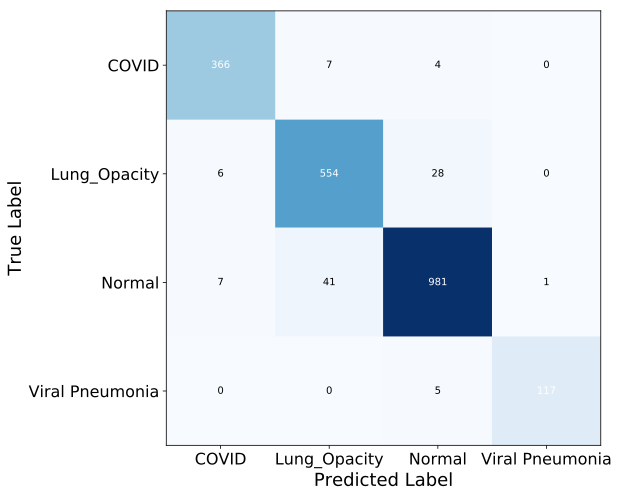

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_covid, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes,digits=4)
print(report)

                 precision    recall  f1-score   support

          COVID     0.9708    0.9657    0.9683       379
   Lung_Opacity     0.9422    0.9203    0.9311       602
         Normal     0.9524    0.9637    0.9580      1018
Viral Pneumonia     0.9590    0.9915    0.9750       118

       accuracy                         0.9532      2117
      macro avg     0.9561    0.9603    0.9581      2117
   weighted avg     0.9532    0.9532    0.9531      2117



## DenseNet-121 timm masked unaug 16bs 30epochs_pretrained on ImageNet_fine-tuned_best_9586

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 22
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_masked_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_masked_covid, 256, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/21
----------
train Loss: 0.6184 Acc: 0.7561
val Loss: 0.5677 Acc: 0.7822

Epoch 1/21
----------
train Loss: 0.4412 Acc: 0.8317
val Loss: 0.3914 Acc: 0.8557

Epoch 2/21
----------
train Loss: 0.3707 Acc: 0.8640
val Loss: 0.7385 Acc: 0.7375

Epoch 3/21
----------
train Loss: 0.3167 Acc: 0.8866
val Loss: 0.3367 Acc: 0.8793

Epoch 4/21
----------
train Loss: 0.2796 Acc: 0.8989
val Loss: 0.2874 Acc: 0.8932

Epoch 5/21
----------
train Loss: 0.2510 Acc: 0.9112
val Loss: 0.2915 Acc: 0.8937

Epoch 6/21
----------
train Loss: 0.2159 Acc: 0.9215
val Loss: 0.3947 Acc: 0.8604

Epoch 7/21
----------
train Loss: 0.1910 Acc: 0.9312
val Loss: 0.3290 Acc: 0.8923

Epoch 8/21
----------
train Loss: 0.0954 Acc: 0.9679
val Loss: 0.2383 Acc: 0.9209

Epoch 9/21
----------
train Loss: 0.0668 Acc: 0.9775
val Loss: 0.2461 Acc: 0.9225

Epoch 10/21
----------
train Loss: 0.0477 Acc: 0.9843
val Loss: 0.2589 Acc: 0.9216

Epoch 11/21
----------
train Loss: 0.0328 Acc: 0.9897
val Loss: 0.2931 Acc: 0.9202

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_masked_16bs_ft_1014.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_masked_16bs_ft_1014.pkl'
net.load_state_dict(torch.load(PATH, map_location=device))
net.to(device)

test_loss: 0.3899, test_acc: 0.9205


<Figure size 432x288 with 0 Axes>

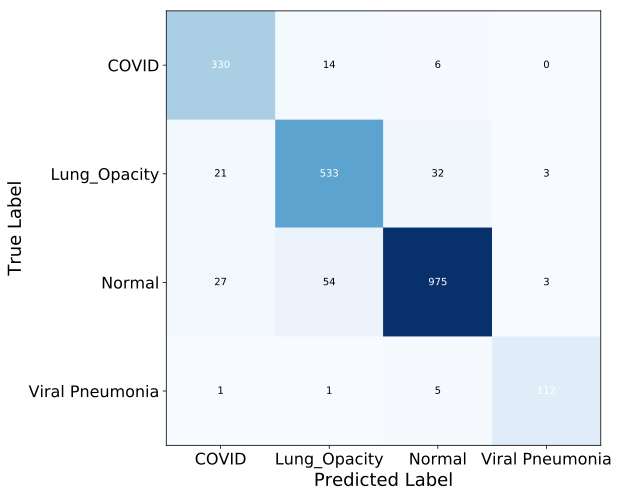

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_masked_covid, 256, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes,digits=4)
print(report)

                 precision    recall  f1-score   support

          COVID     0.9429    0.8707    0.9053       379
   Lung_Opacity     0.9049    0.8854    0.8950       602
         Normal     0.9207    0.9578    0.9389      1018
Viral Pneumonia     0.9412    0.9492    0.9451       118

       accuracy                         0.9211      2117
      macro avg     0.9274    0.9158    0.9211      2117
   weighted avg     0.9213    0.9211    0.9207      2117



## DenseNet-121 timm masked unaug 16bs 30epochs_pretrained on ImageNet_weighted_fine-tuned_best_9586

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 22
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_masked_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_masked_covid, 256, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_weighted(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/21
----------
train Loss: 0.6720 Acc: 0.7488
val Loss: 0.7708 Acc: 0.6898

Epoch 1/21
----------
train Loss: 0.4794 Acc: 0.8251
val Loss: 0.3989 Acc: 0.8566

Epoch 2/21
----------
train Loss: 0.3945 Acc: 0.8619
val Loss: 0.3575 Acc: 0.8712

Epoch 3/21
----------
train Loss: 0.3430 Acc: 0.8794
val Loss: 0.3110 Acc: 0.8859

Epoch 4/21
----------
train Loss: 0.2987 Acc: 0.8917
val Loss: 0.3441 Acc: 0.8698

Epoch 5/21
----------
train Loss: 0.2640 Acc: 0.9063
val Loss: 0.2842 Acc: 0.8984

Epoch 6/21
----------
train Loss: 0.2298 Acc: 0.9186
val Loss: 0.2948 Acc: 0.8991

Epoch 7/21
----------
train Loss: 0.2055 Acc: 0.9277
val Loss: 0.3048 Acc: 0.8935

Epoch 8/21
----------
train Loss: 0.1124 Acc: 0.9611
val Loss: 0.2379 Acc: 0.9220

Epoch 9/21
----------
train Loss: 0.0764 Acc: 0.9734
val Loss: 0.2448 Acc: 0.9209

Epoch 10/21
----------
train Loss: 0.0561 Acc: 0.9816
val Loss: 0.2595 Acc: 0.9206

Epoch 11/21
----------
train Loss: 0.0392 Acc: 0.9888
val Loss: 0.2778 Acc: 0.9185

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_masked_weighted_16bs_ft_1014.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_masked_weighted_16bs_ft_1014.pkl'
net.load_state_dict(torch.load(PATH, map_location=device))
net.to(device)

test_loss: 0.2269, test_acc: 0.9192


<Figure size 432x288 with 0 Axes>

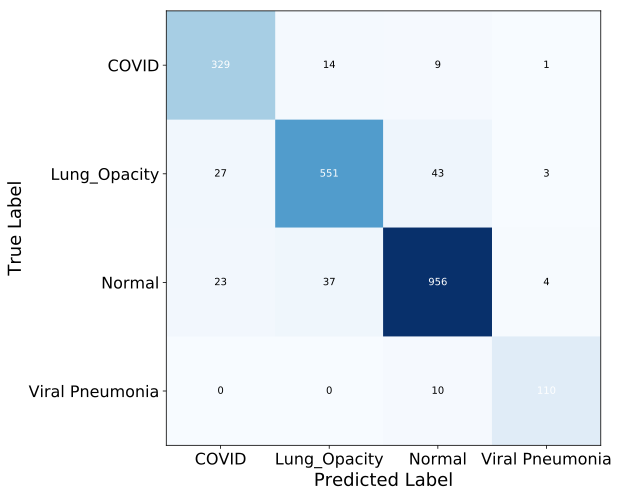

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_masked_covid, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes, digits=4)
print(report)

                 precision    recall  f1-score   support

          COVID     0.9320    0.8681    0.8989       379
   Lung_Opacity     0.8830    0.9153    0.8989       602
         Normal     0.9373    0.9391    0.9382      1018
Viral Pneumonia     0.9167    0.9322    0.9244       118

       accuracy                         0.9192      2117
      macro avg     0.9172    0.9137    0.9151      2117
   weighted avg     0.9197    0.9192    0.9192      2117



## DenseNet-121 timm raw unaug 16bs 30epochs_weighted=icf_pretrained on ImageNet_fine-tuned

In [ ]:
net = timm.create_model('densenet121', pretrained=True, num_classes=4)
# net.features.conv0=nn.modules.conv.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# o = net(torch.randn(2, 1, 224, 224))
# print(f'output shape: {o.shape}')


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


In [ ]:
net.classifier = nn.Sequential(
    nn.Linear(1024,64), nn.Mish(),
    nn.Linear(64,4)
)

In [ ]:
for name, param in net.named_parameters():
  if not(param.requires_grad is None):
    param.requires_grad = True

# for param in net.classifier.parameters():
#   if not param.requires_grad:
#     param.requires_grad = True

In [ ]:
k=0.5
batch_size, lr, num_epochs = int(32*k), 2e-3*k, 30
milestones =[8,15,25]
trainer = torch.optim.NAdam(net.parameters(), lr=lr,betas=(0.9, 0.999),eps=1e-08)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones =milestones , gamma=0.1, last_epoch=-1)
train_dl = DataLoader(train_raw_covid, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_raw_covid, 256, num_workers=2, pin_memory=True)
dataloaders = {'train':train_dl, 'val':val_dl}

criterions = {'train':nn.CrossEntropyLoss(weight=weights_icf(train_dl).to(device)),
        'val':nn.CrossEntropyLoss()}
# train(net, train_dl, val_dl, num_epochs, loss, trainer, device)s
net=train_model(net,dataloaders, trainer, scheduler, criterions=criterions, 
                num_epochs=num_epochs)

Epoch 0/29
----------
train Loss: 0.4571 Acc: 0.8116
val Loss: 0.3974 Acc: 0.8552

Epoch 1/29
----------
train Loss: 0.2889 Acc: 0.8841
val Loss: 0.8198 Acc: 0.7763

Epoch 2/29
----------
train Loss: 0.2218 Acc: 0.9073
val Loss: 0.4801 Acc: 0.8252

Epoch 3/29
----------
train Loss: 0.1976 Acc: 0.9175
val Loss: 0.2629 Acc: 0.9060

Epoch 4/29
----------
train Loss: 0.1683 Acc: 0.9272
val Loss: 0.2716 Acc: 0.9053

Epoch 5/29
----------
train Loss: 0.1626 Acc: 0.9310
val Loss: 0.3168 Acc: 0.8798

Epoch 6/29
----------
train Loss: 0.1464 Acc: 0.9401
val Loss: 0.2481 Acc: 0.9192

Epoch 7/29
----------
train Loss: 0.1152 Acc: 0.9504
val Loss: 0.2847 Acc: 0.9173

Epoch 8/29
----------
train Loss: 0.0615 Acc: 0.9727
val Loss: 0.1729 Acc: 0.9416

Epoch 9/29
----------
train Loss: 0.0377 Acc: 0.9832
val Loss: 0.1831 Acc: 0.9419

Epoch 10/29
----------
train Loss: 0.0266 Acc: 0.9885
val Loss: 0.1918 Acc: 0.9421

Epoch 11/29
----------
train Loss: 0.0164 Acc: 0.9930
val Loss: 0.2169 Acc: 0.9405

Ep

In [ ]:
# Save model
# ! mkdir /content/gdrive/MyDrive/model/covid/
PATH = '/content/gdrive/MyDrive/model/covid/rgb_densenet121_weights_unaug_raw_weighted_icf_16bs_ft_1017.pkl'
torch.save(net.state_dict(), PATH)
# torch.save(net, '/content/gdrive/MyDrive/model/covid/densenet121_unaug_raw_ft_915.pkl')


In [ ]:
# PATH = '/content/gdrive/MyDrive/model/covid/graysacle_densenet121_weights_unaug_raw_weighted_icf_16bs_ft_1017.pkl'
# net.load_state_dict(torch.load(PATH, map_location=device))
# net.to(device)

test_loss: 0.2423, test_acc: 0.9513


<Figure size 432x288 with 0 Axes>

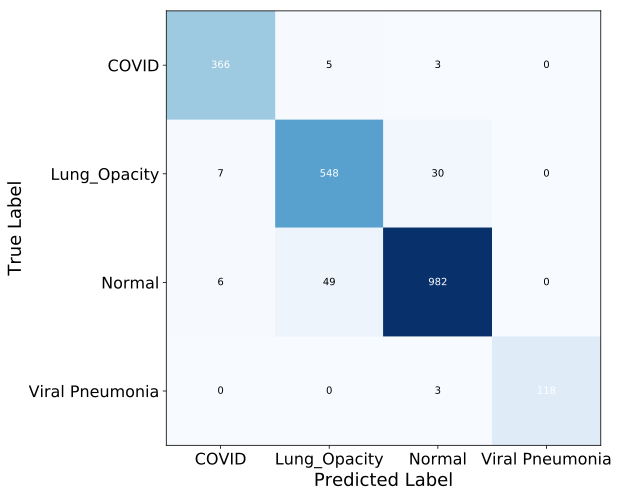

In [ ]:
preds, labels, cm=None, None, None
test_dl = DataLoader(test_raw_covid, num_workers=2, pin_memory=True)
with torch.no_grad():
  net.eval()
  preds,labels = test_predict(net, test_dl)
  cm=plot_cm(preds,labels,class_names=test_dl.dataset.dataset.classes)

In [ ]:
report=classification_report(labels, preds, target_names=raw_covid_dataset.classes, digits=4)
print(report)

                 precision    recall  f1-score   support

          COVID     0.9786    0.9657    0.9721       379
   Lung_Opacity     0.9368    0.9103    0.9233       602
         Normal     0.9470    0.9646    0.9557      1018
Viral Pneumonia     0.9752    1.0000    0.9874       118

       accuracy                         0.9513      2117
      macro avg     0.9594    0.9602    0.9597      2117
   weighted avg     0.9513    0.9513    0.9512      2117

